## Supervised Learning Capstone - Wine Quality Data Set

## Background Information

### Introduction to the Data

For this Supervised Learning Capstone, I am using the Wine Quality Data Set made public on the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/wine+quality) and originally published as *Modeling Wine Preferences by Data Mining from Physicochemical Properties in Decision Support Systems* by Cortez et al., 2000 (http://www3.dsi.uminho.pt/pcortez/wine/, https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub). This data consists of two datasets, one of red and one of white wine samples of Vinho Verde from Portugal. The data contains physicochemical and sensory qualities of the wine and wine quality is the target variable. 

### The Data

Each dataset consists of 12 unique variables:

**11 Input Variables**

*fixed acidity (g/dm^3 of tartaric acid)*

Fixed acidity, also known as nonvolatile or titratable acidity, is commonly comprised of tartaric, malic, citric and succinic acids. This is a measure of the total amount of titratable acids and free hydrogen ions present in wine. The majority of acids in wine are fixed and acids are responsible for the sourness and tartness of wine. 


*volatile acidity (g/dm^3 of acetic acid)*

Volatile acidity, a measure of the steam distillable acids (gaseous acids) present in wine, is commonly comprised of acetic acid and is responsible for the vinegar smell and taste of wine. 

*citric acid (g/dm^3)*

Citric acid is most often used as an acid supplement to boost the acidity of wine and acts as a preservative. 

*residual sugar (g/dm^3)*

Residual sugar is a measure of the natural grape sugars leftover in wine after fermentation.

*chlorides (g/dm^3 of sodium chloride)*

Chlorides consists of mineral and organic acids which contribute to the salty taste of wine.

*free sulfur dioxide (mg/dm^3)*

Sulfur dioxide is used in winemaking to prevent oxidation and microbial growth. Free sulfur dioxide is a measure of the amount of sulfur dioxide that is not bound to other molecules.

*total sulfur dioxide (mg/dm^3)*

Sulfur dioxide is used in winemaking to prevent oxidation and microbial growth. Total sulfur dioxide is a measure of the sum amount of sulfur dioxide that is free in the wine and the amount of sulfur dioxide that is bound to other chemicals in the wine. 

*density (g/cm^3)*

Density of wine is the mass per unit volume. Density is used to measure the alcohol concentration of wine. During fermentation, sugar is converted to ethanol and carbon dioxide is produced as waste gas. 

*pH*

pH is a measure of the hydrogen ion concentration of a solution (how acidic or basic a solution is).The pH of wine is measured on a scale of 0 (very acidic) to 14 (very basic) and is used as a measure of ripeness in relation to acidity.

*sulphates (g/dm^3 of potassium sulphate)*

Sulphates are added to wine to preserve freshness and protect wine from oxidation and unwanted bacteria and yeast. 

*alcohol (% volume)*

Alcohol is a measure of the percent alcohol content of the wine.

**1 Output Variable**

*quality (From 0, very bad, to 10, excellent)*

A measure of wine quality.

Sources: 

https://rstudio-pubs-static.s3.amazonaws.com/57835_c4ace81da9dc45438ad0c286bcbb4224.html

https://winefolly.com/deep-dive/understanding-acidity-in-wine/

https://en.wikipedia.org/wiki/Acids_in_wine#Citric_acid

https://waterhouse.ucdavis.edu/whats-in-wine/sulfites

http://www3.dsi.uminho.pt/pcortez/wine5.pdf

### Questions

For this supervised learning capstone, I am interested in the quality of red and white wine. To begin the analysis, I will explore the data and see if there are any missing values in the datasets. If so, I will determine which method is best for filling in or removing the missing values. I will then look at the variables individually through visualizations and descriptive statistics to determine the distribution of the data through skewness and kurtosis and visualize any outliers, if present, in the data. If outliers are present, I will transform them. 

After the datasets have been explored and any adjustments and transformations have been made, I will begin modeling the data (red and white wine data separately) with various machine learning models. The models that I will use include Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, Random Forest, Support Vector Machines (SVM) and an ensemble Gradient Boosting Classifier. The models with be fit with and without GridSearch, which is used to determine the best hyper-parameters for a model. 

After modeling, performance on the test data will be analyzed through various metrics including the accuracy, precision and recall scores, the area under the (AUC) receiver operator characteristic (ROC) curve score as well as analysis of the confusion matrix from each model. These scores will be compared between models and the optimal metrics will be considered to determine the best model for each dataset. 

### Main Questions

There are three main questions that frame this analysis:

1. What are the 6 features most correlated with wine quality?

2. Which machine learning model performs the best in a binary classification task to predict wine quality?

3. What are the 5 most important features in this model?

### Business Interest

The modeling objective is to determine the binary classification of red and white wine, either 0 if not good or 1 if good, given other physical, chemical and sensory characteristics. This is of interest to restaurants/wine/liquor stores or vineyards/wineries that either are selling wine or producing different types of wine.

At restaurants or wine/liquor stores, if a client is looking for wine of a certain quality: of an average or a higher quality, it is important to ensure that classifications of both average and higher quality are correct. If a higher quality wine is classified as a lower quality, the customer might be able to detect the various chemical and sensory characteristics and realize that they have been overcharged for their wine. On the contrary, if a lower quality wine is classified as a higher quality, the customer might likewise be upset as they are not getting what they paid for and expected. Further, in addition, there is a high cost to the business as they lose money from pricing this wine lower than it retails for. 

Likewise, at vineyards or wineries, customer dissatisfaction is a consequence of incorrectly classifying lower quality wines as a higher quality and consequent higher price and loss of profit is a result of incorrectly classifying a higher quality wine with a lower quality. 

Minimizing incorrect classifications of both binary classes (0 and 1) is optimal for this classification task. 

## Analyses

### Import Packages

First, the relevant Python packages necessary for the project will be imported

In [3]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
#Import warnings
import warnings
warnings.filterwarnings('ignore')
#train_test_split
from sklearn.model_selection import train_test_split
#Winsorize package
from scipy.stats.mstats import winsorize
#StandardScaler package
from sklearn.preprocessing import StandardScaler
#GridSearch package
from sklearn.model_selection import GridSearchCV
#Modeling packages
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
#Time package
import time
#Logistic Regression packages
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
#KNN packages
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
#Decision Tree and Random Forest packages
from sklearn import tree
from IPython.display import Image
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import pydotplus
import graphviz
from sklearn.ensemble import RandomForestClassifier
#SVM packages
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
#Ensemble package
from sklearn.ensemble import GradientBoostingClassifier
#Evaluation metrics packages
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In order to access the data stored on my computer's desktop:

In [4]:
#Access the data
#Print the directory
import os 
cwd=os.getcwd()

print (cwd)

/Users/saralanclos/Thinkful Data Science Projects/Capstone Two: Supervised Learning Capstone


In [5]:
#Change the directory to the CSV file
os.chdir('/Users/saralanclos/Desktop/winequality')
os.getcwd()

'/Users/saralanclos/Desktop/winequality'

In [6]:
#Print the directory to make sure it is good
arr=os.listdir('.')
print(arr)

['.DS_Store', 'winequality-red.csv', 'winequality-white.csv']


Rename the data for the project

In [7]:
#Rename the data
red_wine = pd.read_csv('winequality-red.csv', sep=';')

white_wine = pd.read_csv('winequality-white.csv', sep=';')

"head" to visualize a small segment of each dataset

In [6]:
red_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [7]:
white_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In order to make it easier to work with the variables, the spaces in each variable will be replaced with an underscore "_"

In [8]:
#Replace space with "_"
red_wine.columns = red_wine.columns.str.replace(' ','_')

In [9]:
#Replace space with "_"
white_wine.columns = white_wine.columns.str.replace(' ','_')

"head" to visualize the data

In [10]:
red_wine.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [11]:
white_wine.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

### Dataset Analysis

Further analysis of the datasets

In [12]:
#shape of red_wine
red_wine.shape

(1599, 12)

In [13]:
#shape of white_wine
white_wine.shape

(4898, 12)

In [14]:
#Size of the datasets
print("The red_wine dataset has {} rows and {} columns.".format(red_wine.shape[0], red_wine.shape[1]))
print("The white_wine dataset has {} rows and {} columns.".format(white_wine.shape[0], white_wine.shape[1]))

The red_wine dataset has 1599 rows and 12 columns.
The white_wine dataset has 4898 rows and 12 columns.


### Data Types

What are the data types that comprise the datasets?

"info" to determine the data types of red_wine

In [15]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


"dtypes" to determine the data types of red_wine

In [16]:
red_wine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

"info" to determine the data types of white_wine

In [17]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


"dtypes" to determine the data types of white_wine

In [18]:
white_wine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Sumary of the data types in the datsets

In [19]:
print("For red_wine and white_wine, the columns: 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates' and 'alcohol' are type float64.")

For red_wine and white_wine, the columns: 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates' and 'alcohol' are type float64.


In [20]:
print("For red_wine and white_wine, the column: 'quality' is type int64.")

For red_wine and white_wine, the column: 'quality' is type int64.


### red_wine

"describe" for all columns in red_wine

In [21]:
#Descriptive statistics
red_wine.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

### Null/Missing Values?

Are there any missing values in the red_wine dataset?

In [22]:
red_wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [23]:
red_wine.isnull().count()

fixed_acidity           1599
volatile_acidity        1599
citric_acid             1599
residual_sugar          1599
chlorides               1599
free_sulfur_dioxide     1599
total_sulfur_dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [24]:
red_wine.isnull().sum()*100/red_wine.isnull().count()

fixed_acidity           0.0
volatile_acidity        0.0
citric_acid             0.0
residual_sugar          0.0
chlorides               0.0
free_sulfur_dioxide     0.0
total_sulfur_dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

There are no missing values in the red_wine dataset

### Variable Analysis

Individual analysis of each variable in red_wine

In [25]:
#fixed_acidity
red_wine["fixed_acidity"].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed_acidity, dtype: float64

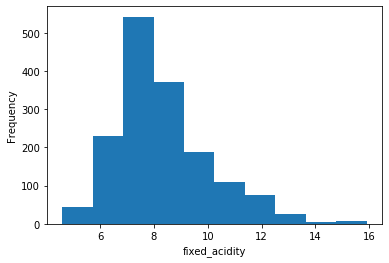

In [26]:
#Histogram of fixed_acidity
plt.hist(red_wine['fixed_acidity'])
plt.xlabel('fixed_acidity')
plt.ylabel('Frequency')
plt.show()

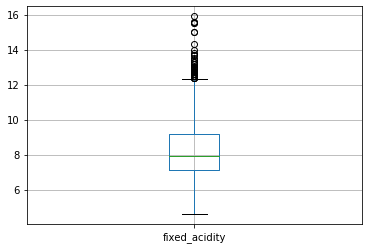

In [27]:
#Boxplot of fixed_acidity
red_wine.boxplot('fixed_acidity')
plt.show()

"fixed_acidity" has upper bound outliers

In [28]:
#Descriptive statistics of fixed_acidity
stats.describe(red_wine['fixed_acidity'])

DescribeResult(nobs=1599, minmax=(4.6, 15.9), mean=8.31963727329581, variance=3.0314163889978167, skewness=0.9818292953262073, kurtosis=1.1248563352037486)

"fixed_acidity" has a skewness of 0.98 and kurtosis of 1.12

The data has a right skew and is leptokurtic

In [29]:
#volatile_acidity
red_wine["volatile_acidity"].describe()

count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile_acidity, dtype: float64

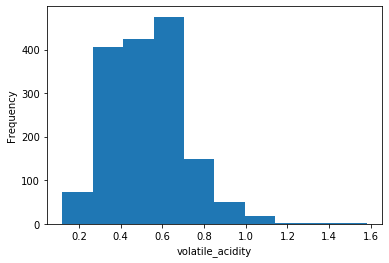

In [30]:
#Histogram of volatile_acidity
plt.hist(red_wine['volatile_acidity'])
plt.xlabel('volatile_acidity')
plt.ylabel('Frequency')
plt.show()

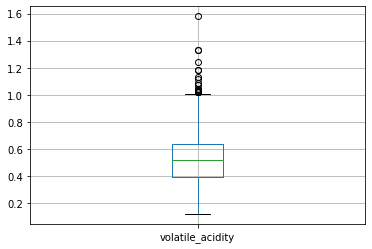

In [31]:
#Boxplot of volatile_acidity
red_wine.boxplot('volatile_acidity')
plt.show()

"volatile_acidity" has upper bound outliers

In [32]:
#Descriptive statistics of volatile_acidity
stats.describe(red_wine['volatile_acidity'])

DescribeResult(nobs=1599, minmax=(0.12, 1.58), mean=0.5278205128205128, variance=0.032062377651551614, skewness=0.6709623963499574, kurtosis=1.2179633893005306)

"volatile_acidity" has a skewness of 0.67 and kurtosis of 1.22

The data has a right skew and is leptokurtic

In [33]:
#citric_acid
red_wine["citric_acid"].describe()

count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric_acid, dtype: float64

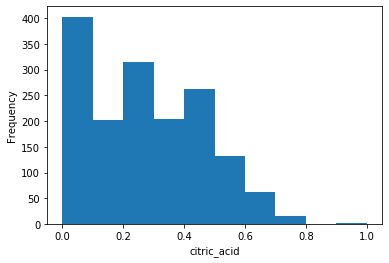

In [34]:
#Histogram of citric_acid
plt.hist(red_wine['citric_acid'])
plt.xlabel('citric_acid')
plt.ylabel('Frequency')
plt.show()

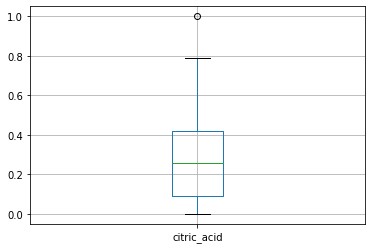

In [35]:
#Boxplot of citric_acid
red_wine.boxplot('citric_acid')
plt.show()

"citric_acid" has upper bound outliers

In [36]:
#Descriptive statistics of citric_acid
stats.describe(red_wine['citric_acid'])

DescribeResult(nobs=1599, minmax=(0.0, 1.0), mean=0.2709756097560976, variance=0.03794748313440581, skewness=0.3180385895475358, kurtosis=-0.7902825153036646)

"citric_acid" has a skewness of 0.32 and kurtosis of -0.79

The data has a right skew and is platykurtic

In [37]:
#residual_sugar
red_wine["residual_sugar"].describe()

count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual_sugar, dtype: float64

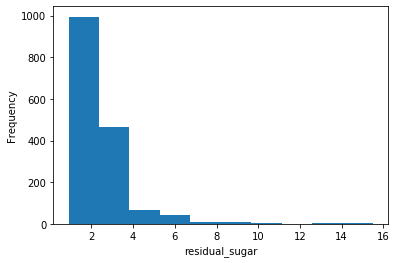

In [38]:
#Histogram of residual_sugar
plt.hist(red_wine['residual_sugar'])
plt.xlabel('residual_sugar')
plt.ylabel('Frequency')
plt.show()

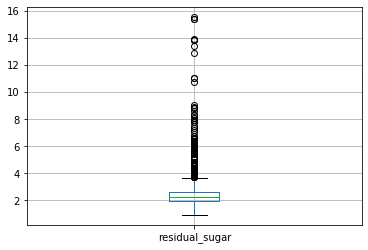

In [39]:
#Boxplot of residual_sugar
red_wine.boxplot('residual_sugar')
plt.show()

"residual_sugar" has upper bound outliers

In [40]:
#Descriptive statistics of residual_sugar
stats.describe(red_wine['residual_sugar'])

DescribeResult(nobs=1599, minmax=(0.9, 15.5), mean=2.53880550343965, variance=1.9878971329859634, skewness=4.536394788805638, kurtosis=28.524437824252235)

"residual_sugar" has a skewness of 4.54 and kurtosis of 28.52

The data has a right skew and is leptokurtic

In [41]:
#chlorides
red_wine["chlorides"].describe()

count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

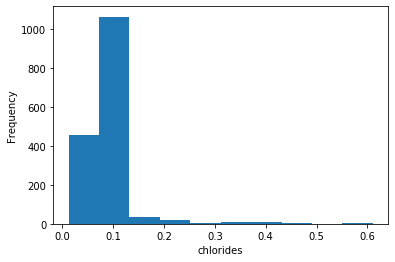

In [42]:
#Histogram of chlorides
plt.hist(red_wine['chlorides'])
plt.xlabel('chlorides')
plt.ylabel('Frequency')
plt.show()

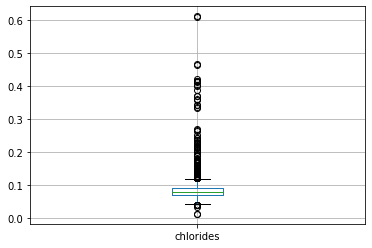

In [43]:
#Boxplot of chlorides
red_wine.boxplot('chlorides')
plt.show()

"chlorides" has upper and lower bound outliers

In [44]:
#Descriptive statistics of chlorides
stats.describe(red_wine['chlorides'])

DescribeResult(nobs=1599, minmax=(0.012, 0.611), mean=0.08746654158849279, variance=0.0022151426533009917, skewness=5.675016527504257, kurtosis=41.58170804367577)

"chlorides" has a skewness of 5.68 and kurtosis of 41.58

The data has a right skew and is leptokurtic

In [45]:
#free_sulfur_dioxide
red_wine["free_sulfur_dioxide"].describe()

count    1599.000000
mean       15.874922
std        10.460157
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free_sulfur_dioxide, dtype: float64

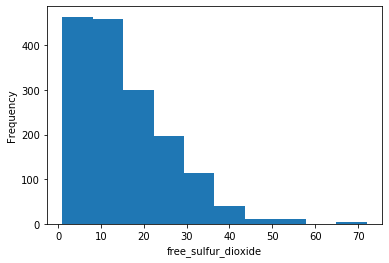

In [46]:
#Histogram of free_sulfur_dioxide
plt.hist(red_wine['free_sulfur_dioxide'])
plt.xlabel('free_sulfur_dioxide')
plt.ylabel('Frequency')
plt.show()

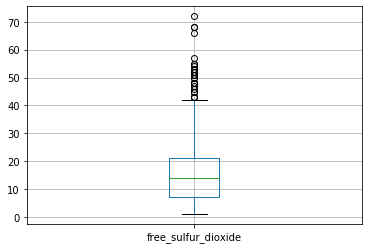

In [47]:
#Boxplot of free_sulfur_dioxide
red_wine.boxplot('free_sulfur_dioxide')
plt.show()

"free_sulfur_dioxide" has upper bound outliers

In [48]:
#Descriptive statistics of free_sulfur_dioxide
stats.describe(red_wine['free_sulfur_dioxide'])

DescribeResult(nobs=1599, minmax=(1.0, 72.0), mean=15.874921826141339, variance=109.414883833059, skewness=1.249393847434253, kurtosis=2.01348999733378)

"free_sulfur_dioxide" has a skewness of 1.25 and kurtosis of 2.01

The data has a right skew and is leptokurtic

In [49]:
#total_sulfur_dioxide
red_wine["total_sulfur_dioxide"].describe()

count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total_sulfur_dioxide, dtype: float64

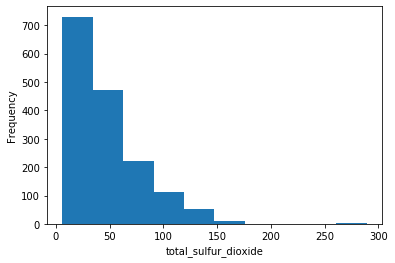

In [50]:
#Histogram of total_sulfur_dioxide
plt.hist(red_wine['total_sulfur_dioxide'])
plt.xlabel('total_sulfur_dioxide')
plt.ylabel('Frequency')
plt.show()

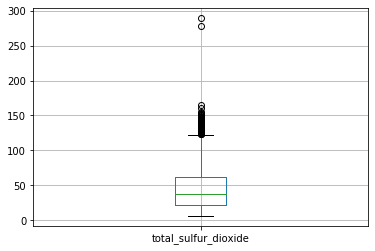

In [51]:
#Boxplot of total_sulfur_dioxide
red_wine.boxplot('total_sulfur_dioxide')
plt.show()

"total_sulfur_dioxide" has upper bound outliers

In [52]:
#Descriptive statistics of total_sulfur_dioxide
stats.describe(red_wine['total_sulfur_dioxide'])

DescribeResult(nobs=1599, minmax=(6.0, 289.0), mean=46.46779237023139, variance=1082.1023725325824, skewness=1.5141091878506638, kurtosis=3.7941717664905665)

"total_sulfur_dioxide" has a skewness of 1.51 and kurtosis of 3.79

The data has a right skew and is leptokurtic

In [53]:
#density
red_wine["density"].describe()

count    1599.000000
mean        0.996747
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997835
max         1.003690
Name: density, dtype: float64

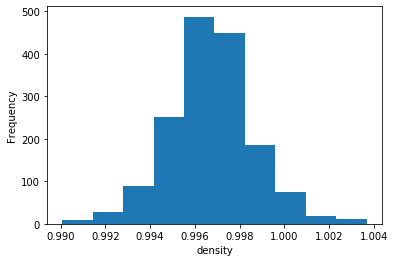

In [54]:
#Histogram of density
plt.hist(red_wine['density'])
plt.xlabel('density')
plt.ylabel('Frequency')
plt.show()

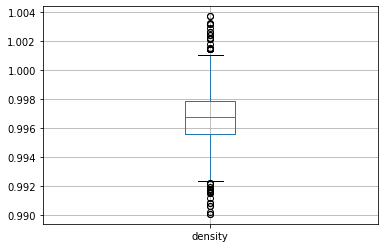

In [55]:
#Boxplot of density
red_wine.boxplot('density')
plt.show()

"density" has upper and lower bound outliers

In [56]:
#Descriptive statistics of density
stats.describe(red_wine['density'])

DescribeResult(nobs=1599, minmax=(0.9900700000000001, 1.00369), mean=0.996746679174484, variance=3.5620294533269767e-06, skewness=0.07122077153557972, kurtosis=0.9274107990478297)

"density" has a skewness of 0.07 and kurtosis of 0.93

The data has a right skew and is leptokurtic

In [57]:
#sulphates
red_wine["sulphates"].describe()

count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

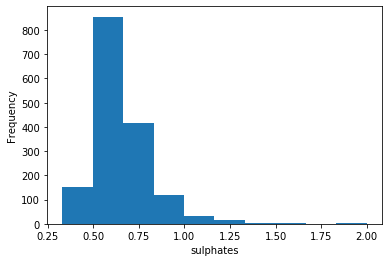

In [58]:
#Histogram of sulphates
plt.hist(red_wine['sulphates'])
plt.xlabel('sulphates')
plt.ylabel('Frequency')
plt.show()

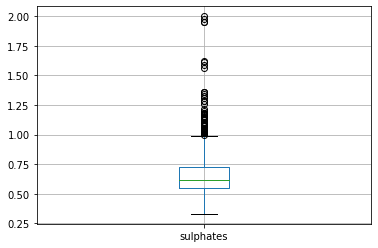

In [59]:
#Boxplot of sulphates
red_wine.boxplot('sulphates')
plt.show()

"sulphates" has upper bound outliers

In [60]:
#Descriptive statistics of sulphates
stats.describe(red_wine['sulphates'])

DescribeResult(nobs=1599, minmax=(0.33, 2.0), mean=0.6581488430268917, variance=0.028732616129761954, skewness=2.426393455449087, kurtosis=11.6798841115311)

"sulphates" has a skewness of 2.43 and kurtosis of 11.68

The data has a right skew and is leptokurtic

In [61]:
#alcohol
red_wine["alcohol"].describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

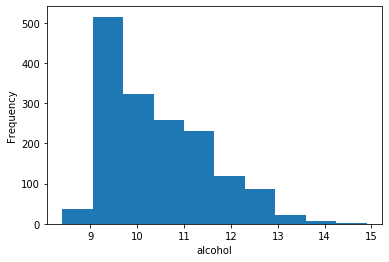

In [62]:
#Histogram of alcohol
plt.hist(red_wine['alcohol'])
plt.xlabel('alcohol')
plt.ylabel('Frequency')
plt.show()

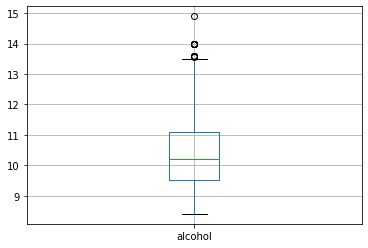

In [63]:
#Boxplot of alcohol
red_wine.boxplot('alcohol')
plt.show()

"alcohol" has upper bound outliers

In [64]:
#Descriptive statistics of alcohol
stats.describe(red_wine['alcohol'])

DescribeResult(nobs=1599, minmax=(8.4, 14.9), mean=10.422983114446529, variance=1.1356473950004737, skewness=0.8600210646566755, kurtosis=0.1956543762123122)

"alcohol" has a skewness of 0.86 and kurtosis of 0.20

The data has a right skew and is leptokurtic

In [65]:
#quality
red_wine["quality"].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

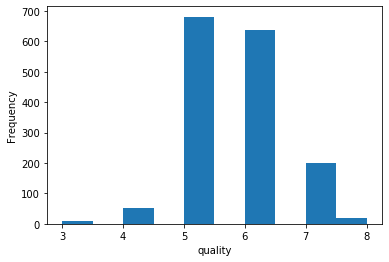

In [66]:
#Histogram of quality
plt.hist(red_wine['quality'])
plt.xlabel('quality')
plt.ylabel('Frequency')
plt.show()

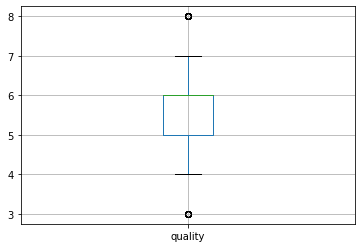

In [67]:
#Boxplot of quality
red_wine.boxplot('quality')
plt.show()

"quality" has upper and lower bound outliers

In [68]:
#Descriptive statistics of quality
stats.describe(red_wine['quality'])

DescribeResult(nobs=1599, minmax=(3, 8), mean=5.6360225140712945, variance=0.6521683999934252, skewness=0.21759720553467285, kurtosis=0.2920311389729804)

"quality" has a skewness of 0.22 and kurtosis of 0.29

The data has a right skew and is leptokurtic

### white_wine

"describe" for all columns in white_wine

In [69]:
#Descriptive statistics
white_wine.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

### Null/Missing Values?

Are there any missing values in the white_wine dataset?

In [70]:
white_wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [71]:
white_wine.isnull().count()

fixed_acidity           4898
volatile_acidity        4898
citric_acid             4898
residual_sugar          4898
chlorides               4898
free_sulfur_dioxide     4898
total_sulfur_dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64

In [72]:
white_wine.isnull().sum()*100/white_wine.isnull().count()

fixed_acidity           0.0
volatile_acidity        0.0
citric_acid             0.0
residual_sugar          0.0
chlorides               0.0
free_sulfur_dioxide     0.0
total_sulfur_dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

There are no missing values in the white_wine dataset

### Variable Analysis

In [73]:
#fixed_acidity
white_wine["fixed_acidity"].describe()

count    4898.000000
mean        6.854788
std         0.843868
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000
Name: fixed_acidity, dtype: float64

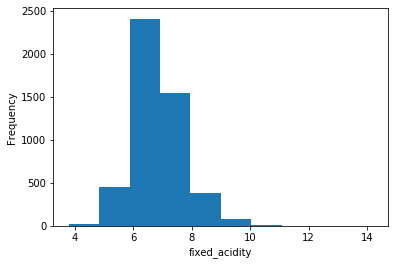

In [74]:
#Histogram of fixed_acidity
plt.hist(white_wine['fixed_acidity'])
plt.xlabel('fixed_acidity')
plt.ylabel('Frequency')
plt.show()

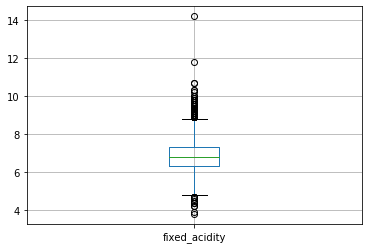

In [75]:
#Boxplot of fixed_acidity
white_wine.boxplot('fixed_acidity')
plt.show()

"fixed_acidity" has upper and lower bound outliers

In [76]:
#descriptive statistics of fixed_acidity
stats.describe(white_wine['fixed_acidity'])

DescribeResult(nobs=4898, minmax=(3.8, 14.2), mean=6.854787668436097, variance=0.7121135857004643, skewness=0.6475530855160632, kurtosis=2.168736944824719)

"fixed_acidity" has a skewness of 0.65 and kurtosis of 2.17

The data has a right skew and is leptokurtic

In [77]:
#volatile_acidity
white_wine["volatile_acidity"].describe()

count    4898.000000
mean        0.278241
std         0.100795
min         0.080000
25%         0.210000
50%         0.260000
75%         0.320000
max         1.100000
Name: volatile_acidity, dtype: float64

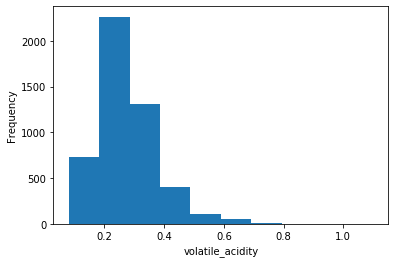

In [78]:
#Histogram of volatile_acidity
plt.hist(white_wine['volatile_acidity'])
plt.xlabel('volatile_acidity')
plt.ylabel('Frequency')
plt.show()

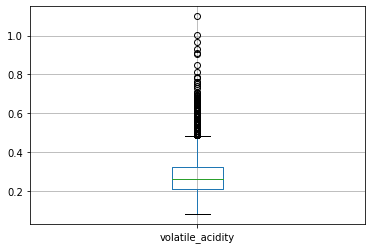

In [79]:
#Boxplot of volatile_acidity
white_wine.boxplot('volatile_acidity')
plt.show()

"volatile_acidity" has upper bound outliers

In [80]:
#Descriptive statistics of volatile_acidity
stats.describe(white_wine['volatile_acidity'])

DescribeResult(nobs=4898, minmax=(0.08, 1.1), mean=0.27824111882400976, variance=0.010159540992172523, skewness=1.576496515957486, kurtosis=5.085204904517855)

"volatile_acidity" has a skewness of 1.58 and kurtosis of 5.09

The data has a right skew and is leptokurtic

In [81]:
#citric_acid
white_wine["citric_acid"].describe()

count    4898.000000
mean        0.334192
std         0.121020
min         0.000000
25%         0.270000
50%         0.320000
75%         0.390000
max         1.660000
Name: citric_acid, dtype: float64

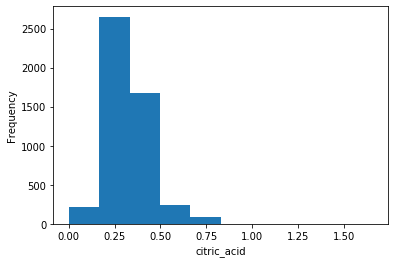

In [82]:
#Histogram of citric_acid
plt.hist(white_wine['citric_acid'])
plt.xlabel('citric_acid')
plt.ylabel('Frequency')
plt.show()

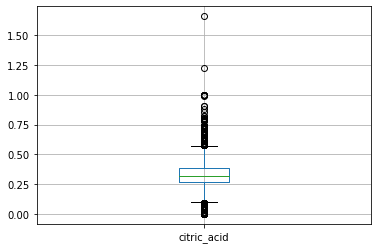

In [83]:
#Boxplot of citric_acid
white_wine.boxplot('citric_acid')
plt.show()

"citric_acid" has upper and lower bound outliers

In [84]:
#Descriptive statistics of citric_acid
stats.describe(white_wine['citric_acid'])

DescribeResult(nobs=4898, minmax=(0.0, 1.66), mean=0.33419150673744386, variance=0.014645793009328216, skewness=1.2815277799152376, kurtosis=6.167374226819426)

"citric_acid" has a skewness of 1.28 and kurtosis of 6.17

The data has a right skew and is leptokurtic

In [85]:
#residual_sugar
white_wine["residual_sugar"].describe()

count    4898.000000
mean        6.391415
std         5.072058
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual_sugar, dtype: float64

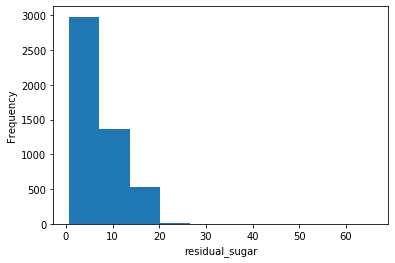

In [86]:
#Histogram of residual_sugar
plt.hist(white_wine['residual_sugar'])
plt.xlabel('residual_sugar')
plt.ylabel('Frequency')
plt.show()

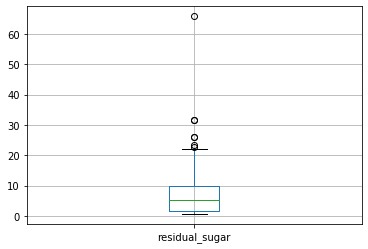

In [87]:
#Boxplot of residual_sugar
white_wine.boxplot('residual_sugar')
plt.show()

"residual_sugar" has upper bound outliers

In [88]:
#Descriptive statistics of residual_sugar
stats.describe(white_wine['residual_sugar'])

DescribeResult(nobs=4898, minmax=(0.6, 65.8), mean=6.391414863209474, variance=25.725770164385946, skewness=1.0767638711454448, kurtosis=3.465054296604639)

"residual_sugar" has a skewness of 1.08 and kurtosis of 3.47

The data has a right skew and is leptokurtic

In [89]:
#chlorides
white_wine["chlorides"].describe()

count    4898.000000
mean        0.045772
std         0.021848
min         0.009000
25%         0.036000
50%         0.043000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64

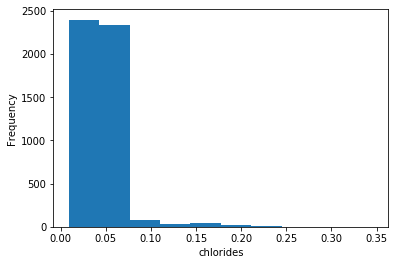

In [90]:
#Histogram of chlorides
plt.hist(white_wine['chlorides'])
plt.xlabel('chlorides')
plt.ylabel('Frequency')
plt.show()

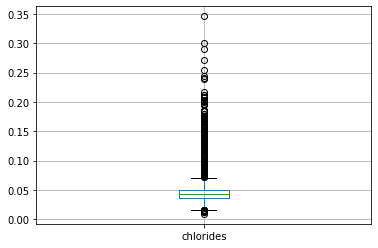

In [91]:
#Boxplot of chlorides
white_wine.boxplot('chlorides')
plt.show()

"chlorides" has upper and lower bound outliers

In [92]:
#Descriptive statistics of chlorides
stats.describe(white_wine['chlorides'])

DescribeResult(nobs=4898, minmax=(0.009000000000000001, 0.34600000000000003), mean=0.04577235606369947, variance=0.00047733370982459155, skewness=5.021792169671029, kurtosis=37.52503905008618)

 "chlorides" has a skewness of 5.02 and kurtosis of 37.53
 
 The data has a right skew and is leptokurtic

In [93]:
#free_sulfur_dioxide
white_wine["free_sulfur_dioxide"].describe()

count    4898.000000
mean       35.308085
std        17.007137
min         2.000000
25%        23.000000
50%        34.000000
75%        46.000000
max       289.000000
Name: free_sulfur_dioxide, dtype: float64

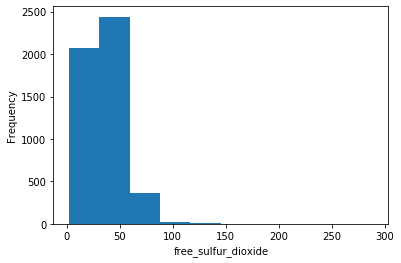

In [94]:
#Histogram of free_sulfur_dioxide
plt.hist(white_wine['free_sulfur_dioxide'])
plt.xlabel('free_sulfur_dioxide')
plt.ylabel('Frequency')
plt.show()

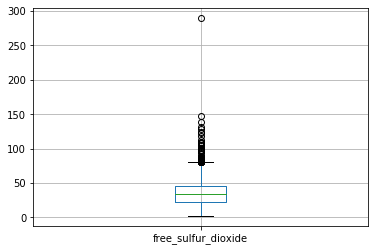

In [95]:
#Boxplot of free_sulfur_dioxide
white_wine.boxplot('free_sulfur_dioxide')
plt.show()

"free_sulfur_dioxide" has upper bound outliers

In [96]:
#Descriptive statistics of free_sulfur_dioxide
stats.describe(white_wine['free_sulfur_dioxide'])

DescribeResult(nobs=4898, minmax=(2.0, 289.0), mean=35.30808493262556, variance=289.2427199993196, skewness=1.4063140718346216, kurtosis=11.453415905047146)

"free_sulfur_dioxide" has a skewness of 1.41 and kurtosis of 11.45

The data has a right skew and is leptokurtic

In [97]:
#total_sulfur_dioxide
white_wine["total_sulfur_dioxide"].describe()

count    4898.000000
mean      138.360657
std        42.498065
min         9.000000
25%       108.000000
50%       134.000000
75%       167.000000
max       440.000000
Name: total_sulfur_dioxide, dtype: float64

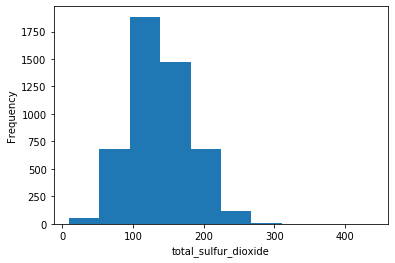

In [98]:
#Histogram of total_sulfur_dioxide
plt.hist(white_wine['total_sulfur_dioxide'])
plt.xlabel('total_sulfur_dioxide')
plt.ylabel('Frequency')
plt.show()

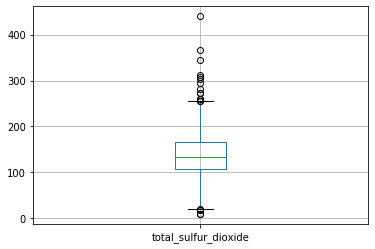

In [99]:
#Boxplot of total_sulfur_dioxide
white_wine.boxplot('total_sulfur_dioxide')
plt.show()

"total_sulfur_dioxide" has upper and lower bound outliers

In [100]:
#Descriptive statistics of total_sulfur_dioxide
stats.describe(white_wine['total_sulfur_dioxide'])

DescribeResult(nobs=4898, minmax=(9.0, 440.0), mean=138.36065741118824, variance=1806.0854908480976, skewness=0.39059017758152365, kurtosis=0.5700448984658744)

"total_sulfur_dioxide" has a skewness of 0.39 and kurtosis of 0.57

The data has a right skew and is leptokurtic

In [101]:
#density
white_wine["density"].describe()

count    4898.000000
mean        0.994027
std         0.002991
min         0.987110
25%         0.991723
50%         0.993740
75%         0.996100
max         1.038980
Name: density, dtype: float64

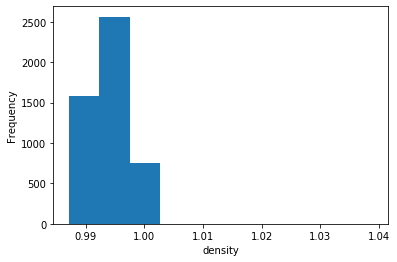

In [102]:
#Histogram of density
plt.hist(white_wine['density'])
plt.xlabel('density')
plt.ylabel('Frequency')
plt.show()

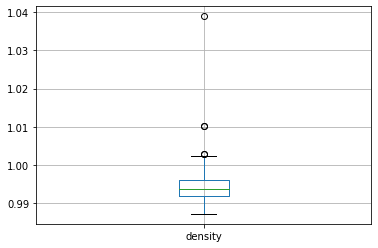

In [103]:
#Boxplot of density
white_wine.boxplot('density')
plt.show()

"density" has upper bound outliers

In [104]:
#Descriptive statistics of density
stats.describe(white_wine['density'])

DescribeResult(nobs=4898, minmax=(0.98711, 1.03898), mean=0.9940273764801959, variance=8.945524185781212e-06, skewness=0.9774735389049195, kurtosis=9.782587267035327)

"density" has a skewness of 0.98 and kurtosis of 9.78

The data has a right skew and is leptokurtic

In [105]:
#sulphates
white_wine["sulphates"].describe()

count    4898.000000
mean        0.489847
std         0.114126
min         0.220000
25%         0.410000
50%         0.470000
75%         0.550000
max         1.080000
Name: sulphates, dtype: float64

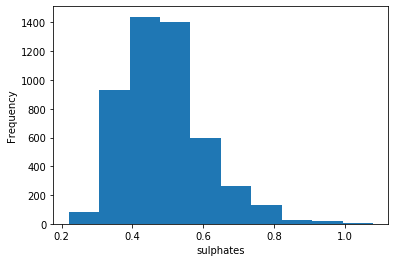

In [106]:
#Histogram of sulphates
plt.hist(white_wine['sulphates'])
plt.xlabel('sulphates')
plt.ylabel('Frequency')
plt.show()

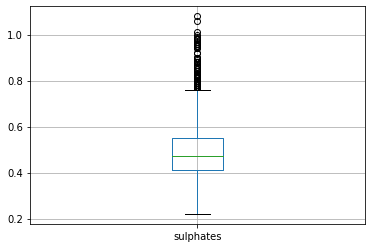

In [107]:
#Boxplot of sulphates
white_wine.boxplot('sulphates')
plt.show()

"sulphates" has upper bound outliers

In [108]:
#Descriptive statistics of sulphates
stats.describe(white_wine['sulphates'])

DescribeResult(nobs=4898, minmax=(0.22, 1.08), mean=0.48984687627603113, variance=0.013024705974516444, skewness=0.9768943947733427, kurtosis=1.5880812942840752)

"sulphates" has a skewness of 0.98 and kurtosis of 1.59

The data has a right skew and is leptokurtic

In [109]:
#alcohol
white_wine["alcohol"].describe()

count    4898.000000
mean       10.514267
std         1.230621
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.200000
Name: alcohol, dtype: float64

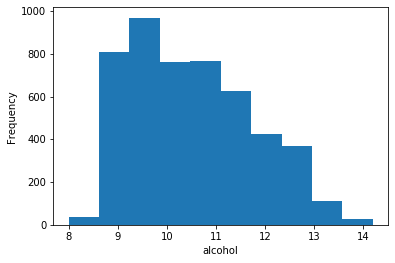

In [110]:
#Histogram of alcohol
plt.hist(white_wine['alcohol'])
plt.xlabel('alcohol')
plt.ylabel('Frequency')
plt.show()

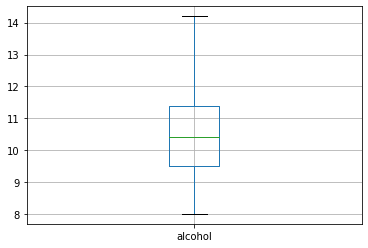

In [111]:
#Boxplot of alcohol
white_wine.boxplot('alcohol')
plt.show()

"alcohol" does not have outliers

In [112]:
#Descriptive statistics of alcohol
stats.describe(white_wine['alcohol'])

DescribeResult(nobs=4898, minmax=(8.0, 14.2), mean=10.514267047774602, variance=1.5144269817873437, skewness=0.48719273327634327, kurtosis=-0.6989373013774789)

"alcohol" has a skewness of 0.49 and kurtosis of -0.70

The data has a right skew and is platykurtic

In [113]:
#quality
white_wine["quality"].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

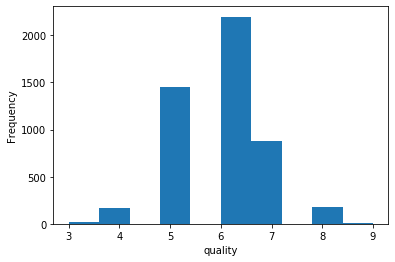

In [114]:
#Histogram of quality
plt.hist(white_wine['quality'])
plt.xlabel('quality')
plt.ylabel('Frequency')
plt.show()

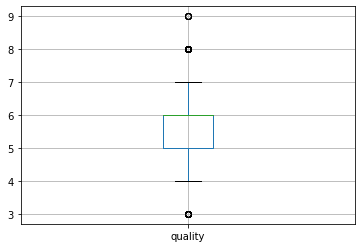

In [115]:
#Boxplot of quality
white_wine.boxplot('quality')
plt.show()

"quality" has upper and lower bound outliers

In [116]:
#Descriptive statistics of quality
stats.describe(white_wine['quality'])

DescribeResult(nobs=4898, minmax=(3, 9), mean=5.87790935075541, variance=0.7843556854710506, skewness=0.15574868141362455, kurtosis=0.21508011570192975)

"quality" has a skewness of 0.16 and kurtosis of 0.22

The data has a right skew and is leptokurtic

### Summary of red_wine

The above analyses, consolidated:

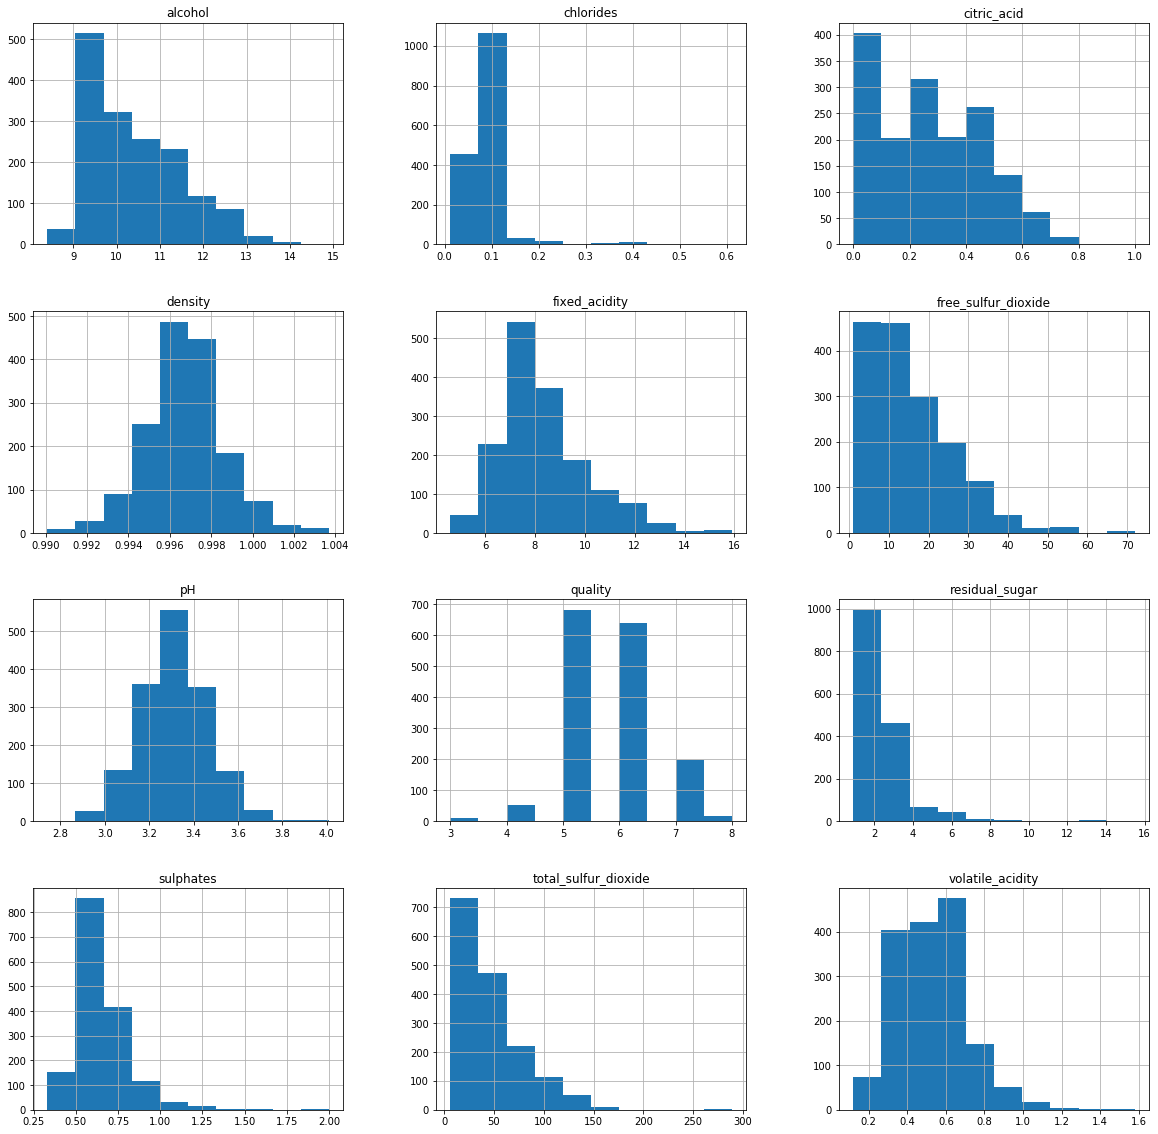

In [117]:
#Histograms of variables
red_wine.hist(figsize=(20,20))
plt.show()

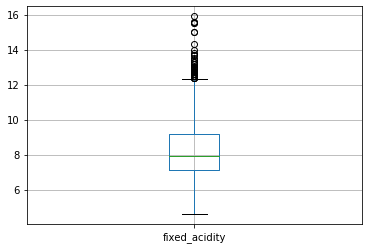

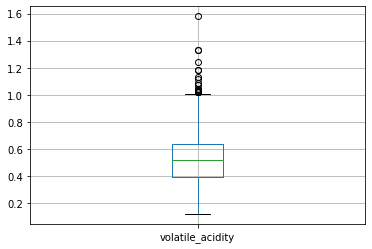

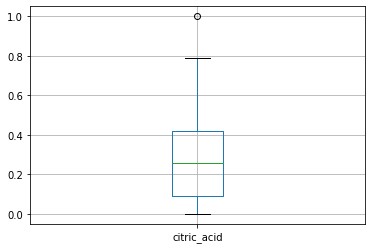

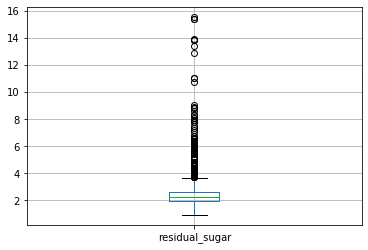

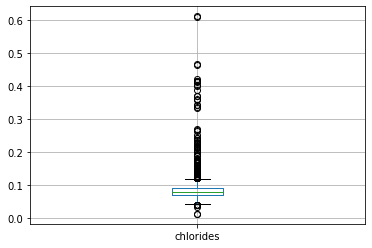

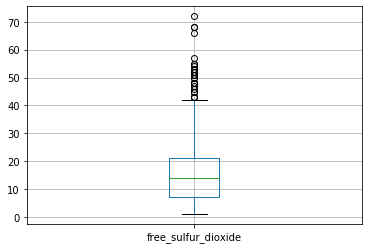

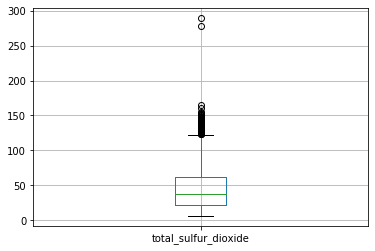

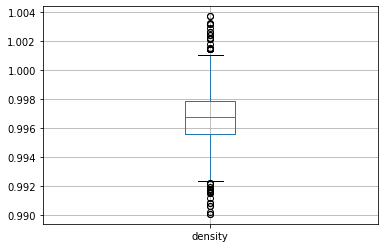

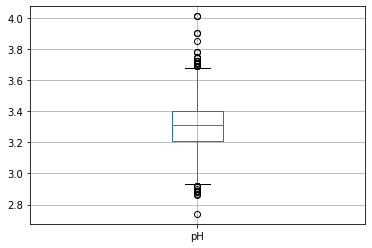

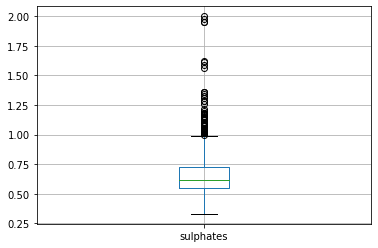

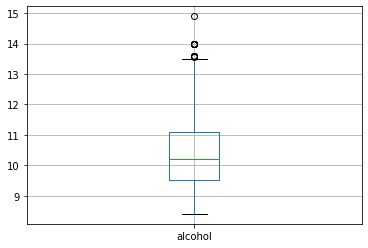

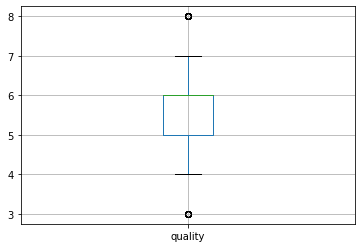

In [118]:
#Boxplots of variables
for column in red_wine:
    plt.figure()
    red_wine.boxplot([column])
#There are outliers in all of the columns

In [119]:
#Descriptive statistics of variables
for columns in red_wine:
    print([columns])
    print(stats.describe(red_wine[columns]))
    print("")

['fixed_acidity']
DescribeResult(nobs=1599, minmax=(4.6, 15.9), mean=8.31963727329581, variance=3.0314163889978167, skewness=0.9818292953262073, kurtosis=1.1248563352037486)

['volatile_acidity']
DescribeResult(nobs=1599, minmax=(0.12, 1.58), mean=0.5278205128205128, variance=0.032062377651551614, skewness=0.6709623963499574, kurtosis=1.2179633893005306)

['citric_acid']
DescribeResult(nobs=1599, minmax=(0.0, 1.0), mean=0.2709756097560976, variance=0.03794748313440581, skewness=0.3180385895475358, kurtosis=-0.7902825153036646)

['residual_sugar']
DescribeResult(nobs=1599, minmax=(0.9, 15.5), mean=2.53880550343965, variance=1.9878971329859634, skewness=4.536394788805638, kurtosis=28.524437824252235)

['chlorides']
DescribeResult(nobs=1599, minmax=(0.012, 0.611), mean=0.08746654158849279, variance=0.0022151426533009917, skewness=5.675016527504257, kurtosis=41.58170804367577)

['free_sulfur_dioxide']
DescribeResult(nobs=1599, minmax=(1.0, 72.0), mean=15.874921826141339, variance=109.41488

### Summary of white_wine

The above analyses, consolidated:

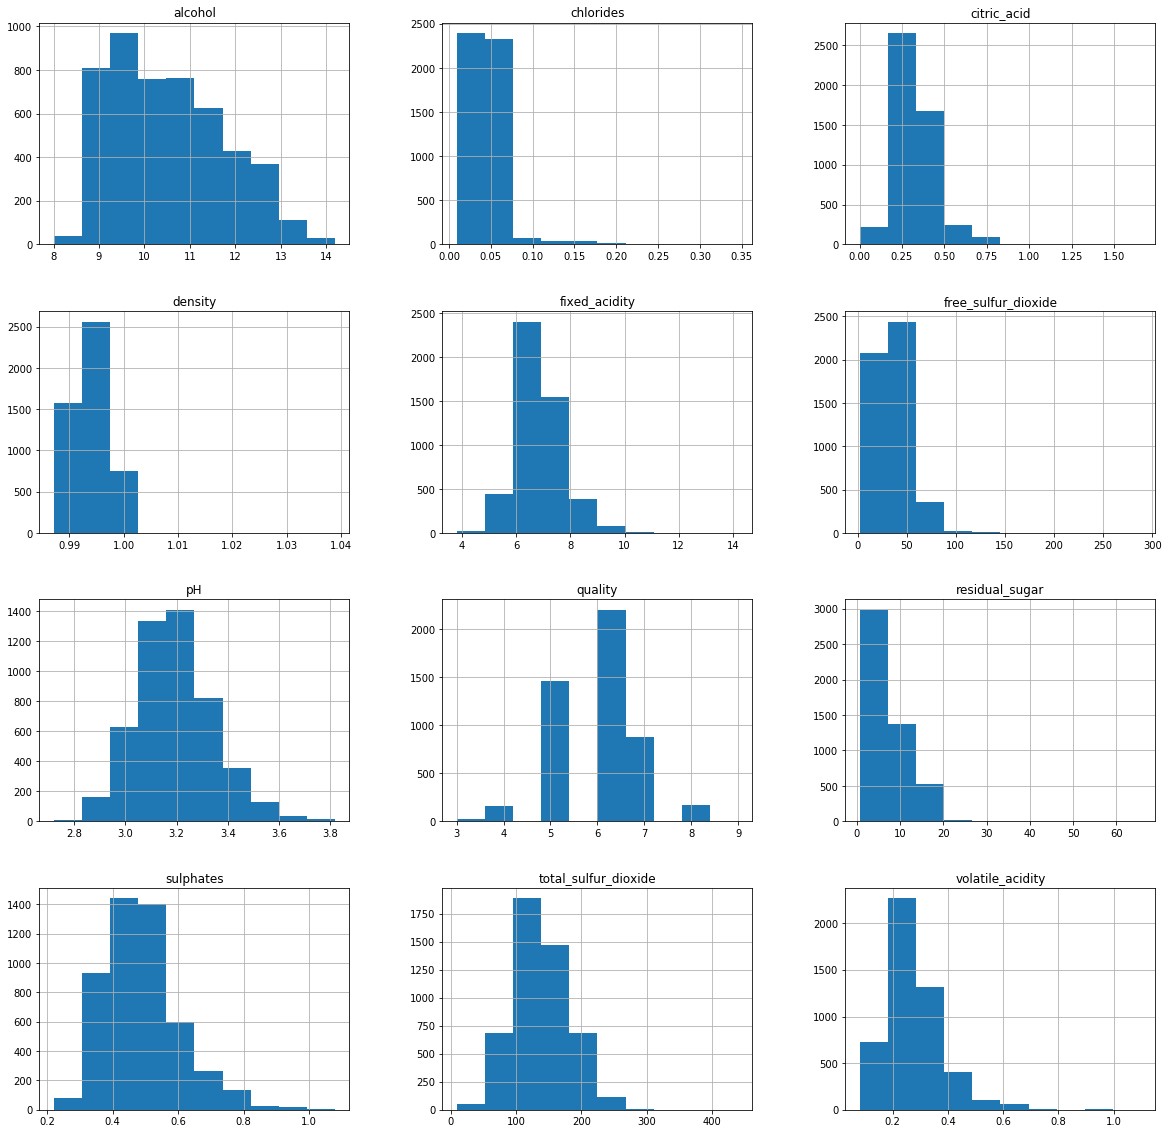

In [120]:
#Histograms of variables
white_wine.hist(figsize=(20,20))
plt.show()

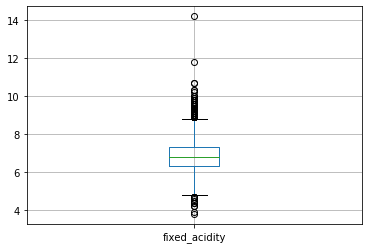

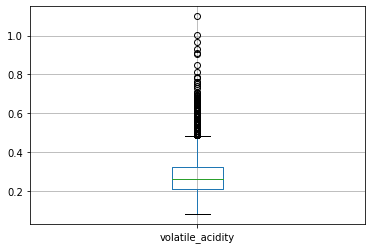

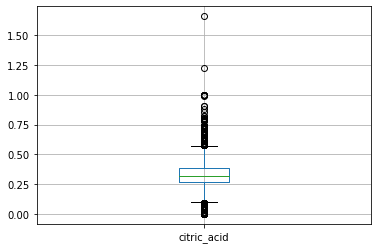

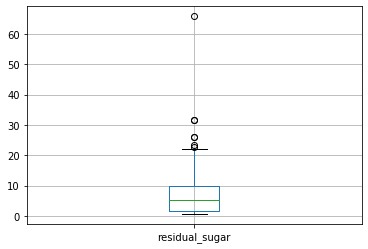

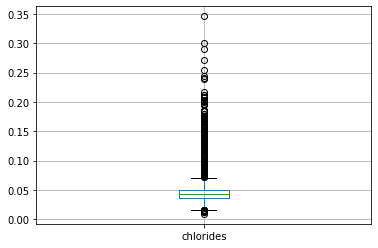

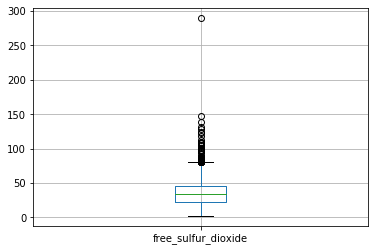

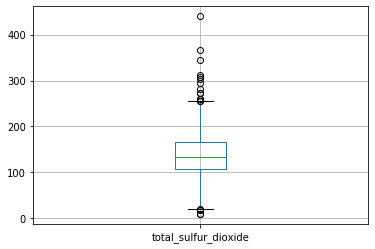

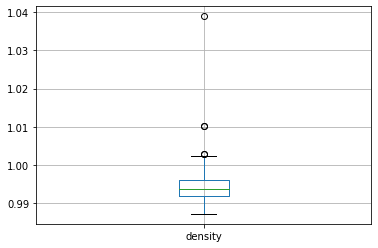

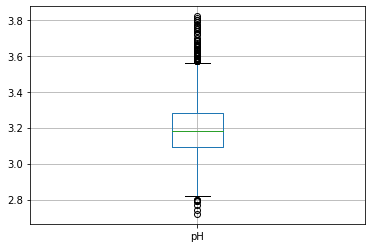

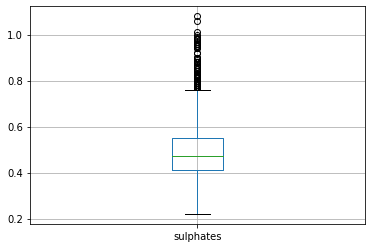

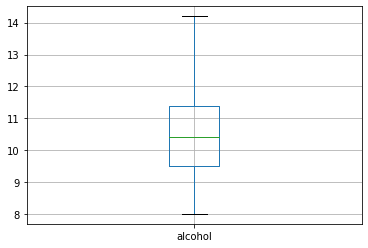

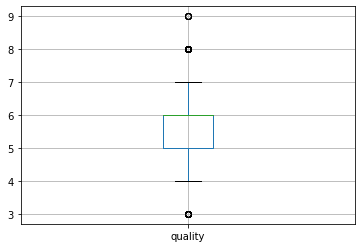

In [121]:
#Boxplots of variables
for column in white_wine:
    plt.figure()
    white_wine.boxplot([column])
#There are outliers in the columns but the "alcohol" column does not have outliers.

In [122]:
#Descriptive statistics of variables
for columns in white_wine:
    print([columns])
    print(stats.describe(white_wine[columns]))
    print("")

['fixed_acidity']
DescribeResult(nobs=4898, minmax=(3.8, 14.2), mean=6.854787668436097, variance=0.7121135857004643, skewness=0.6475530855160632, kurtosis=2.168736944824719)

['volatile_acidity']
DescribeResult(nobs=4898, minmax=(0.08, 1.1), mean=0.27824111882400976, variance=0.010159540992172523, skewness=1.576496515957486, kurtosis=5.085204904517855)

['citric_acid']
DescribeResult(nobs=4898, minmax=(0.0, 1.66), mean=0.33419150673744386, variance=0.014645793009328216, skewness=1.2815277799152376, kurtosis=6.167374226819426)

['residual_sugar']
DescribeResult(nobs=4898, minmax=(0.6, 65.8), mean=6.391414863209474, variance=25.725770164385946, skewness=1.0767638711454448, kurtosis=3.465054296604639)

['chlorides']
DescribeResult(nobs=4898, minmax=(0.009000000000000001, 0.34600000000000003), mean=0.04577235606369947, variance=0.00047733370982459155, skewness=5.021792169671029, kurtosis=37.52503905008618)

['free_sulfur_dioxide']
DescribeResult(nobs=4898, minmax=(2.0, 289.0), mean=35.3080

### Outlier Analyses

Box plots to visualzie the outliers, z-scores (distance from a point to the mean, measured in standard deviation units) and interquartile range (IQR) method to identify outliers outside of the 1st and 3rd quartiles.

### red_wine

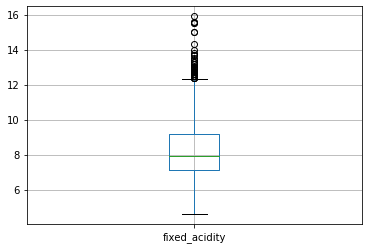

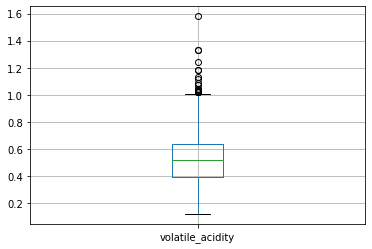

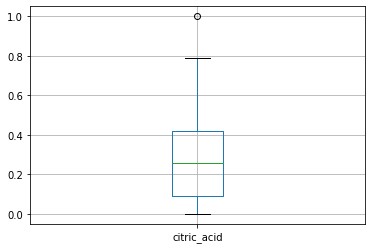

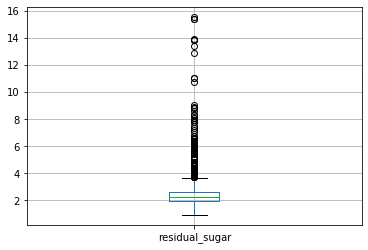

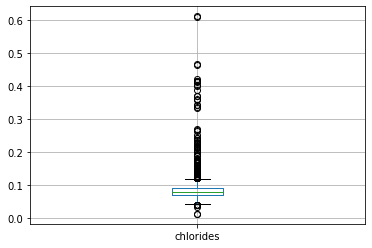

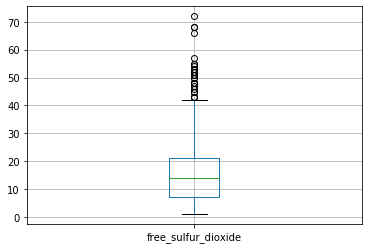

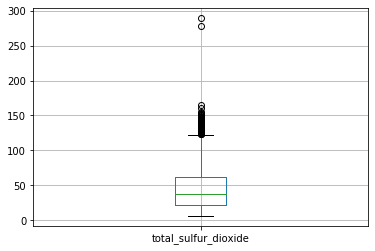

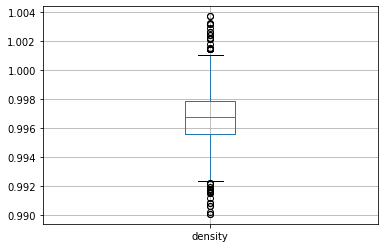

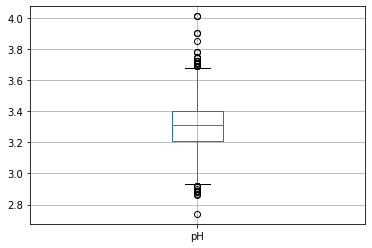

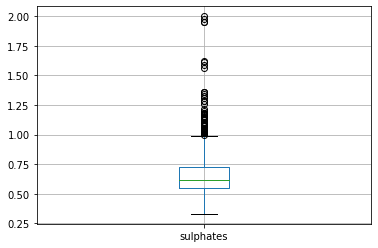

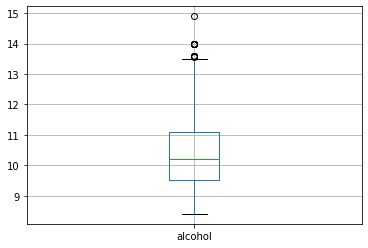

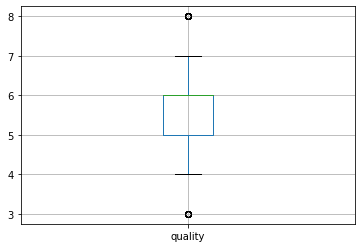

In [131]:
#Boxplots of variables
for column in red_wine:
    plt.figure()
    red_wine.boxplot([column])
#There are outliers in all of the columns

In [132]:
#Z-scores
#z-score tells how many standard deviations away from the mean a point is
red_wine.apply(zscore)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1         -0.298547          1.967442    -1.391472        0.043416   0.223875   
2         -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3          1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
...             ...               ...          ...             ...        ...   
1594      -1.217796          0.403229    -0.980669       -0.382271   0.053845   
1595      -1.390155          0.123905    -0.877968       -0.240375  -0.541259   
1596      -1.160343         -0.099554    -0.723916       -0.169427  -0.243707   
1597      -1.390155          0.654620    -0.775267       -0.382271  -0.264960   
1598      -1.332702         -1.216849     1.021999        0.752894  -0.434990   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0               -0.466193             -0.379133  0.558274  1.288643   
1                0.872638              0.624363  0.028261 -0.719933   
2               -0.083669              0.229047  0.134264 -0.331177   
3                0.107592              0.411500  0.664277 -0.979104   
4               -0.466193             -0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054             -0.075043 -0.978765  0.899886   
1595             2.211469              0.137820 -0.862162  1.353436   
1596             1.255161             -0.196679 -0.533554  0.705508   
1597             1.542054             -0.075043 -0.676657  1.677400   
1598             0.203223             -0.135861 -0.666057  0.511130   

      sulphates   alcohol   quality  
0     -0.579207 -0.960246 -0.787823  
1      0.128950 -0.584777 -0.787823  
2     -0.048089 -0.584777 -0.787823  
3     -0.461180 -0.584777  0.450848  
4     -0.579207 -0.960246 -0.787823  
...         ...       ...       ...  
1594  -0.461180  0.072294 -0.787823  
1595   0.601055  0.729364  0.450848  
1596   0.542042  0.541630  0.450848  
1597   0.305990 -0.209308 -0.787823  
1598   0.010924  0.541630  0.450848  

[1599 rows x 12 columns]

In [133]:
#Calculate z-scores to determine the outliers
z_scores=[]
for columns in red_wine:
    print("The column is: {}".format(columns))
    z_scores = zscore(red_wine[columns])
    for threshold in range(1,5):
        print("The score threshold is: {}".format(threshold))
        print("The indices of the outliers:")
        print(np.where(z_scores > threshold))
        print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The column is: fixed_acidity
The score threshold is: 1
The indices of the outliers:
(array([   3,   56,  113,  197,  205,  206,  209,  212,  241,  243,  244,
        250,  252,  264,  265,  269,  271,  272,  277,  278,  280,  286,
        289,  291,  292,  294,  295,  296,  301,  305,  307,  308,  310,
        323,  326,  327,  328,  329,  330,  331,  335,  338,  339,  340,
        341,  342,  343,  344,  347,  350,  353,  356,  357,  358,  359,
        362,  363,  364,  366,  367,  368,  374,  375,  376,  378,  381,
        391,  394,  395,  397,  398,  402,  403,  407,  408,  409,  416,
        418,  423,  429,  430,  432,  433,  434,  435,  437,  438,  440,
        441,  442,  446,  449,  450,  453,  455,  458,  459,  462,  464,
        466,  468,  470,  472,  474,  477,  480,  482,  483,  484,  485,
        486,  487,  488,  495,  498,  501,  502,  503,  504,  505,  506,
        507,  509,  510,  512,  513,  514,  516,  517,  518,  525,  531,
        532,  533,  538,  539,  543,  5

In [134]:
#Calculate IQR, 75 and 25, the 3rd and 1st quartiles
for columns in red_wine:
    q75, q25 = np.percentile(red_wine[columns], [75 ,25])
    iqr = q75 - q25
    print(columns)

    for threshold in np.arange(1,5,0.5):
        min_val = q25 - (iqr*threshold)
        max_val = q75 + (iqr*threshold)
        print("The score threshold is: {}".format(threshold))
        print("Number of outliers is: {}".format(
            len((np.where((red_wine[columns] > max_val) 
                      | (red_wine[columns] < min_val))[0]))
        ))

fixed_acidity
The score threshold is: 1.0
Number of outliers is: 124
The score threshold is: 1.5
Number of outliers is: 49
The score threshold is: 2.0
Number of outliers is: 14
The score threshold is: 2.5
Number of outliers is: 7
The score threshold is: 3.0
Number of outliers is: 5
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0
volatile_acidity
The score threshold is: 1.0
Number of outliers is: 53
The score threshold is: 1.5
Number of outliers is: 19
The score threshold is: 2.0
Number of outliers is: 6
The score threshold is: 2.5
Number of outliers is: 3
The score threshold is: 3.0
Number of outliers is: 1
The score threshold is: 3.5
Number of outliers is: 1
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0
citric_acid
The score threshold is: 1.0
Number of outliers is: 6
The score threshold is: 1.5
Number of outliers is:

### white_wine

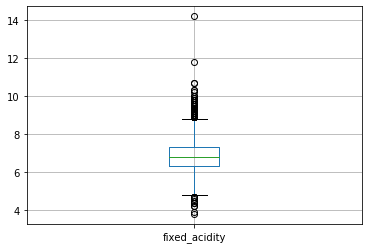

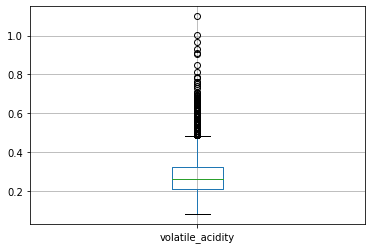

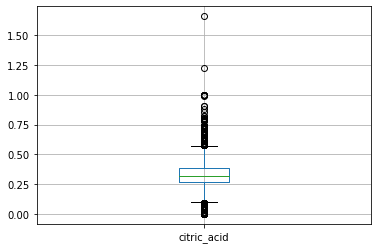

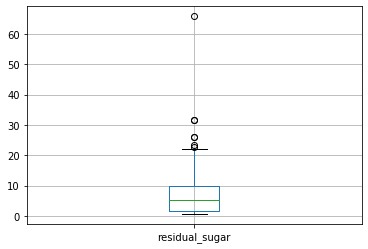

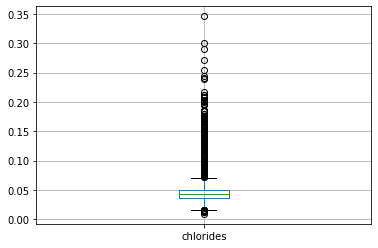

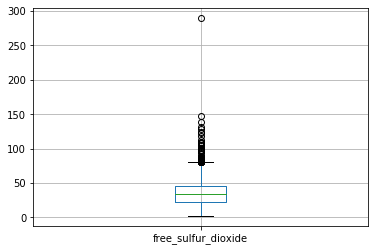

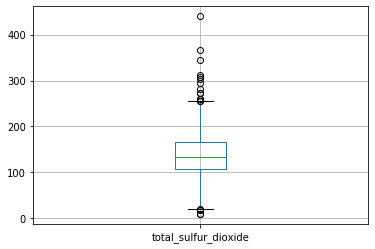

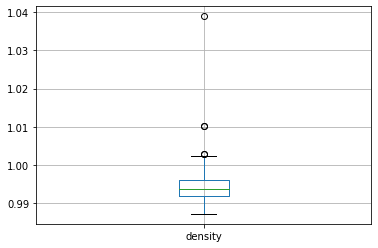

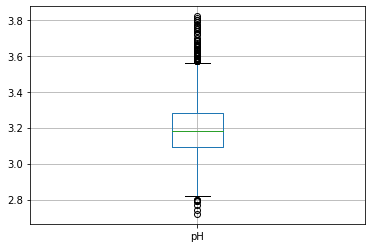

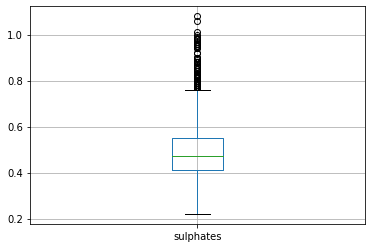

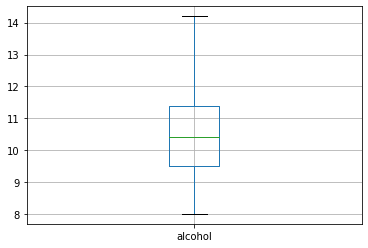

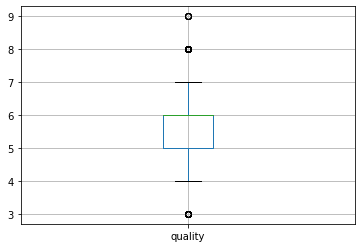

In [135]:
#Boxplots of variables
for column in white_wine:
    plt.figure()
    white_wine.boxplot([column])
#There are outliers in the columns, but the "alcohol" column does not have outliers

In [136]:
#Z-scores
#z-score tells how many standard deviations away from the mean a point is
white_wine.apply(zscore)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.172097         -0.081770     0.213280        2.821349  -0.035355   
1         -0.657501          0.215896     0.048001       -0.944765   0.147747   
2          1.475751          0.017452     0.543838        0.100282   0.193523   
3          0.409125         -0.478657    -0.117278        0.415768   0.559727   
4          0.409125         -0.478657    -0.117278        0.415768   0.559727   
...             ...               ...          ...             ...        ...   
4893      -0.776015         -0.677101    -0.365197       -0.944765  -0.310008   
4894      -0.301959          0.414339     0.213280        0.317179   0.056196   
4895      -0.420473         -0.379435    -1.191592       -1.023637  -0.218457   
4896      -1.605613          0.116674    -0.282557       -1.043355  -1.088192   
4897      -1.013043         -0.677101     0.378559       -1.102508  -1.179743   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0                0.569932              0.744565  2.331512 -1.246921   
1               -1.253019             -0.149685 -0.009154  0.740029   
2               -0.312141             -0.973336  0.358665  0.475102   
3                0.687541              1.121091  0.525855  0.011480   
4                0.687541              1.121091  0.525855  0.011480   
...                   ...                   ...       ...       ...   
4893            -0.664970             -1.091000 -0.965483  0.541334   
4894             1.275590              0.697499  0.291789 -0.253446   
4895            -0.312141             -0.643875 -0.497350 -1.313153   
4896            -0.900190             -0.667408 -1.784717  1.004955   
4897            -0.782580             -0.949803 -1.543962  0.475102   

      sulphates   alcohol   quality  
0     -0.349184 -1.393152  0.137870  
1      0.001342 -0.824276  0.137870  
2     -0.436816 -0.336667  0.137870  
3     -0.787342 -0.499203  0.137870  
4     -0.787342 -0.499203  0.137870  
...         ...       ...       ...  
4893   0.088973  0.557282  0.137870  
4894  -0.261553 -0.743008 -0.991374  
4895  -0.261553 -0.905544  0.137870  
4896  -0.962605  1.857572  1.267114  
4897  -1.488394  1.044891  0.137870  

[4898 rows x 12 columns]

In [137]:
#Calculate z-scores to determine the outliers
z_scores=[]
for columns in white_wine:
    print("The column is: {}".format(columns))
    z_scores = zscore(white_wine[columns])
    for threshold in range(1,5):
        print("The score threshold is: {}".format(threshold))
        print("The indices of the outliers:")
        print(np.where(z_scores > threshold))
        print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The column is: fixed_acidity
The score threshold is: 1
The indices of the outliers:
(array([   2,    5,    9,   10,   11,   12,   14,   30,   31,   73,   97,
         98,  121,  136,  139,  142,  143,  144,  150,  154,  166,  169,
        171,  207,  231,  232,  241,  251,  277,  294,  296,  301,  312,
        324,  326,  341,  348,  358,  368,  371,  396,  409,  428,  470,
        492,  504,  505,  511,  514,  520,  521,  535,  536,  547,  551,
        552,  554,  555,  556,  562,  565,  575,  576,  616,  617,  618,
        655,  656,  665,  670,  684,  700,  705,  708,  711,  712,  716,
        724,  732,  774,  776,  779,  781,  783,  786,  787,  790,  796,
        800,  805,  814,  816,  824,  841,  842,  847,  848,  851,  853,
        856,  857,  860,  867,  871,  873,  874,  881,  901,  905,  906,
        908,  914,  917,  919,  921,  922,  924,  930,  939,  946,  947,
        953,  961,  965,  978,  981,  989,  990,  991,  994,  995,  998,
       1000, 1009, 1011, 1012, 1019, 10

In [138]:
#Calculate IQR, 75 and 25, the 3rd and 1st quartiles
for columns in white_wine:
    q75, q25 = np.percentile(white_wine[columns], [75 ,25])
    iqr = q75 - q25
    print(columns)

    for threshold in np.arange(1,5,0.5):
        min_val = q25 - (iqr*threshold)
        max_val = q75 + (iqr*threshold)
        print("The score threshold is: {}".format(threshold))
        print("Number of outliers is: {}".format(
            len((np.where((white_wine[columns] > max_val) 
                      | (white_wine[columns] < min_val))[0]))
        ))

fixed_acidity
The score threshold is: 1.0
Number of outliers is: 335
The score threshold is: 1.5
Number of outliers is: 119
The score threshold is: 2.0
Number of outliers is: 46
The score threshold is: 2.5
Number of outliers is: 12
The score threshold is: 3.0
Number of outliers is: 4
The score threshold is: 3.5
Number of outliers is: 2
The score threshold is: 4.0
Number of outliers is: 2
The score threshold is: 4.5
Number of outliers is: 1
volatile_acidity
The score threshold is: 1.0
Number of outliers is: 339
The score threshold is: 1.5
Number of outliers is: 186
The score threshold is: 2.0
Number of outliers is: 118
The score threshold is: 2.5
Number of outliers is: 73
The score threshold is: 3.0
Number of outliers is: 39
The score threshold is: 3.5
Number of outliers is: 16
The score threshold is: 4.0
Number of outliers is: 10
The score threshold is: 4.5
Number of outliers is: 7
citric_acid
The score threshold is: 1.0
Number of outliers is: 475
The score threshold is: 1.5
Number of 

There are significant outliers in both the red_wine and white_wine datasets. These outliers can affect the analysis, however it is uncertain whether these outliers are from incorrect data collection and entry or whether these outliers represent true and correct variation in the data. 

### Columns in the datasets

Columns in the red_wine dataset

In [139]:
red_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Columns in the white_wine dataset

In [140]:
white_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### "quality" column

Analysis of the original target variable, "quality"

### red_wine

In [141]:
#red_wine
#Number of unique values
red_wine["quality"].nunique()

6

In [142]:
#Unique values in "quality"
red_wine["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [143]:
#Value counts of the values in "quality"
red_wine["quality"].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [144]:
#Descriptive statistics of "quality"
red_wine["quality"].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

The minimum rating is 3, the maximum rating is 8. The average rating is 5.64 and 50% of data have ratings less than or equal to 6.

### white_wine

In [149]:
#white_wine
#Number of unique values
white_wine["quality"].nunique()

7

In [150]:
#Unique values in "quality"
white_wine["quality"].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [151]:
#Value counts of the values in "quality"
white_wine["quality"].value_counts().sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

In [152]:
#Descriptive statistics of "quality"
white_wine["quality"].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

The minimum rating is 3, the maximum rating is 9. The average rating is 5.88 and 50% of data have ratings less than or equal to 6.

For both red_wine and white_wine, each unique value of "quality" is not evenly represented in the dataset. While the red_wine dataset is smaller in size than the white_wine dataset, for both datasets the quality ratings of 5 and 6 are much more common than the other ratings. 

In order to have more balanced classes for modeling, I am going to create a new target, "wine_quality", and drop the original target, "quality", from the datasets. 

### "wine_quality" column

New target variable, "wine_quality", is a binary classification of either 0 or 1

### red_wine

For "quality" values of 3, 4 or 5, "wine_quality" value is 0

For "quality" values of 6, 7 or 8, "wine_quality" value is 1

In [10]:
#Create new target variable, "wine_quality"
#3, 4, 5,
#6, 7, 8
red_wine.loc[red_wine['quality']==3, 'wine_rating']=0.0
red_wine.loc[red_wine['quality']==4, 'wine_rating']=0.0
red_wine.loc[red_wine['quality']==5, 'wine_rating']=0.0
red_wine.loc[red_wine['quality']==6, 'wine_rating']=1.0
red_wine.loc[red_wine['quality']==7, 'wine_rating']=1.0
red_wine.loc[red_wine['quality']==8, 'wine_rating']=1.0

In [11]:
#Drop "quality" column
red_wine=red_wine.drop(columns=['quality'])

In [155]:
#Visualize the dataset
red_wine.head(12)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0             7.4              0.70         0.00             1.9      0.076   
1             7.8              0.88         0.00             2.6      0.098   
2             7.8              0.76         0.04             2.3      0.092   
3            11.2              0.28         0.56             1.9      0.075   
4             7.4              0.70         0.00             1.9      0.076   
5             7.4              0.66         0.00             1.8      0.075   
6             7.9              0.60         0.06             1.6      0.069   
7             7.3              0.65         0.00             1.2      0.065   
8             7.8              0.58         0.02             2.0      0.073   
9             7.5              0.50         0.36             6.1      0.071   
10            6.7              0.58         0.08             1.8      0.097   
11            7.5              0.50         0.36             6.1      0.071   

    free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
9                  17.0                 102.0   0.9978  3.35       0.80   
10                 15.0                  65.0   0.9959  3.28       0.54   
11                 17.0                 102.0   0.9978  3.35       0.80   

    alcohol  wine_rating  
0       9.4          0.0  
1       9.8          0.0  
2       9.8          0.0  
3       9.8          1.0  
4       9.4          0.0  
5       9.4          0.0  
6       9.4          0.0  
7      10.0          1.0  
8       9.5          1.0  
9      10.5          0.0  
10      9.2          0.0  
11     10.5          0.0

### white_wine

For "quality" values of 3, 4 or 5, "wine_quality" value is 0

For "quality" values of 6, 7, 8 or 9, "wine_quality" value is 1

In [12]:
#Create new target variable, "wine_quality"
#3, 4, 5,
#6, 7, 8, 9
white_wine.loc[white_wine['quality']==3, 'wine_rating']=0.0
white_wine.loc[white_wine['quality']==4, 'wine_rating']=0.0
white_wine.loc[white_wine['quality']==5, 'wine_rating']=0.0
white_wine.loc[white_wine['quality']==6, 'wine_rating']=1.0
white_wine.loc[white_wine['quality']==7, 'wine_rating']=1.0
white_wine.loc[white_wine['quality']==8, 'wine_rating']=1.0
white_wine.loc[white_wine['quality']==9, 'wine_rating']=1.0

In [13]:
#Drop "quality" column
white_wine=white_wine.drop(columns=['quality'])

In [158]:
#Visualize the dataset
white_wine.head(12)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0             7.0              0.27         0.36           20.70      0.045   
1             6.3              0.30         0.34            1.60      0.049   
2             8.1              0.28         0.40            6.90      0.050   
3             7.2              0.23         0.32            8.50      0.058   
4             7.2              0.23         0.32            8.50      0.058   
5             8.1              0.28         0.40            6.90      0.050   
6             6.2              0.32         0.16            7.00      0.045   
7             7.0              0.27         0.36           20.70      0.045   
8             6.3              0.30         0.34            1.60      0.049   
9             8.1              0.22         0.43            1.50      0.044   
10            8.1              0.27         0.41            1.45      0.033   
11            8.6              0.23         0.40            4.20      0.035   

    free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                  45.0                 170.0   1.0010  3.00       0.45   
1                  14.0                 132.0   0.9940  3.30       0.49   
2                  30.0                  97.0   0.9951  3.26       0.44   
3                  47.0                 186.0   0.9956  3.19       0.40   
4                  47.0                 186.0   0.9956  3.19       0.40   
5                  30.0                  97.0   0.9951  3.26       0.44   
6                  30.0                 136.0   0.9949  3.18       0.47   
7                  45.0                 170.0   1.0010  3.00       0.45   
8                  14.0                 132.0   0.9940  3.30       0.49   
9                  28.0                 129.0   0.9938  3.22       0.45   
10                 11.0                  63.0   0.9908  2.99       0.56   
11                 17.0                 109.0   0.9947  3.14       0.53   

    alcohol  wine_rating  
0       8.8          1.0  
1       9.5          1.0  
2      10.1          1.0  
3       9.9          1.0  
4       9.9          1.0  
5      10.1          1.0  
6       9.6          1.0  
7       8.8          1.0  
8       9.5          1.0  
9      11.0          1.0  
10     12.0          0.0  
11      9.7          0.0

### Data Types

Data types of the columns in red_wine and white_wine

In [159]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  wine_rating           1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [160]:
red_wine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
wine_rating             float64
dtype: object

In [161]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  wine_rating           4898 non-null   float64
dtypes: float64(12)
memory usage: 459.3 KB


In [162]:
white_wine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
wine_rating             float64
dtype: object

In [163]:
print("For red_wine and white_wine, the columns: 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol' and 'wine_rating' are type float64.")

For red_wine and white_wine, the columns: 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol' and 'wine_rating' are type float64.


### Check for balanced categories

Before using supervised learning models, it is important to make sure that the two classes are approximately equally sized

### red_wine

In [166]:
#Size of class 1
red_wine["wine_rating"].sum()

855.0

In [167]:
#Total size
red_wine["wine_rating"].count()

1599

In [168]:
#Percentage in class 1
(red_wine["wine_rating"].sum()/red_wine["wine_rating"].count())*100

53.47091932457786

In [174]:
print("In red_wine, {} samples are in class 0 and {} samples are in class 1.".format((red_wine["wine_rating"].count()-red_wine["wine_rating"].sum()), red_wine["wine_rating"].sum()))

In red_wine, 744.0 samples are in class 0 and 855.0 samples are in class 1.


### white_wine

In [176]:
#Size of class 1
white_wine["wine_rating"].sum()

3258.0

In [177]:
#Total size
white_wine["wine_rating"].count()

4898

In [178]:
#Percentage in class 1
(white_wine["wine_rating"].sum()/white_wine["wine_rating"].count())*100

66.51694569211924

In [179]:
print("In white_wine, {} samples are in class 0 and {} samples are in class 1.".format((white_wine["wine_rating"].count()-white_wine["wine_rating"].sum()), white_wine["wine_rating"].sum()))

In white_wine, 1640.0 samples are in class 0 and 3258.0 samples are in class 1.


white_wine is not exactly equally distributed, this will be kept in mind when running and analyzing the models!

### Split the data

y, the target variable, is "wine_rating"

X, the feature set, is all the other variables in the dataset

Use train_test_split to split the data into a train and test set, with 20% of the data in the test set (test_size=0.2)

Set a random state to have reproducible analyses and results (random_state=465)

### red_wine

In [14]:
red_wine.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  wine_rating  
0      9.4          0.0  
1      9.8          0.0  
2      9.8          0.0  
3      9.8          1.0  
4      9.4          0.0

In [20]:
#y is the target
red_y = red_wine["wine_rating"]
#X is the feature set
red_X = red_wine.loc[:, ~red_wine.columns.isin(["wine_rating"])]

In [21]:
#train_test_split
red_X_train, red_X_test, red_y_train, red_y_test = train_test_split(red_X, red_y, test_size = 0.2, random_state = 465)

print("The number of observations in the red_wine training set is {}.".format(red_X_train.shape[0]))
print("The number of observations in the red_wine test set is {}.".format(red_X_test.shape[0]))

The number of observations in the red_wine training set is 1279.
The number of observations in the red_wine test set is 320.


### white_wine

In [183]:
white_wine.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  wine_rating  
0      8.8          1.0  
1      9.5          1.0  
2     10.1          1.0  
3      9.9          1.0  
4      9.9          1.0

In [16]:
#y is the target
white_y = white_wine["wine_rating"]
#X is the feature set
white_X = white_wine.loc[:, ~white_wine.columns.isin(["wine_rating"])]

In [17]:
#train_test_split
white_X_train, white_X_test, white_y_train, white_y_test = train_test_split(white_X, white_y, test_size = 0.2, random_state = 465)

print("The number of observations in the white_wine training set is {}.".format(white_X_train.shape[0]))
print("The number of observations in the white_wine test set is {}.".format(white_X_test.shape[0]))

The number of observations in the white_wine training set is 3918.
The number of observations in the white_wine test set is 980.


### Winsorize the data

Winsorize the data to transform and limit the extreme values in the dataset to reduce the effect of outliers. A defined portion of either or both the lower or/and upper extremes of the dataset will be converted to the lowest or/and highest value that is not yet considered an outlier.

Winsorize the training and testing data separately to ensure that the testing data does not seep through and contribute to determine what values the winsorization should be at. If the data is not split before winsorization, the model will know a bit about the testing data before it is tested on it (the test data will not be completely unseen by the model).

Winsorize the feature set of the training data first, then winsorize the feature set of the testing data.

The levels for winsorization are determined from the training data. 

### red_wine

In [22]:
#red_wine
#red_X_train
red_X_train["fixed_acidity"] = winsorize(red_X_train["fixed_acidity"], (0, 0.04))
red_X_train["volatile_acidity"] = winsorize(red_X_train["volatile_acidity"], (0, 0.05))
red_X_train["citric_acid"] = winsorize(red_X_train["citric_acid"], (0, 0.05))
red_X_train["residual_sugar"] = winsorize(red_X_train["residual_sugar"], (0, 0.10))
red_X_train["chlorides"] = winsorize(red_X_train["chlorides"], (0.10, 0.08))
red_X_train["free_sulfur_dioxide"] = winsorize(red_X_train["free_sulfur_dioxide"], (0, 0.05))
red_X_train["total_sulfur_dioxide"] = winsorize(red_X_train["total_sulfur_dioxide"], (0, 0.05))
red_X_train["density"] = winsorize(red_X_train["density"], (0.05, 0.05))
red_X_train["pH"] = winsorize(red_X_train["pH"], (0.05, 0.05))
red_X_train["sulphates"] = winsorize(red_X_train["sulphates"], (0, 0.05))
red_X_train["alcohol"] = winsorize(red_X_train["alcohol"], (0, 0.05))
#red_X_train["quality"] = winsorize(red_X_train["quality"], (0, 0))

In [23]:
#red_wine
#red_X_test
red_X_test["fixed_acidity"] = winsorize(red_X_test["fixed_acidity"], (0, 0.04))
red_X_test["volatile_acidity"] = winsorize(red_X_test["volatile_acidity"], (0, 0.05))
red_X_test["citric_acid"] = winsorize(red_X_test["citric_acid"], (0, 0.05))
red_X_test["residual_sugar"] = winsorize(red_X_test["residual_sugar"], (0, 0.10))
red_X_test["chlorides"] = winsorize(red_X_test["chlorides"], (0.10, 0.08))
red_X_test["free_sulfur_dioxide"] = winsorize(red_X_test["free_sulfur_dioxide"], (0, 0.05))
red_X_test["total_sulfur_dioxide"] = winsorize(red_X_test["total_sulfur_dioxide"], (0, 0.05))
red_X_test["density"] = winsorize(red_X_test["density"], (0.05, 0.05))
red_X_test["pH"] = winsorize(red_X_test["pH"], (0.05, 0.05))
red_X_test["sulphates"] = winsorize(red_X_test["sulphates"], (0, 0.05))
red_X_test["alcohol"] = winsorize(red_X_test["alcohol"], (0, 0.05))
#red_X_test["quality"] = winsorize(red_X_test["quality"], (0, 0))

### white_wine

In [24]:
#white_wine
#white_X_train
white_X_train["fixed_acidity"] = winsorize(white_X_train["fixed_acidity"], (0.04, 0.04))
white_X_train["volatile_acidity"] = winsorize(white_X_train["volatile_acidity"], (0, 0.05))
white_X_train["citric_acid"] = winsorize(white_X_train["citric_acid"], (0.04, 0.05))
white_X_train["residual_sugar"] = winsorize(white_X_train["residual_sugar"], (0, 0.10))
white_X_train["chlorides"] = winsorize(white_X_train["chlorides"], (0.10, 0.08))
white_X_train["free_sulfur_dioxide"] = winsorize(white_X_train["free_sulfur_dioxide"], (0, 0.05))
white_X_train["total_sulfur_dioxide"] = winsorize(white_X_train["total_sulfur_dioxide"], (0.01, 0.05))
white_X_train["density"] = winsorize(white_X_train["density"], (0, 0.05))
white_X_train["pH"] = winsorize(white_X_train["pH"], (0.05, 0.05))
white_X_train["sulphates"] = winsorize(white_X_train["sulphates"], (0, 0.05))
white_X_train["alcohol"] = winsorize(white_X_train["alcohol"], (0, 0))
#white_X_train["quality"] = winsorize(white_X_train["quality"], (0, 0))

In [25]:
#white_wine
#white_X_test
white_X_test["fixed_acidity"] = winsorize(white_X_test["fixed_acidity"], (0.04, 0.04))
white_X_test["volatile_acidity"] = winsorize(white_X_test["volatile_acidity"], (0, 0.05))
white_X_test["citric_acid"] = winsorize(white_X_test["citric_acid"], (0.04, 0.05))
white_X_test["residual_sugar"] = winsorize(white_X_test["residual_sugar"], (0, 0.10))
white_X_test["chlorides"] = winsorize(white_X_test["chlorides"], (0.10, 0.08))
white_X_test["free_sulfur_dioxide"] = winsorize(white_X_test["free_sulfur_dioxide"], (0, 0.05))
white_X_test["total_sulfur_dioxide"] = winsorize(white_X_test["total_sulfur_dioxide"], (0.01, 0.05))
white_X_test["density"] = winsorize(white_X_test["density"], (0, 0.05))
white_X_test["pH"] = winsorize(white_X_test["pH"], (0.05, 0.05))
white_X_test["sulphates"] = winsorize(white_X_test["sulphates"], (0, 0.05))
white_X_test["alcohol"] = winsorize(white_X_test["alcohol"], (0, 0))
#white_X_test["quality"] = winsorize(white_X_test["quality"], (0, 0))

### StandardScaler

StandardScaler standardizes features by removing the mean and scaling the data (mean of 0 and standard deviation of 1). It is important to use StandardScaler as the units for the features and target of this data are not uniform. This can lead to more emphasis placed on certain features (more emphasis placed on smaller distances) in algorithmns that use distance in their calculations. 

In [26]:
standard_scaler = StandardScaler()

Fit and transform the training data (X, features) and then transform the testing data (X, features).

### red_wine

In [27]:
red_X_train = standard_scaler.fit_transform(red_X_train)

In [28]:
red_X_test = standard_scaler.transform(red_X_test)

### white_wine

In [29]:
white_X_train = standard_scaler.fit_transform(white_X_train)

In [30]:
white_X_test = standard_scaler.transform(white_X_test)

## Supervised Learning Models

### red_wine

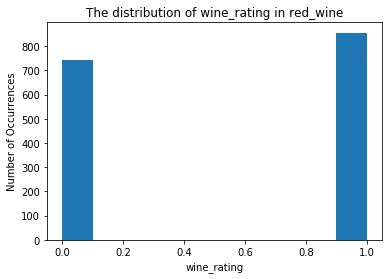

In [195]:
#Histogram of the target variable, "wine_rating"
plt.hist(red_wine.wine_rating)
plt.title("The distribution of wine_rating in red_wine")
plt.xlabel("wine_rating")
plt.ylabel("Number of Occurrences")
plt.show()

In [196]:
#Value counts for the target variable, "wine_rating"
red_wine.wine_rating.value_counts().sort_index()

0.0    744
1.0    855
Name: wine_rating, dtype: int64

In [197]:
#Descriptive statistics for the target variable, "wine_rating"
red_wine["wine_rating"].describe()

count    1599.000000
mean        0.534709
std         0.498950
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: wine_rating, dtype: float64

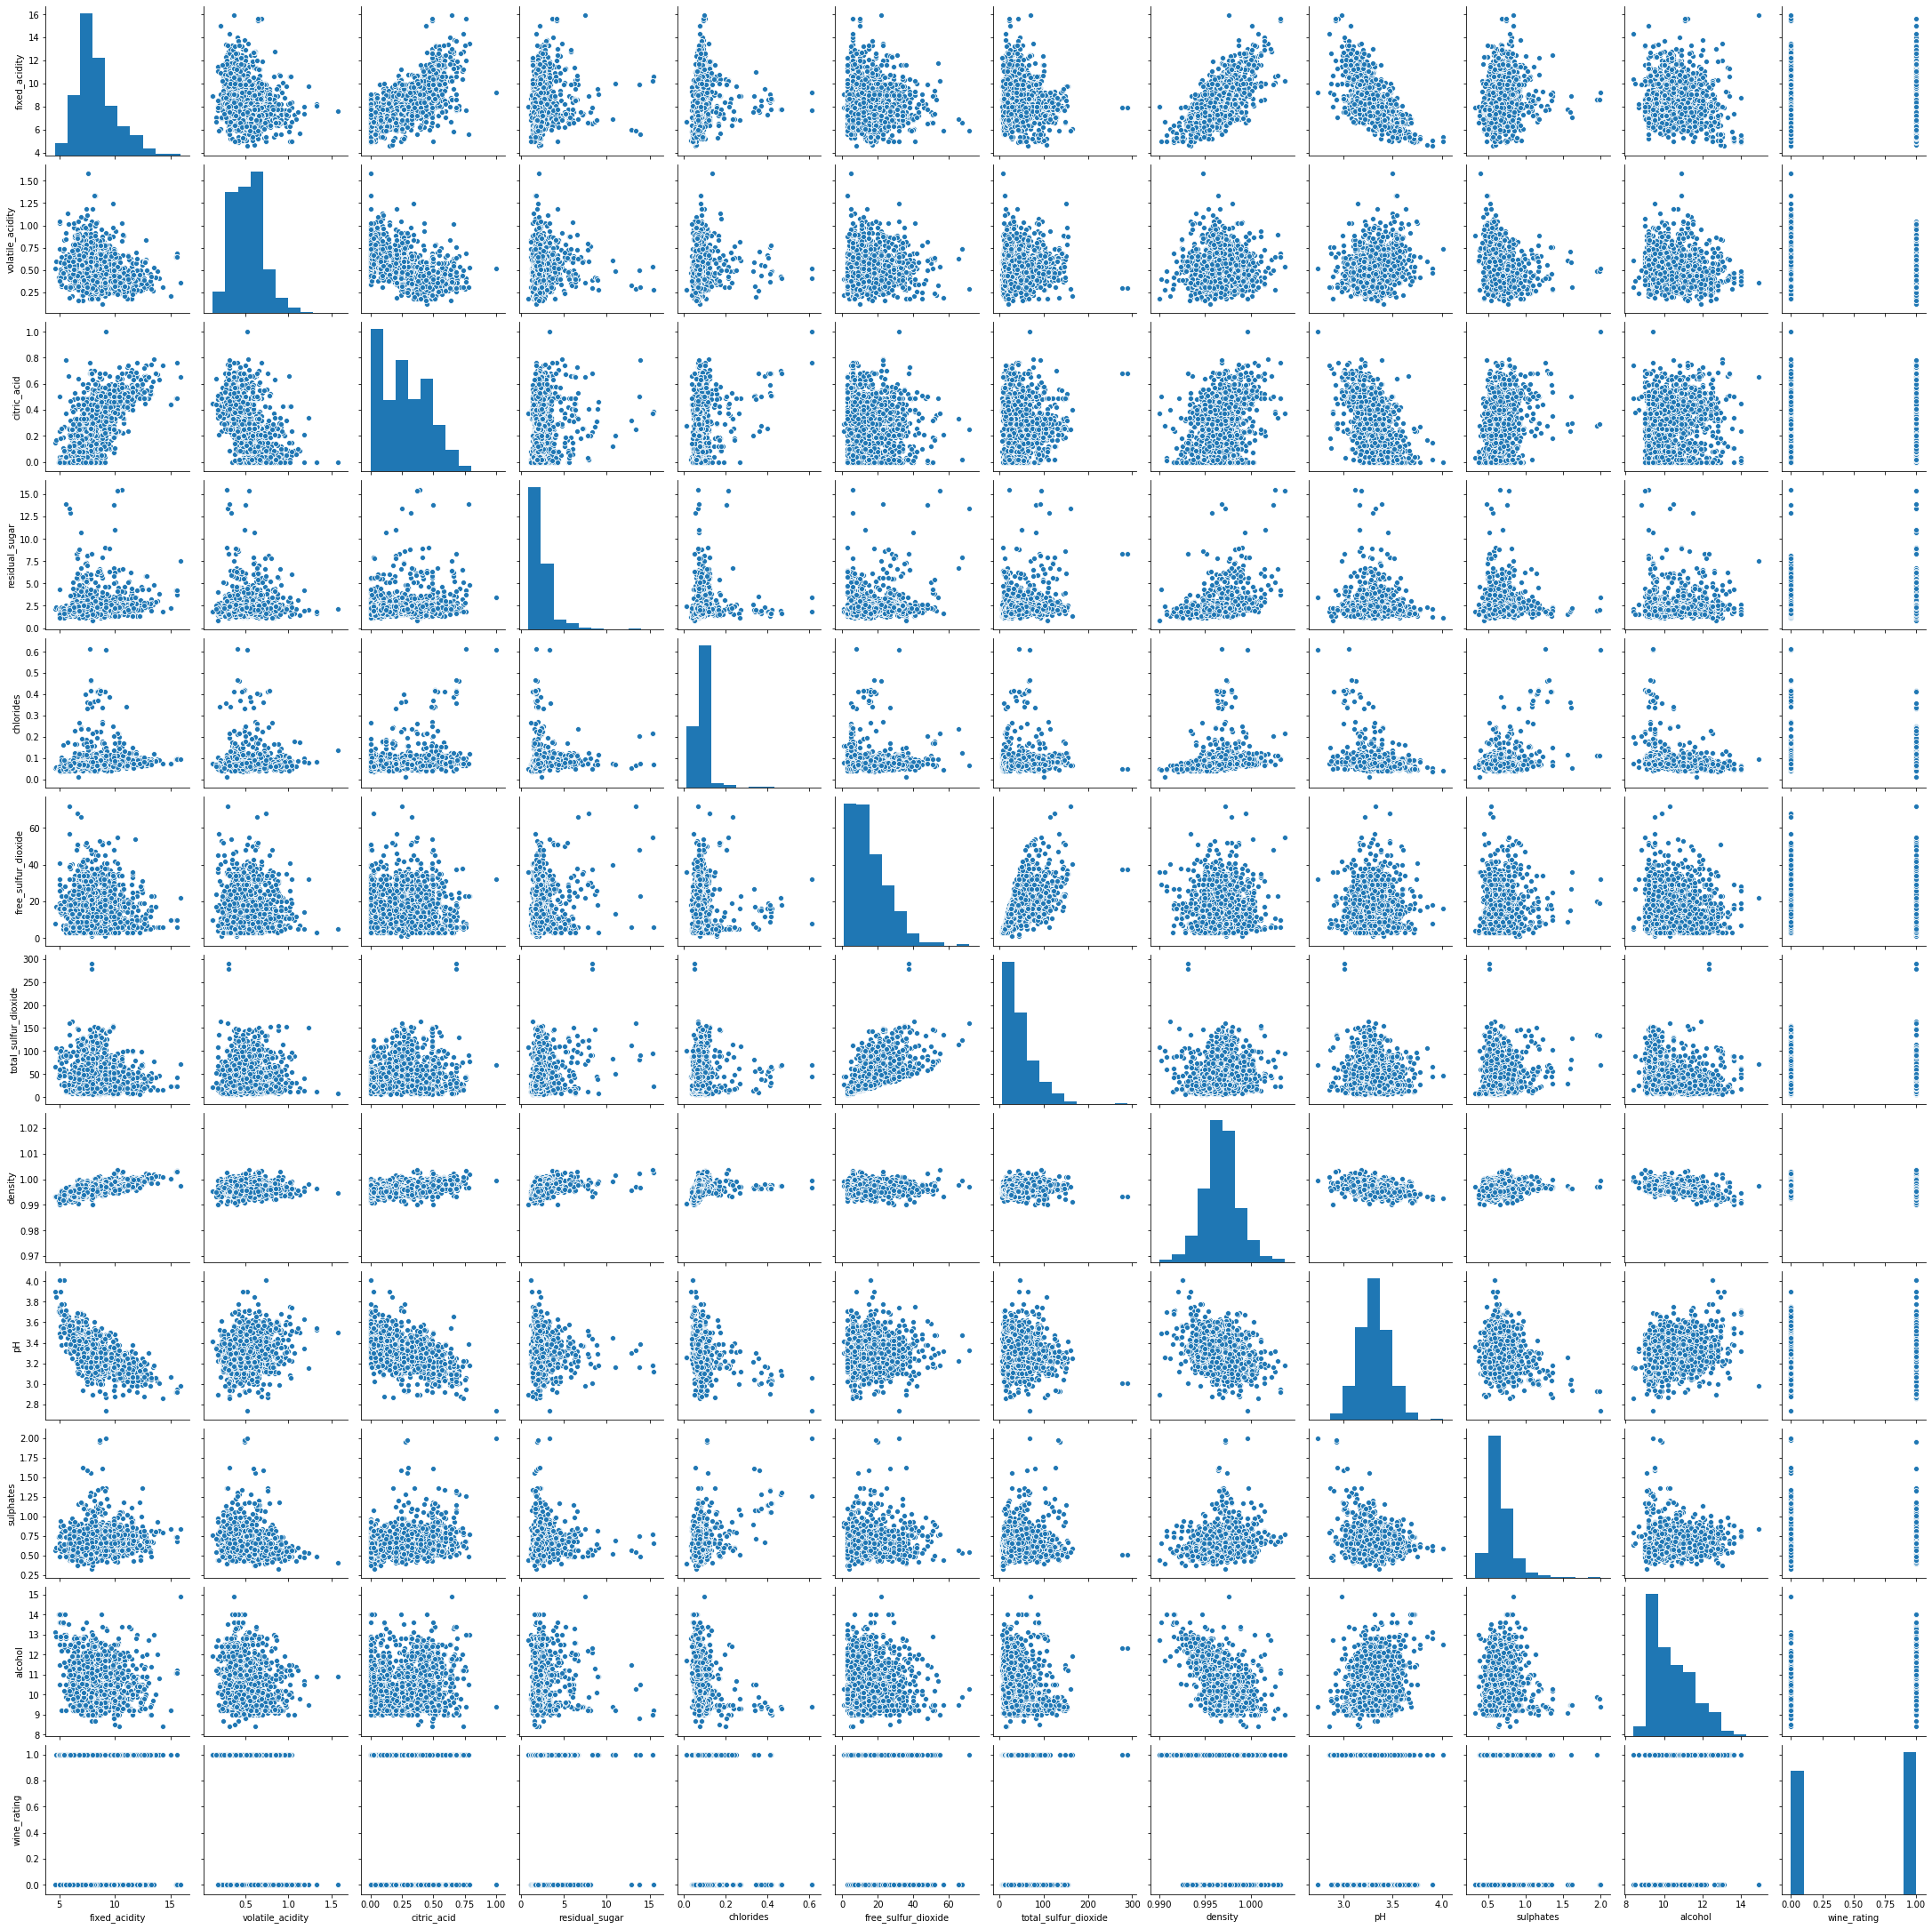

In [198]:
#Pairplot of the variables in red_wine
sns.pairplot(red_wine)

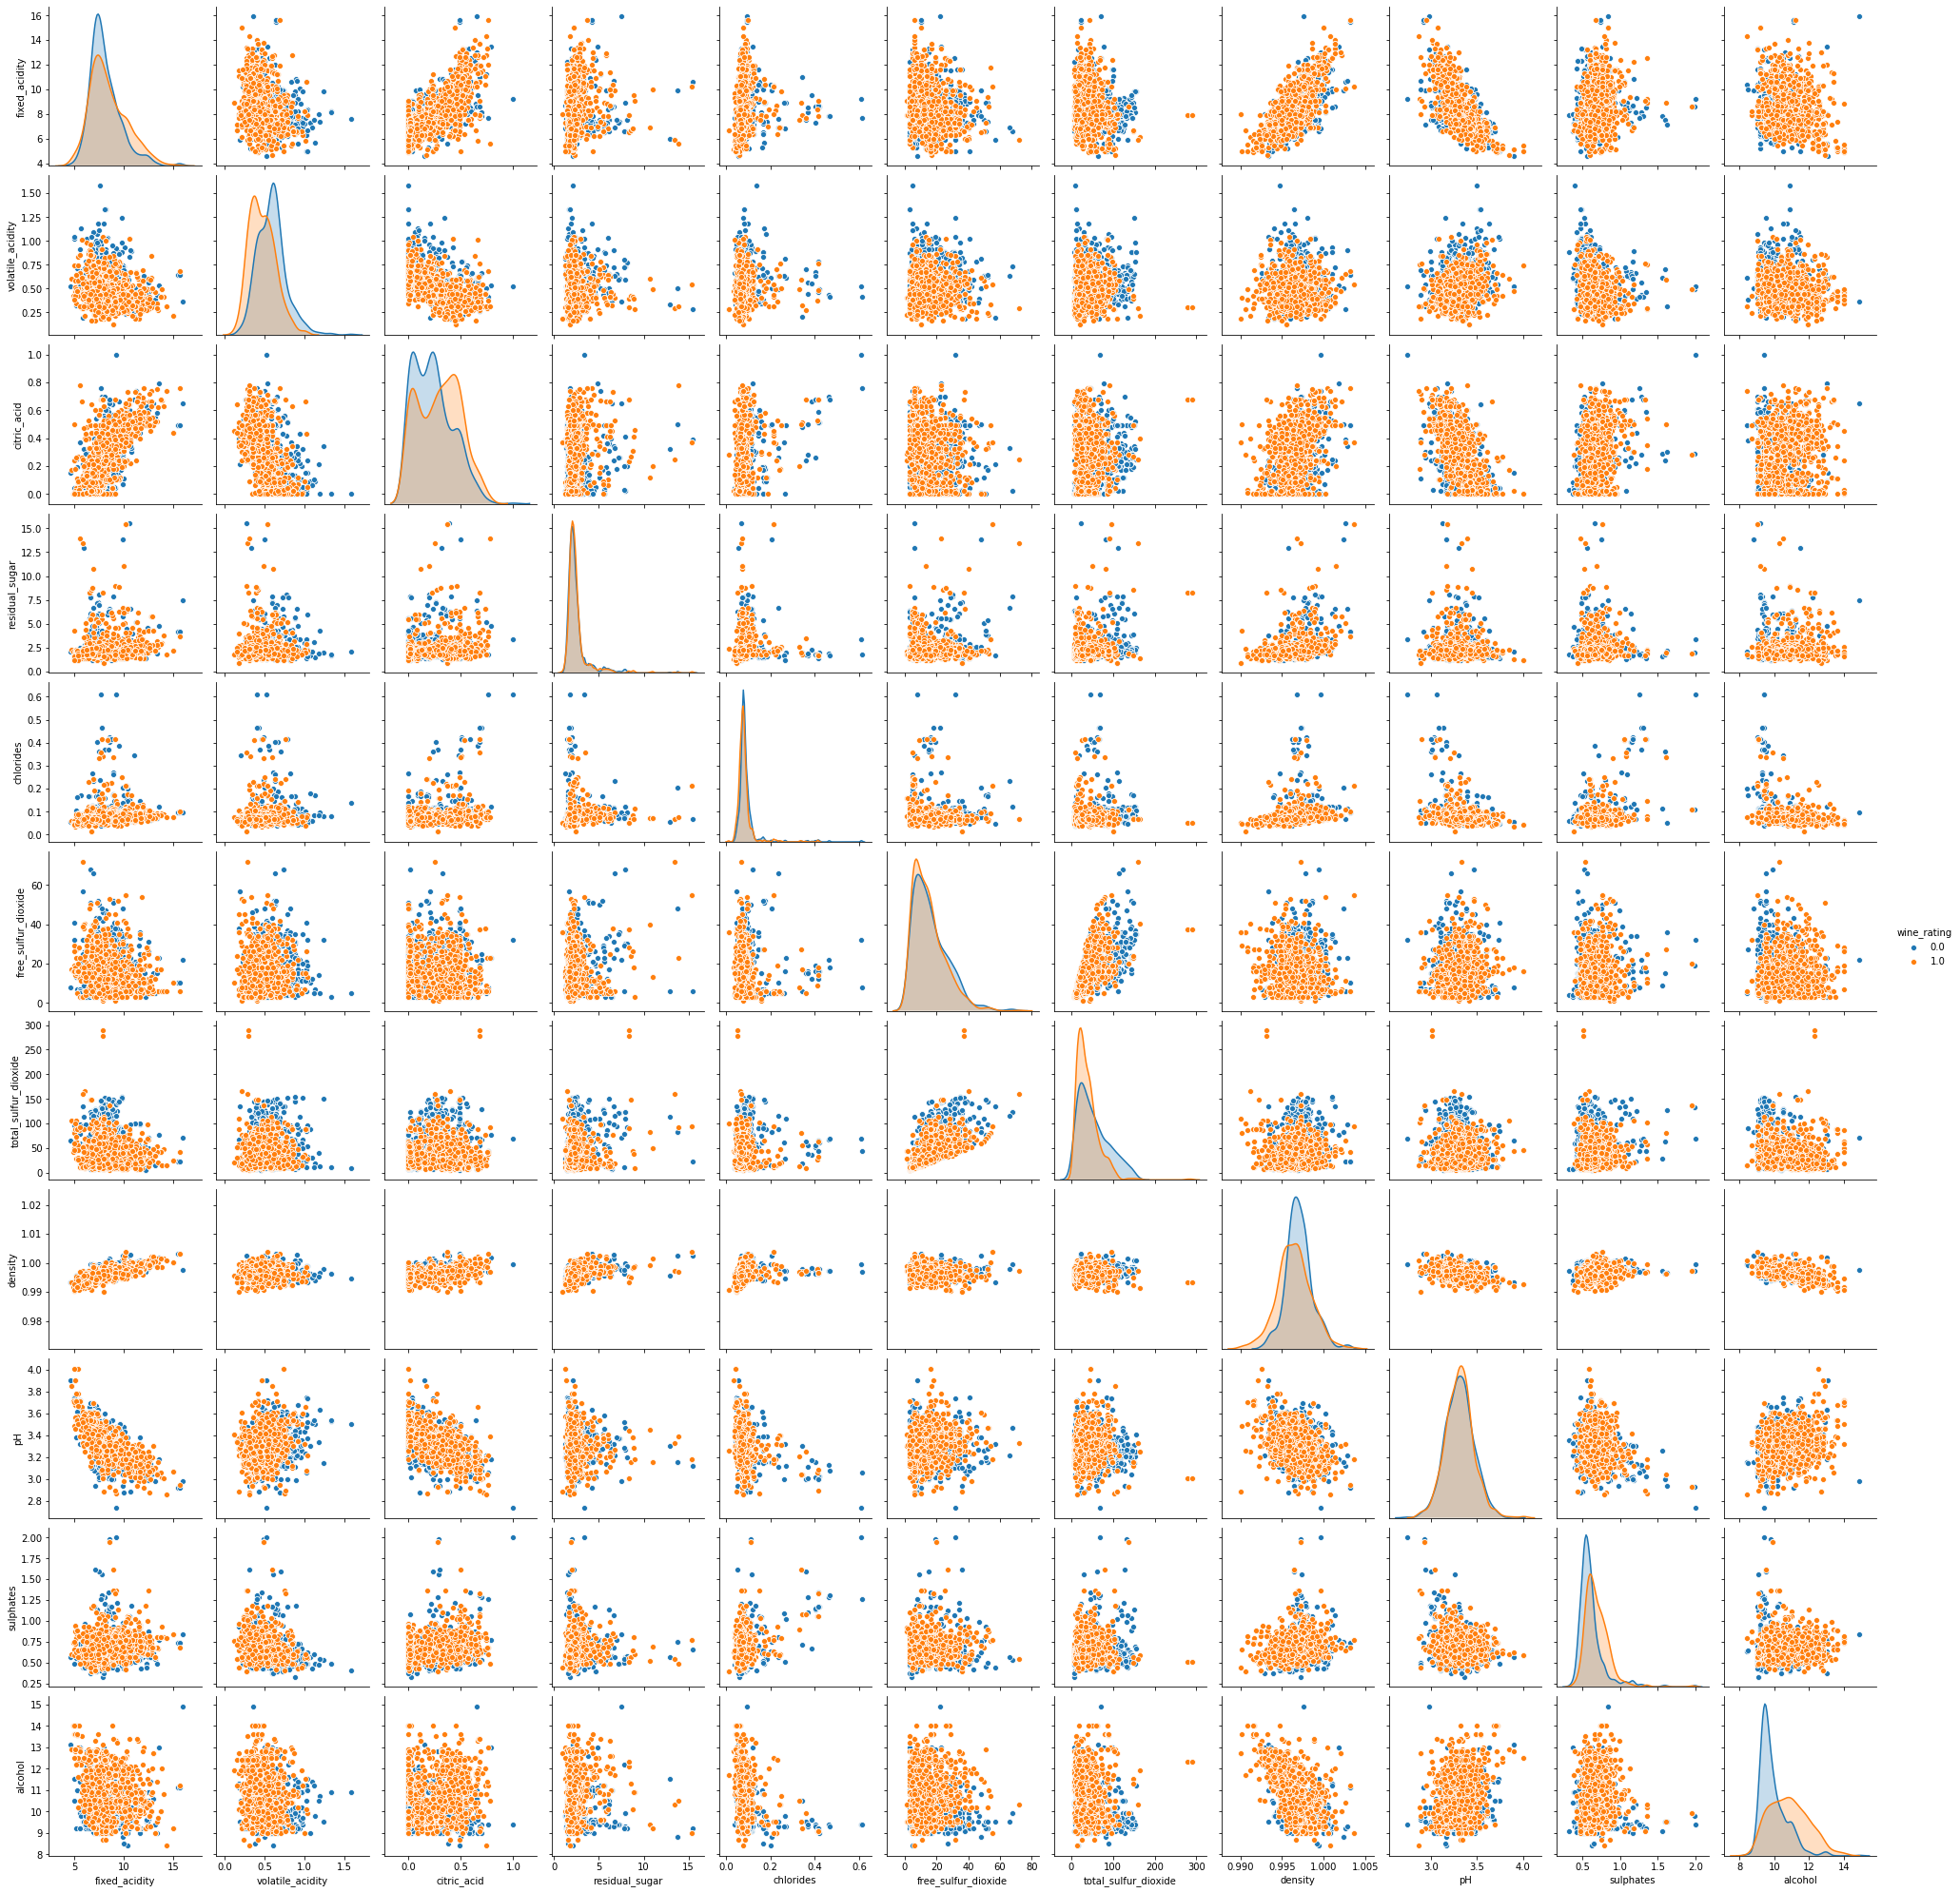

In [199]:
#Pairplot of the variables in red_wine separated by wine_rating
sns.pairplot(red_wine, hue="wine_rating")

In [200]:
#Correlations between variables in red_wine
red_wine.corr()

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.256131     0.671703   
volatile_acidity          -0.256131          1.000000    -0.552496   
citric_acid                0.671703         -0.552496     1.000000   
residual_sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free_sulfur_dioxide       -0.153794         -0.010504    -0.060978   
total_sulfur_dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
wine_rating                0.095093         -0.321441     0.159129   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity               0.114777   0.093705            -0.153794   
volatile_acidity            0.001918   0.061298            -0.010504   
citric_acid                 0.143577   0.203823            -0.060978   
residual_sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free_sulfur_dioxide         0.187049   0.005562             1.000000   
total_sulfur_dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
wine_rating                -0.002160  -0.109494            -0.061757   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile_acidity                  0.076470  0.022026  0.234937  -0.260987   
citric_acid                       0.035533  0.364947 -0.541904   0.312770   
residual_sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free_sulfur_dioxide               0.667666 -0.021946  0.070377   0.051658   
total_sulfur_dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
wine_rating                      -0.231963 -0.159110 -0.003264   0.218072   

                       alcohol  wine_rating  
fixed_acidity        -0.061668     0.095093  
volatile_acidity     -0.202288    -0.321441  
citric_acid           0.109903     0.159129  
residual_sugar        0.042075    -0.002160  
chlorides            -0.221141    -0.109494  
free_sulfur_dioxide  -0.069408    -0.061757  
total_sulfur_dioxide -0.205654    -0.231963  
density              -0.496180    -0.159110  
pH                    0.205633    -0.003264  
sulphates             0.093595     0.218072  
alcohol               1.000000     0.434751  
wine_rating           0.434751     1.000000

In [202]:
#Correlations between variables and "wine_rating" in red_wine
red_wine.corr()['wine_rating']

fixed_acidity           0.095093
volatile_acidity       -0.321441
citric_acid             0.159129
residual_sugar         -0.002160
chlorides              -0.109494
free_sulfur_dioxide    -0.061757
total_sulfur_dioxide   -0.231963
density                -0.159110
pH                     -0.003264
sulphates               0.218072
alcohol                 0.434751
wine_rating             1.000000
Name: wine_rating, dtype: float64

The variables with correlations to wine_rating greater than or equal to the absolute value of 0.10:

volatile_acidity (-0.321), citric_acid (0.159), chlorides (-0.109), total_sulfur_dioxide (-0.231), density (-0.159), sulphates (0.218), alcohol (0.434)

### 1. What are the 6 features most correlated with wine quality?

In the red_wine dataset, the 6 features most correlated with wine quality are alcohol, volatile acidity, total sulfur dioxide, sulphates, citric acid and density.

### Logistic Regression Model

Logistic Regression is a linear classifier for binary classification problems for categorical or continuous variables.

### Logistic Regression Model

In [32]:
start_time=time.time()
print("Logistic Regression Model")
print("")
#Logistic Regression Model
#Training Data
logisticrm = LogisticRegression()

print("~~~Training Data~~~")
print("")

#Fit model
logisticrm.fit(red_X_train, red_y_train)

#Logistic Regression Score
logisticrm_training_score = logisticrm.score(red_X_train, red_y_train)
print("Logistic Regression Model Training Score: {}".format(logisticrm_training_score))
print("")

#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(logisticrm, red_X_train, red_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(logisticrm, red_X_train, red_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(logisticrm, red_X_train, red_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")

#Predictions
red_X_train_predictions = logisticrm.predict(red_X_train)
#Classification Report
red_train_classification_report = classification_report(red_y_train, red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion Matrix
red_train_confusion_matrix = confusion_matrix(red_y_train, red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")

print("~~~Testing Data~~~")
print("")
#Testing Data
#Logistic Regression Score
logisticrm_testing_score = logisticrm.score(red_X_test, red_y_test)
print("Logistic Regression Model Testing Score: {}".format(logisticrm_testing_score))
print("")
#Test data
red_X_test_predictions = logisticrm.predict(red_X_test)

red_test_classification_report = classification_report(red_y_test, red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test, red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test,red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test,red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test,red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test,red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Logistic Regression Model

~~~Training Data~~~

Logistic Regression Model Training Score: 0.7560594214229867

Accuracy
[0.7578125  0.7578125  0.7421875  0.73828125 0.74509804]
cv_scores_accuracy mean: 0.7482383578431373

Precision
[0.76551724 0.81818182 0.75172414 0.75714286 0.75886525]
cv_scores_precision mean: 0.7702862605723941

Recall
[0.79856115 0.71223022 0.78417266 0.76258993 0.77536232]
cv_scores_recall mean: 0.7665832551350225

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.74      0.73       585
         1.0       0.78      0.77      0.77       694

    accuracy                           0.76      1279
   macro avg       0.75      0.75      0.75      1279
weighted avg       0.76      0.76      0.76      1279


Confusion Matrix:
[[431 154]
 [158 536]]


~~~Testing Data~~~

Logistic Regression Model Testing Score: 0.715625

Classification Report:
              precision    recall  f1-score   support

         0.0    

Logistic Regression Model 

Test Data Confusion Matrix:

True Negatives = 117

False Negatives = 49

False Positives = 42

True Positives = 112

Test Data: 

Accuracy Score: 0.715625

Precision Score: 0.7272727272727273

Recall Score: 0.6956521739130435

ROC AUC Score: 0.7157506152584086

The model took 0.5562658309936523 to run.

*Running the Logistic Regression Model with only the features that have a correlation greater than or equal to the absolute value of 0.10 with "wine_rating" did not show an improvement in the performance of the model.

### K-Nearest Neighbors (KNN)

K-Nearest Neighbors can be used for both classification and regression problems. In classification problems, a data point is compared to its k (an integer) closest neighbors and is classified as part of the majority class.

### K-Nearest Neighbors (KNN) Classification Model

In [210]:
start_time=time.time()
print("K-Nearest Neighbors (KNN) Classification Model")
print("")
#KNN Classification Model
#Training Data

knn_classification_model = neighbors.KNeighborsClassifier()

#Fit the model
knn_classification_model.fit(red_X_train, red_y_train)

print("~~~Training Data~~~")
print("")
#KNN Classification Score
knn_classification_model_training_score = knn_classification_model.score(red_X_train, red_y_train)
print("KNN Classification Model Training Score: {}".format(knn_classification_model_training_score))
print("")

#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(knn_classification_model, red_X_train, red_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(knn_classification_model, red_X_train, red_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(knn_classification_model, red_X_train, red_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
red_X_train_predictions = knn_classification_model.predict(red_X_train)

#Classification report
red_train_classification_report = classification_report(red_y_train, red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion matrix
red_train_confusion_matrix = confusion_matrix(red_y_train, red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Logistic Regression Score
knn_classification_model_testing_score = knn_classification_model.score(red_X_test, red_y_test)
print("KNN Classification Model Testing Score: {}".format(knn_classification_model_testing_score))
print("")
red_X_test_predictions = knn_classification_model.predict(red_X_test)
red_test_classification_report = classification_report(red_y_test, red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test, red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test,red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test,red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test,red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test,red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

K-Nearest Neighbors (KNN) Classification Model

~~~Training Data~~~

KNN Classification Model Training Score: 0.8076622361219703

Accuracy
[0.71875    0.703125   0.703125   0.734375   0.70588235]
cv_scores_accuracy mean: 0.7130514705882354

Precision
[0.73758865 0.72340426 0.71428571 0.77952756 0.69811321]
cv_scores_precision mean: 0.7305838777378841

Recall
[0.74820144 0.73381295 0.75539568 0.71223022 0.80434783]
cv_scores_recall mean: 0.7507976227713482

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       585
         1.0       0.82      0.83      0.82       694

    accuracy                           0.81      1279
   macro avg       0.81      0.81      0.81      1279
weighted avg       0.81      0.81      0.81      1279


Confusion Matrix:
[[455 130]
 [116 578]]


~~~Testing Data~~~

KNN Classification Model Testing Score: 0.715625

Classification Report:
              precision    recall  f1-score   suppor

K-Nearest Neighbors (KNN) Classification Model 

Test Data Confusion Matrix:

True Negatives = 104

False Negatives = 36

False Positives = 55

True Positives = 125

Test Data: 

Accuracy Score: 0.715625

Precision Score: 0.6944444444444444

Recall Score: 0.7763975155279503

ROC AUC Score: 0.7152427829212079

The model took 0.5308890342712402 to run.

### K-Nearest Neighbors (KNN) Classification Model with Gridsearch

In [211]:
start_time=time.time()
#Grid search for k value
params_knn_classification_grid = {'n_neighbors': np.arange(1,101)}

knn_classification = neighbors.KNeighborsClassifier()

knn_classification_gridsearch = GridSearchCV(knn_classification, params_knn_classification_grid, cv=5)

#Fit the model to the training data
knn_classification_gridsearch.fit(red_X_train, red_y_train)

#Best k value, from the model
knn_classification_gridsearch_parameters = knn_classification_gridsearch.best_params_

print("Best parameter: {}".format(knn_classification_gridsearch_parameters))

Best parameter: {'n_neighbors': 54}


In [212]:
print("K-Nearest Neighbors (KNN) Classification Model with Gridsearch")
print("")
#KNN Classification Model
#Training Data

#Run the classification model (n_neighbors=54)
knn_classification_model = neighbors.KNeighborsClassifier (n_neighbors=54)

knn_classification_model.fit(red_X_train, red_y_train)

print("~~~Training Data~~~")
print("")
#Training Data
#KNN Classification Score
knn_classification_model_training_score = knn_classification_model.score(red_X_train, red_y_train)
print("KNN Classification Model with Gridsearch Training Score: {}".format(knn_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(knn_classification_model, red_X_train, red_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(knn_classification_model, red_X_train, red_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(knn_classification_model, red_X_train, red_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
red_X_train_predictions = knn_classification_model.predict(red_X_train)

#Classification Report
red_train_classification_report = classification_report(red_y_train, red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion Matrix
red_train_confusion_matrix = confusion_matrix(red_y_train, red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Logistic Regression Score
knn_classification_model_testing_score = knn_classification_model.score(red_X_test, red_y_test)
print("KNN Classification Model with Gridsearch Testing Score: {}".format(knn_classification_model_testing_score))
print("")
#Test data
red_X_test_predictions = knn_classification_model.predict(red_X_test)

red_test_classification_report = classification_report(red_y_test, red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test, red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy score: {}".format(accuracy_score(red_y_test,red_X_test_predictions)))
#Precision Score
print("Precision score: {}".format(precision_score(red_y_test,red_X_test_predictions)))
#Recall Score
print("Recall score: {}".format(recall_score(red_y_test,red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test,red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

K-Nearest Neighbors (KNN) Classification Model with Gridsearch

~~~Training Data~~~

KNN Classification Model with Gridsearch Training Score: 0.7584050039093041

Accuracy
[0.765625   0.7734375  0.72265625 0.71484375 0.75294118]
cv_scores_accuracy mean: 0.7459007352941176

Precision
[0.77241379 0.824      0.73287671 0.72       0.75167785]
cv_scores_precision mean: 0.7601936715562416

Recall
[0.8057554  0.74100719 0.76978417 0.77697842 0.8115942 ]
cv_scores_recall mean: 0.7810238765509332

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73       585
         1.0       0.77      0.79      0.78       694

    accuracy                           0.76      1279
   macro avg       0.76      0.76      0.76      1279
weighted avg       0.76      0.76      0.76      1279


Confusion Matrix:
[[425 160]
 [149 545]]


~~~Testing Data~~~

KNN Classification Model with Gridsearch Testing Score: 0.75625

Classification Report:
     

K-Nearest Neighbors (KNN) Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 121

False Negatives = 40

False Positives = 38

True Positives = 121

Test Data: 

Accuracy score: 0.75625

Precision score: 0.7610062893081762

Recall score: 0.7515527950310559

ROC AUC Score: 0.756279542169616

The model took 11.018490076065063 to run.

### K-Nearest Neighbors (KNN) Weighted Classification

In the weighted K-Nearest Neighbors Classification, more weight is given to closer data points and less weight is given to further data points from the point that is being classified.

In [213]:
start_time=time.time()
print("K-Nearest Neighbors (KNN) Weighted Classification Model")
print("")
#KNN Weighted Classification Model
knn_classification_weighted_model = neighbors.KNeighborsClassifier (weights='distance')
print("")
#Training Data
#Fit the model
knn_classification_weighted_model.fit(red_X_train, red_y_train)

print("~~~Training Data~~~")
print("")
#Training Data
#Weighted KNN Classification Score
knn_classification_weighted_model_training_score = knn_classification_weighted_model.score(red_X_train, red_y_train)
print("KNN Weighted Classification Model Training Score: {}".format(knn_classification_weighted_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(knn_classification_weighted_model, red_X_train, red_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(knn_classification_weighted_model, red_X_train, red_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(knn_classification_weighted_model, red_X_train, red_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
red_X_train_predictions = knn_classification_weighted_model.predict(red_X_train)

#Classification Report
red_train_classification_report = classification_report(red_y_train, red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion Matrix
red_train_confusion_matrix = confusion_matrix(red_y_train, red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Weighted KNN Classification Score
knn_classification_weighted_model_testing_score = knn_classification_weighted_model.score(red_X_test, red_y_test)
print("KNN Weighted Classification Model Testing Score: {}".format(knn_classification_weighted_model_testing_score))
print("")
#Predictions
red_X_test_predictions = knn_classification_weighted_model.predict(red_X_test)

red_test_classification_report = classification_report(red_y_test, red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test, red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test,red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test,red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test,red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test,red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

K-Nearest Neighbors (KNN) Weighted Classification Model


~~~Training Data~~~

KNN Weighted Classification Model Training Score: 1.0

Accuracy
[0.765625   0.76171875 0.7421875  0.765625   0.75294118]
cv_scores_accuracy mean: 0.7576194852941176

Precision
[0.77622378 0.77857143 0.74496644 0.81102362 0.73584906]
cv_scores_precision mean: 0.7693268652798485

Recall
[0.79856115 0.78417266 0.79856115 0.74100719 0.84782609]
cv_scores_recall mean: 0.7940256490459806

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       585
         1.0       1.00      1.00      1.00       694

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279


Confusion Matrix:
[[585   0]
 [  0 694]]


~~~Testing Data~~~

KNN Weighted Classification Model Testing Score: 0.809375

Classification Report:
              precision    recall  f1-s

K-Nearest Neighbors (KNN) Weighted Classification Model 

Test Data Confusion Matrix:

True Negatives = 121

False Negatives = 23

False Positives = 38

True Positives = 138

Test Data: 

Accuracy Score: 0.809375

Precision Score: 0.7840909090909091

Recall Score: 0.8571428571428571

ROC AUC Score: 0.8090745732255167

The model took 0.2368481159210205 to run.

### K-Nearest Neighbors (KNN) Weighted Classification Model with Gridsearch

In [214]:
start_time=time.time()
#KNN Classification with Distance Weights
#Grid search for k value
params_knn_classification_weighted_grid = {'n_neighbors': np.arange(1,101)}

knn_classification_weighted = neighbors.KNeighborsClassifier(weights='distance')

knn_classification_weighted_gridsearch = GridSearchCV(knn_classification_weighted, params_knn_classification_weighted_grid, cv=5)

#Fit the model to the training data
knn_classification_weighted_gridsearch.fit(red_X_train, red_y_train)

#Best k value, from the model
knn_classification_weighted_gridsearch_parameters = knn_classification_weighted_gridsearch.best_params_

print("Best parameter: {}".format(knn_classification_weighted_gridsearch_parameters))

Best parameter: {'n_neighbors': 100}


In [215]:
print("K-Nearest Neighbors (KNN) Weighted Classification Model with Gridsearch")
print("")
#Run a weighted classification model (n_neighbors=100)
knn_classification_weighted_model = neighbors.KNeighborsClassifier (n_neighbors=100, weights='distance')

#Training Data
knn_classification_weighted_model.fit(red_X_train, red_y_train)

print("~~~Training Data~~~")
print("")
#KNN Weighted Classification Score
knn_classification_weighted_model_training_score = knn_classification_weighted_model.score(red_X_train, red_y_train)
print("KNN Weighted Classification Model with Gridsearch Training Score: {}".format(knn_classification_weighted_model_training_score))
print("")

#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(knn_classification_weighted_model, red_X_train, red_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(knn_classification_weighted_model, red_X_train, red_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(knn_classification_weighted_model, red_X_train, red_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
red_X_train_predictions = knn_classification_weighted_model.predict(red_X_train)

#Classification Report
red_train_classification_report = classification_report(red_y_train, red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion Matrix
red_train_confusion_matrix = confusion_matrix(red_y_train, red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#KNN Weighted Classification Score
knn_classification_weighted_model_testing_score = knn_classification_weighted_model.score(red_X_test, red_y_test)
print("KNN Weighted Classification Model with Gridsearch Testing Score: {}".format(knn_classification_weighted_model_testing_score))
print("")
#Predictions
red_X_test_predictions = knn_classification_weighted_model.predict(red_X_test)

red_test_classification_report = classification_report(red_y_test, red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test, red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test,red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test,red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test,red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test,red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

K-Nearest Neighbors (KNN) Weighted Classification Model with Gridsearch

~~~Training Data~~~

KNN Weighted Classification Model with Gridsearch Training Score: 1.0

Accuracy
[0.80078125 0.81640625 0.76953125 0.7890625  0.78431373]
cv_scores_accuracy mean: 0.7920189950980392

Precision
[0.78571429 0.85384615 0.7739726  0.7852349  0.7862069 ]
cv_scores_precision mean: 0.7969949676361496

Recall
[0.8705036  0.79856115 0.81294964 0.84172662 0.82608696]
cv_scores_recall mean: 0.8299655927431967

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       585
         1.0       1.00      1.00      1.00       694

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279


Confusion Matrix:
[[585   0]
 [  0 694]]


~~~Testing Data~~~

KNN Weighted Classification Model with Gridsearch Testing Score: 0.784375

Classification 

K-Nearest Neighbors (KNN) Weighted Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 125

False Negatives = 35

False Positives = 34

True Positives = 126

Test Data: 

Accuracy Score: 0.784375

Precision Score: 0.7875

Recall Score: 0.782608695652174

ROC AUC Score: 0.7843861088323764

The model took 10.860789060592651 to run.

### Decision Tree

Decision Trees can be used for both classification and regression problems. In classification, decision trees partition data into subsets based on classification features until homogeneous classes are left. 

### Decision Tree Classification

In [216]:
start_time=time.time()
print("Decision Tree Classification Model")
print("")
#Decision Tree Classification Model
#Training Data
decision_tree_classification_model = tree.DecisionTreeClassifier()

#Fit the Model
decision_tree_classification_model.fit(red_X_train, red_y_train)

print("~~~Training Data~~~")
print("")
#Training Data
#Decision Tree Classification Score
decision_tree_classification_model_training_score = decision_tree_classification_model.score(red_X_train, red_y_train)
print("Decision Tree Classification Model Training Score: {}".format(decision_tree_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(decision_tree_classification_model, red_X_train, red_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(decision_tree_classification_model, red_X_train, red_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(decision_tree_classification_model, red_X_train, red_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
red_X_train_predictions = decision_tree_classification_model.predict(red_X_train)

#Classification Report
red_train_classification_report = classification_report(red_y_train, red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion Matrix
red_train_confusion_matrix = confusion_matrix(red_y_train, red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Decision Tree Score
decision_tree_classification_model_testing_score = decision_tree_classification_model.score(red_X_test, red_y_test)
print("Decision Tree Classification Model Testing Score: {}".format(decision_tree_classification_model_testing_score))
print("")
#Predictions
red_X_test_predictions = decision_tree_classification_model.predict(red_X_test)

red_test_classification_report = classification_report(red_y_test, red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test, red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test,red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test,red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test,red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test,red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Decision Tree Classification Model

~~~Training Data~~~

Decision Tree Classification Model Training Score: 1.0

Accuracy
[0.734375   0.75       0.7109375  0.72265625 0.76470588]
cv_scores_accuracy mean: 0.7365349264705883

Precision
[0.76642336 0.76086957 0.74045802 0.776      0.77464789]
cv_scores_precision mean: 0.7636797650945488

Recall
[0.72661871 0.73381295 0.69784173 0.67625899 0.76086957]
cv_scores_recall mean: 0.7190803878636223

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       585
         1.0       1.00      1.00      1.00       694

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279


Confusion Matrix:
[[585   0]
 [  0 694]]


~~~Testing Data~~~

Decision Tree Classification Model Testing Score: 0.75

Classification Report:
              precision    recall  f1-score   support

        

Decision Tree Classification Model 

Test Data Confusion Matrix:

True Negatives = 117

False Negatives = 38

False Positives = 42

True Positives = 123

Test Data: 

Accuracy Score: 0.75

Precision Score: 0.7454545454545455

Recall Score: 0.7639751552795031

ROC AUC Score: 0.7499121059416384

The model took 0.16227102279663086 to run.

### Decision Tree Classification with Gridsearch

In [217]:
start_time=time.time()
#Decision Tree Classification
#Grid search for max_depth, min_samples_split and max_features
params_decision_tree_classification_grid = {'max_depth': np.arange(1,21), 'min_samples_split': np.arange(1,21), 'max_features': np.arange(1,21)}

decision_tree_classification = tree.DecisionTreeClassifier()

decision_tree_classification_gridsearch = GridSearchCV(decision_tree_classification, params_decision_tree_classification_grid, cv=5)

#Fit the model to the training data
decision_tree_classification_gridsearch.fit(red_X_train, red_y_train)

#Best values, from the model
decision_tree_gridsearch_parameters = decision_tree_classification_gridsearch.best_params_

print("Best parameters: {}".format(decision_tree_gridsearch_parameters))

Best parameters: {'max_depth': 15, 'max_features': 5, 'min_samples_split': 2}


In [218]:
print("Decision Tree Classification Model with Gridsearch")
print("")
#Run the decision tree classification model (max_depth=15, max_features=5, min_samples_split=2)
decision_tree_classification_model = tree.DecisionTreeClassifier(max_depth=15, max_features=5, min_samples_split=2)
#Training Data
#Fit to the model
decision_tree_classification_model.fit(red_X_train, red_y_train)


print("~~~Training Data~~~")
print("")
#Training Data
#Decision Tree Classification Score
decision_tree_classification_model_training_score = decision_tree_classification_model.score(red_X_train, red_y_train)
print("Decision Tree Classification Model with Gridsearch Training Score: {}".format(decision_tree_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(decision_tree_classification_model, red_X_train, red_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(decision_tree_classification_model, red_X_train, red_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(decision_tree_classification_model, red_X_train, red_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
red_X_train_predictions = decision_tree_classification_model.predict(red_X_train)

#Classification Report
red_train_classification_report = classification_report(red_y_train, red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion Matrix
red_train_confusion_matrix = confusion_matrix(red_y_train, red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Decision Tree Classification Score
decision_tree_classification_model_testing_score = decision_tree_classification_model.score(red_X_test, red_y_test)
print("Decision Tree Classification Model with Gridsearch Testing Score: {}".format(decision_tree_classification_model_testing_score))
print("")
#Test data
red_X_test_predictions = decision_tree_classification_model.predict(red_X_test)

red_test_classification_report = classification_report(red_y_test, red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test, red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test,red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test,red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test,red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test,red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Decision Tree Classification Model with Gridsearch

~~~Training Data~~~

Decision Tree Classification Model with Gridsearch Training Score: 0.9953088350273651

Accuracy
[0.71484375 0.80078125 0.74609375 0.73828125 0.79215686]
cv_scores_accuracy mean: 0.7584313725490196

Precision
[0.73282443 0.8057554  0.71942446 0.75968992 0.75714286]
cv_scores_precision mean: 0.7549674126439002

Recall
[0.79136691 0.75539568 0.76258993 0.67625899 0.77536232]
cv_scores_recall mean: 0.7521947659263893

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       585
         1.0       1.00      0.99      1.00       694

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279


Confusion Matrix:
[[584   1]
 [  5 689]]


~~~Testing Data~~~

Decision Tree Classification Model with Gridsearch Testing Score: 0.73125

Classification Repor

Decision Tree Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 118

False Negatives = 45

False Positives = 41

True Positives = 116

Test Data: 

Accuracy Score: 0.73125

Precision Score: 0.7388535031847133

Recall Score: 0.7204968944099379

ROC AUC Score: 0.7313176295949062

The model took 97.34772300720215 to run.

### Random Forest

Random Forests are an ensemble method that can be used for both classification and regression problems. In classification, random forests consist of many decision trees and classify a point based on the mode across decision trees. 

### Random Forest Classification Model

In [318]:
start_time=time.time()
print("Random Forest Classification Model")
print("")
#Run the Random Forest Classification Model
random_forest_classification_model = RandomForestClassifier()

#Training Data
random_forest_classification_model.fit(red_X_train, red_y_train)

print("~~~Training Data~~~")
print("")
#Training Data
#Random Forest Classification Score
random_forest_classification_model_training_score = random_forest_classification_model.score(red_X_train, red_y_train)
print("Random Forest Classification Model Training Score: {}".format(random_forest_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(random_forest_classification_model, red_X_train, red_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(random_forest_classification_model, red_X_train, red_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(random_forest_classification_model, red_X_train, red_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
red_X_train_predictions = random_forest_classification_model.predict(red_X_train)

#Classification Report
red_train_classification_report = classification_report(red_y_train, red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion Matrix
red_train_confusion_matrix = confusion_matrix(red_y_train, red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Random Forest Classification Score
random_forest_classification_model_testing_score = random_forest_classification_model.score(red_X_test, red_y_test)
print("Random Forest Classification Model Testing Score: {}".format(random_forest_classification_model_testing_score))
print("")
#Test data
red_X_test_predictions = random_forest_classification_model.predict(red_X_test)

red_test_classification_report = classification_report(red_y_test, red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test, red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test,red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test,red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test,red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test,red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Random Forest Classification Model

~~~Training Data~~~

Random Forest Classification Model Training Score: 1.0

Accuracy
[0.796875   0.8125     0.80078125 0.8125     0.82352941]
cv_scores_accuracy mean: 0.8092371323529411

Precision
[0.79577465 0.83076923 0.78378378 0.84328358 0.80714286]
cv_scores_precision mean: 0.8121508203345496

Recall
[0.82014388 0.8057554  0.84172662 0.79856115 0.83333333]
cv_scores_recall mean: 0.8199040767386091

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       585
         1.0       1.00      1.00      1.00       694

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279


Confusion Matrix:
[[585   0]
 [  0 694]]


~~~Testing Data~~~

Random Forest Classification Model Testing Score: 0.840625

Classification Report:
              precision    recall  f1-score   support

    

Random Forest Classification Model 

Test Data Confusion Matrix:

True Negatives = 134

False Negatives = 26

False Positives = 25

True Positives = 135

Test Data: 

Accuracy Score: 0.840625

Precision Score: 0.84375

Recall Score: 0.8385093167701864

ROC AUC Score: 0.8406383061838354

The model took 3.89436411857605 to run.

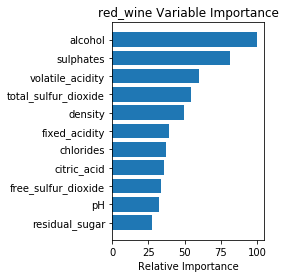

In [320]:
#Feature importance of the Random Forest Classification Model
feature_importance = random_forest_classification_model.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, red_wine.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('red_wine Variable Importance')
plt.show()
#alcohol, sulphates and volatile_acidity are the three most important variables in determining wine quality.

### 3. What are the 5 most important features in this model?

In the red_wine Random Forest Model, the 5 most important features are alcohol, sulphates, volatile acidity, total sulfur dioxide and density.

### Random Forest Classification Model with Gridsearch

In [220]:
start_time=time.time()
#Random Forest Classification
#Grid search for max_depth, min_samples_split and max_features
params_random_forest_classification_grid = {'max_depth': np.arange(1,11), 'min_samples_split': np.arange(1,11), 'max_features': np.arange(1,11)}

random_forest_classification = RandomForestClassifier()

random_forest_classification_gridsearch = GridSearchCV(random_forest_classification, params_random_forest_classification_grid, cv=5)

#Fit the model to the training data
random_forest_classification_gridsearch.fit(red_X_train, red_y_train)

#Best values, from the model
random_forest_gridsearch_parameters = random_forest_classification_gridsearch.best_params_
print("Best parameters: {}".format(random_forest_gridsearch_parameters))

Best parameters: {'max_depth': 9, 'max_features': 2, 'min_samples_split': 3}


In [222]:
print("Random Forest Classification Model with Gridsearch")
print("")
#Training Data
#Run the random forest classification model (max_depth=9, max_features=2, min_samples_split=3)
random_forest_classification_model = RandomForestClassifier(max_depth=9, max_features=2, min_samples_split=3)

random_forest_classification_model.fit(red_X_train, red_y_train)


print("~~~Training Data~~~")
print("")
#Training Data
#KNN Classification Score
random_forest_classification_model_training_score = random_forest_classification_model.score(red_X_train, red_y_train)
print("Random Forest Classification Model with Gridsearch Training Score: {}".format(random_forest_classification_model_training_score))
print("")
#Cross Validation Scores

#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(random_forest_classification_model, red_X_train, red_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(random_forest_classification_model, red_X_train, red_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(random_forest_classification_model, red_X_train, red_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions on training data
red_X_train_predictions = random_forest_classification_model.predict(red_X_train)

#Classification report on training data
red_train_classification_report = classification_report(red_y_train, red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion matrix on training data
red_train_confusion_matrix = confusion_matrix(red_y_train, red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Random Forest Classification Model Score
random_forest_classification_model_testing_score = random_forest_classification_model.score(red_X_test, red_y_test)
print("Random Forest Classification Model with Gridsearch Testing Score: {}".format(random_forest_classification_model_testing_score))
print("")
#Test data
red_X_test_predictions = random_forest_classification_model.predict(red_X_test)

red_test_classification_report = classification_report(red_y_test, red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test, red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test,red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test,red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test,red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test,red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Random Forest Classification Model with Gridsearch

~~~Training Data~~~

Random Forest Classification Model with Gridsearch Training Score: 0.9585613760750586

Accuracy
[0.80078125 0.80859375 0.75390625 0.8203125  0.8       ]
cv_scores_accuracy mean: 0.7967187499999999

Precision
[0.8137931  0.84090909 0.77852349 0.81343284 0.78767123]
cv_scores_precision mean: 0.806865950597572

Recall
[0.83453237 0.83453237 0.82733813 0.78417266 0.83333333]
cv_scores_recall mean: 0.8227817745803356

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       585
         1.0       0.96      0.97      0.96       694

    accuracy                           0.96      1279
   macro avg       0.96      0.96      0.96      1279
weighted avg       0.96      0.96      0.96      1279


Confusion Matrix:
[[555  30]
 [ 23 671]]


~~~Testing Data~~~

Random Forest Classification Model with Gridsearch Testing Score: 0.80625

Classification Report

Random Forest Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 129

False Negatives = 32

False Positives = 30

True Positives = 129

Test Data: 

Accuracy Score: 0.80625

Precision Score: 0.8113207547169812

Recall Score: 0.8012422360248447

ROC AUC Score: 0.806281495370913

The model took 937.598475933075 to run.

### Support Vector Machine (SVM)

Support Vector Machines can be used for both classification and regression problems. In classification, support vector machines create either a line or hyperplane to separate data into classes. 

### Support Vector Machine Classification Model

In [223]:
start_time=time.time()
print("Support Vector Machine Classification Model")
print("")
#Training Data
#Run the Support Vector Machine Classification Model
support_vector_classification_model = SVC()

support_vector_classification_model.fit(red_X_train, red_y_train)

print("~~~Training Data~~~")
print("")
#Training Data
#Support Vector Machine Classification Score
support_vector_classification_model_training_score = support_vector_classification_model.score(red_X_train, red_y_train)
print("Support Vector Machine Classification Model Training Score: {}".format(support_vector_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(support_vector_classification_model, red_X_train, red_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(support_vector_classification_model, red_X_train, red_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(support_vector_classification_model, red_X_train, red_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions on training data
red_X_train_predictions = support_vector_classification_model.predict(red_X_train)

#Classification report on training data
red_train_classification_report = classification_report(red_y_train, red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion matrix on training data
red_train_confusion_matrix = confusion_matrix(red_y_train, red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Support Vector Machine Score
support_vector_classification_model_testing_score = support_vector_classification_model.score(red_X_test, red_y_test)
print("Support Vector Machine Classification Model Testing Score: {}".format(support_vector_classification_model_testing_score))
print("")
#Test data
red_X_test_predictions = support_vector_classification_model.predict(red_X_test)

red_test_classification_report = classification_report(red_y_test, red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test, red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test,red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test,red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test,red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test,red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Support Vector Machine Classification Model

~~~Training Data~~~

Support Vector Machine Classification Model Training Score: 0.8021892103205629

Accuracy
[0.78125    0.78125    0.75       0.74609375 0.74117647]
cv_scores_accuracy mean: 0.7599540441176471

Precision
[0.80740741 0.83739837 0.76223776 0.78030303 0.76470588]
cv_scores_precision mean: 0.7904104912569762

Recall
[0.78417266 0.74100719 0.78417266 0.74100719 0.75362319]
cv_scores_recall mean: 0.7607965801272025

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79       585
         1.0       0.83      0.80      0.81       694

    accuracy                           0.80      1279
   macro avg       0.80      0.80      0.80      1279
weighted avg       0.80      0.80      0.80      1279


Confusion Matrix:
[[469 116]
 [137 557]]


~~~Testing Data~~~

Support Vector Machine Classification Model Testing Score: 0.746875

Classification Report:
              pre

Support Vector Machine Classification Model 

Test Data Confusion Matrix:

True Negatives = 124

False Negatives = 46

False Positives = 35

True Positives = 115

Test Data: 

Accuracy Score: 0.746875

Precision Score: 0.7666666666666667

Recall Score: 0.7142857142857143

ROC AUC Score: 0.7470799640610962

The model took 0.6887800693511963 to run.

### Support Vector Machine Classification Model with Gridsearch

In [224]:
start_time=time.time()
#Support Vector Machine Classification
#Grid search for C, gamma
params_support_vector_classification_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

support_vector_classification = SVC()

support_vector_classification_gridsearch = GridSearchCV(support_vector_classification, params_support_vector_classification_grid, cv=5)

#Fit the model to the training data
support_vector_classification_gridsearch.fit(red_X_train, red_y_train)

#Best values, from the model
support_vector_gridsearch_parameters = support_vector_classification_gridsearch.best_params_
print("Best parameters: {}".format(support_vector_gridsearch_parameters))

Best parameters: {'C': 1000, 'gamma': 0.001}


In [225]:
#Training Data
print("Support Vector Machine Classification Model with Gridsearch")
#Run the Support Vector Machine Classification Model

#Run the support vector machine classification model (C=1000, gamma=0.001)
support_vector_classification_model = SVC(C=1000, gamma=0.001)

support_vector_classification_model.fit(red_X_train, red_y_train)

print("~~~Training Data~~~")
print("")
#Training Data
#Support Vector Machine Classification Score
support_vector_classification_model_training_score = support_vector_classification_model.score(red_X_train, red_y_train)
print("Support Vector Machine Classification Model with Gridsearch Training Score: {}".format(support_vector_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(support_vector_classification_model, red_X_train, red_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(support_vector_classification_model, red_X_train, red_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(support_vector_classification_model, red_X_train, red_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions on training data
red_X_train_predictions = support_vector_classification_model.predict(red_X_train)

#Classification report on training data
red_train_classification_report = classification_report(red_y_train, red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion matrix on training data
red_train_confusion_matrix = confusion_matrix(red_y_train, red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Support Vector Machine Score
support_vector_classification_model_testing_score = support_vector_classification_model.score(red_X_test, red_y_test)
print("Support Vector Machine Classification Model with Gridsearch Testing Score: {}".format(support_vector_classification_model_testing_score))
print("")
#Test data
red_X_test_predictions = support_vector_classification_model.predict(red_X_test)

red_test_classification_report = classification_report(red_y_test, red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test, red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test,red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test,red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test,red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test,red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Support Vector Machine Classification Model with Gridsearch
~~~Training Data~~~

Support Vector Machine Classification Model with Gridsearch Training Score: 0.7834245504300235

Accuracy
[0.78125    0.77734375 0.76171875 0.75       0.74117647]
cv_scores_accuracy mean: 0.7622977941176471

Precision
[0.79432624 0.83606557 0.76       0.76978417 0.76470588]
cv_scores_precision mean: 0.7849763739840111

Recall
[0.8057554  0.73381295 0.82014388 0.76978417 0.75362319]
cv_scores_recall mean: 0.776623918256699

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76       585
         1.0       0.80      0.80      0.80       694

    accuracy                           0.78      1279
   macro avg       0.78      0.78      0.78      1279
weighted avg       0.78      0.78      0.78      1279


Confusion Matrix:
[[445 140]
 [137 557]]


~~~Testing Data~~~

Support Vector Machine Classification Model with Gridsearch Testing Score: 0.75

Support Vector Machine with Gridsearch Classification Model 

Test Data Confusion Matrix:

True Negatives = 123

False Negatives = 42

False Positives = 36

True Positives = 119

Test Data: 

Accuracy Score: 0.75625

Precision Score: 0.7677419354838709

Recall Score: 0.7391304347826086

ROC AUC Score: 0.7563576702214931

The model took 10.686853170394897 to run.

### Ensemble Gradient Boosting Classifier Model

Ensemble Gradient Boosting can be used for both classification and regression problems. In classification, decision trees are built in sequence in order to minimize the loss function.

### Gradient Boosting Classifier Model

In [227]:
start_time=time.time()
print("ensemble Gradient Boosting Classifier Model")
print("")
#Training Data
#Run the Gradient Boosting Classifier Model
gradient_boosting_classifier_model = GradientBoostingClassifier()

gradient_boosting_classifier_model.fit(red_X_train, red_y_train)

print("~~~Training Data~~~")
print("")
#Training Data
#Gradient Boosting Classifier Model Score
gradient_boosting_classifier_model_training_score = gradient_boosting_classifier_model.score(red_X_train, red_y_train)
print("ensemble Gradient Boosting Classifier Model Training Score: {}".format(gradient_boosting_classifier_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(gradient_boosting_classifier_model, red_X_train, red_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(gradient_boosting_classifier_model, red_X_train, red_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(gradient_boosting_classifier_model, red_X_train, red_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions on training data
red_X_train_predictions = gradient_boosting_classifier_model.predict(red_X_train)

#Classification report on training data
red_train_classification_report = classification_report(red_y_train, red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion matrix on training data
red_train_confusion_matrix = confusion_matrix(red_y_train, red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Gradient Boosting Classifier Model Score
gradient_boosting_classifier_model_testing_score = gradient_boosting_classifier_model.score(red_X_test, red_y_test)
print("ensemble Gradient Boosting Classifier Model Testing Score: {}".format(gradient_boosting_classifier_model_testing_score))
print("")
#Test data
red_X_test_predictions = gradient_boosting_classifier_model.predict(red_X_test)

red_test_classification_report = classification_report(red_y_test, red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test, red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test,red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test,red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test,red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test,red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

ensemble Gradient Boosting Classifier Model

~~~Training Data~~~

ensemble Gradient Boosting Classifier Model Training Score: 0.8803752931978108

Accuracy
[0.78125    0.796875   0.76171875 0.77734375 0.76862745]
cv_scores_accuracy mean: 0.7771629901960784

Precision
[0.79577465 0.8372093  0.77083333 0.79710145 0.78014184]
cv_scores_precision mean: 0.7962121153586466

Recall
[0.81294964 0.77697842 0.79856115 0.78417266 0.79710145]
cv_scores_recall mean: 0.7939526639557919

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87       585
         1.0       0.89      0.89      0.89       694

    accuracy                           0.88      1279
   macro avg       0.88      0.88      0.88      1279
weighted avg       0.88      0.88      0.88      1279


Confusion Matrix:
[[506  79]
 [ 74 620]]


~~~Testing Data~~~

ensemble Gradient Boosting Classifier Model Testing Score: 0.75625

Classification Report:
              prec

ensemble Gradient Boosting Classifier Model

Test Data Confusion Matrix:

True Negatives = 127

False Negatives = 46

False Positives = 32

True Positives = 115

Test Data: 

Accuracy Score: 0.75625

Precision Score: 0.782312925170068

Recall Score: 0.7142857142857143

ROC AUC Score: 0.7565139263252472

The model took 4.095999002456665 to run.

### Gradient Boosting Classifier Model with Gridsearch

In [231]:
start_time=time.time()
#Gradient Boosting Classifier Model
#Grid search for loss, n_estimators
params_gradient_boosting_classifier_grid = {'loss': ('deviance', 'exponential'), 'n_estimators': [1, 10, 100]}

gradient_boosting_classifier_model = GradientBoostingClassifier()

gradient_boosting_classifier_gridsearch = GridSearchCV(gradient_boosting_classifier_model, params_gradient_boosting_classifier_grid, cv=5)

#Fit the model to the training data
gradient_boosting_classifier_gridsearch.fit(red_X_train, red_y_train)

#Best values, from the model
gradient_boosting_classifier_gridsearch_parameters = gradient_boosting_classifier_gridsearch.best_params_
print("Best parameters: {}".format(gradient_boosting_classifier_gridsearch_parameters))

Best parameters: {'loss': 'deviance', 'n_estimators': 100}


In [232]:
print("ensemble Gradient Boosting Classifier Model")
print("")
#Training Data
#Run the Gradient Boosting Classifier Model
#loss='deviance', 'n_estimators'=100
gradient_boosting_classifier_model = GradientBoostingClassifier(loss='deviance', n_estimators=100)

gradient_boosting_classifier_model.fit(red_X_train, red_y_train)

print("~~~Training Data~~~")
print("")
#Training Data
#Gradient Boosting Classifier Model Score
gradient_boosting_classifier_model_training_score = gradient_boosting_classifier_model.score(red_X_train, red_y_train)
print("ensemble Gradient Boosting Classifier Model Training Score: {}".format(gradient_boosting_classifier_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(gradient_boosting_classifier_model, red_X_train, red_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(gradient_boosting_classifier_model, red_X_train, red_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(gradient_boosting_classifier_model, red_X_train, red_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions on training data
red_X_train_predictions = gradient_boosting_classifier_model.predict(red_X_train)

#Classification report on training data
red_train_classification_report = classification_report(red_y_train, red_X_train_predictions)
print("Classification Report:")
print(red_train_classification_report)
print("")
#Confusion matrix on training data
red_train_confusion_matrix = confusion_matrix(red_y_train, red_X_train_predictions)
print("Confusion Matrix:")
print(red_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Gradient Boosting Classifier Model Score
gradient_boosting_classifier_model_testing_score = gradient_boosting_classifier_model.score(red_X_test, red_y_test)
print("ensemble Gradient Boosting Classifier Model Testing Score: {}".format(gradient_boosting_classifier_model_testing_score))
print("")
#Test data
red_X_test_predictions = gradient_boosting_classifier_model.predict(red_X_test)

red_test_classification_report = classification_report(red_y_test, red_X_test_predictions)
print("Classification Report:")
print(red_test_classification_report)
print("")
red_test_confusion_matrix = confusion_matrix(red_y_test, red_X_test_predictions)
print("Confusion Matrix:")
print(red_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(red_y_test,red_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(red_y_test,red_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(red_y_test,red_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(red_y_test,red_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

ensemble Gradient Boosting Classifier Model

~~~Training Data~~~

ensemble Gradient Boosting Classifier Model Training Score: 0.8803752931978108

Accuracy
[0.78515625 0.796875   0.76171875 0.7734375  0.76862745]
cv_scores_accuracy mean: 0.7771629901960784

Precision
[0.7972028  0.83846154 0.77083333 0.79562044 0.78014184]
cv_scores_precision mean: 0.796451990185101

Recall
[0.82014388 0.77697842 0.79856115 0.78417266 0.79710145]
cv_scores_recall mean: 0.7953915128766552

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87       585
         1.0       0.89      0.89      0.89       694

    accuracy                           0.88      1279
   macro avg       0.88      0.88      0.88      1279
weighted avg       0.88      0.88      0.88      1279


Confusion Matrix:
[[506  79]
 [ 74 620]]


~~~Testing Data~~~

ensemble Gradient Boosting Classifier Model Testing Score: 0.75625

Classification Report:
              preci

ensemble Gradient Boosting Classifier Model with Gridsearch

Test Data Confusion Matrix:

True Negatives = 127

False Negatives = 46

False Positives = 32

True Positives = 115

Test Data: 

Accuracy Score: 0.75625

Precision Score: 0.782312925170068

Recall Score: 0.7142857142857143

ROC AUC Score: 0.7565139263252472

The model took 8.911898851394653 to run.

### Model Analysis

### Summary of Performance

Logistic Regression Model 

Test Data: 

Accuracy Score: 0.715625

Precision Score: 0.7272727272727273

Recall Score: 0.6956521739130435

ROC AUC Score: 0.7157506152584086

The model took 0.5562658309936523 to run.


K-Nearest Neighbors (KNN) Classification Model 

Test Data: 

Accuracy Score: 0.715625

Precision Score: 0.6944444444444444

Recall Score: 0.7763975155279503

ROC AUC Score: 0.7152427829212079

The model took 0.5308890342712402 to run.


K-Nearest Neighbors (KNN) Classification Model with Gridsearch 

Test Data: 

Accuracy score: 0.75625

Precision score: 0.7610062893081762

Recall score: 0.7515527950310559

ROC AUC Score: 0.756279542169616

The model took 11.018490076065063 to run.


K-Nearest Neighbors (KNN) Weighted Classification Model 

Test Data: 

Accuracy Score: 0.809375

Precision Score: 0.7840909090909091

Recall Score: 0.8571428571428571

ROC AUC Score: 0.8090745732255167

The model took 0.2368481159210205 to run.


K-Nearest Neighbors (KNN) Weighted Classification Model with Gridsearch 

Test Data: 

Accuracy Score: 0.784375

Precision Score: 0.7875

Recall Score: 0.782608695652174

ROC AUC Score: 0.7843861088323764

The model took 10.860789060592651 to run.


Decision Tree Classification Model 

Test Data: 

Accuracy Score: 0.75

Precision Score: 0.7454545454545455

Recall Score: 0.7639751552795031

ROC AUC Score: 0.7499121059416384

The model took 0.16227102279663086 to run.


Decision Tree Classification Model with Gridsearch 

Test Data: 

Accuracy Score: 0.73125

Precision Score: 0.7388535031847133

Recall Score: 0.7204968944099379

ROC AUC Score: 0.7313176295949062

The model took 97.34772300720215 to run.


Random Forest Classification Model 

Test Data:

Accuracy Score: 0.840625

Precision Score: 0.84375

Recall Score: 0.8385093167701864

ROC AUC Score: 0.8406383061838354

The model took 3.89436411857605 to run.


Random Forest Classification Model with Gridsearch 

Test Data: 

Accuracy Score: 0.80625

Precision Score: 0.8113207547169812

Recall Score: 0.8012422360248447

ROC AUC Score: 0.806281495370913

The model took 937.598475933075 to run.


Support Vector Machine Classification Model 

Test Data: 

Accuracy Score: 0.746875

Precision Score: 0.7666666666666667

Recall Score: 0.7142857142857143

ROC AUC Score: 0.7470799640610962

The model took 0.6887800693511963 to run.


Support Vector Machine with Gridsearch Classification Model 

Test Data: 

Accuracy Score: 0.75625

Precision Score: 0.7677419354838709

Recall Score: 0.7391304347826086

ROC AUC Score: 0.7563576702214931

The model took 10.686853170394897 to run.


ensemble Gradient Boosting Classifier Model

Test Data: 

Accuracy Score: 0.75625

Precision Score: 0.782312925170068

Recall Score: 0.7142857142857143

ROC AUC Score: 0.7565139263252472

The model took 4.095999002456665 to run.


ensemble Gradient Boosting Classifier Model with Gridsearch

Test Data:

Accuracy Score: 0.75625

Precision Score: 0.782312925170068

Recall Score: 0.7142857142857143

ROC AUC Score: 0.7565139263252472

The model took 8.911898851394653 to run.

In [33]:
#red_wine model performance
red_wine_performance = pd.DataFrame({'Classifier':['Logistic Regression', 'KNN', 'KNN GridSearch', 'KNN Weighted', 'KNN Weighted GridSearch', 'Decision Tree', 'Decision Tree GridSearch', 'Random Forest', 'Random Forest GridSearch', 'SVM', 'SVM GridSearch', 'Gradient Boosting Classifier', 'Gradient Boosting Classifier GridSearch'],
                                     'Accuracy':[0.72, 0.72, 0.76, 0.81, 0.78, 0.75, 0.73, 0.84, 0.81, 0.75, 0.76, 0.76, 0.76],
                                     'Precision':[0.73, 0.69, 0.76, 0.78, 0.79, 0.75, 0.74, 0.84, 0.81, 0.77, 0.77, 0.78, 0.78],
                                     'Recall':[0.70, 0.78, 0.75, 0.86, 0.78, 0.76, 0.72, 0.84, 0.80, 0.71, 0.74, 0.71, 0.71],
                                     'ROC AUC':[0.72, 0.72, 0.76, 0.81, 0.78, 0.75, 0.73, 0.84, 0.81, 0.75, 0.76, 0.76, 0.76],
                                     'Time':[0.56, 0.53, 11.02, 0.24, 10.86, 0.16, 97.35, 3.89, 937.60, 0.69, 10.69, 4.10, 8.91]})

In [34]:
red_wine_performance

Classifier  Accuracy  Precision  Recall  \
0                       Logistic Regression      0.72       0.73    0.70   
1                                       KNN      0.72       0.69    0.78   
2                            KNN GridSearch      0.76       0.76    0.75   
3                              KNN Weighted      0.81       0.78    0.86   
4                   KNN Weighted GridSearch      0.78       0.79    0.78   
5                             Decision Tree      0.75       0.75    0.76   
6                  Decision Tree GridSearch      0.73       0.74    0.72   
7                             Random Forest      0.84       0.84    0.84   
8                  Random Forest GridSearch      0.81       0.81    0.80   
9                                       SVM      0.75       0.77    0.71   
10                           SVM GridSearch      0.76       0.77    0.74   
11             Gradient Boosting Classifier      0.76       0.78    0.71   
12  Gradient Boosting Classifier GridSearch      0.76       0.78    0.71   

    ROC AUC    Time  
0      0.72    0.56  
1      0.72    0.53  
2      0.76   11.02  
3      0.81    0.24  
4      0.78   10.86  
5      0.75    0.16  
6      0.73   97.35  
7      0.84    3.89  
8      0.81  937.60  
9      0.75    0.69  
10     0.76   10.69  
11     0.76    4.10  
12     0.76    8.91

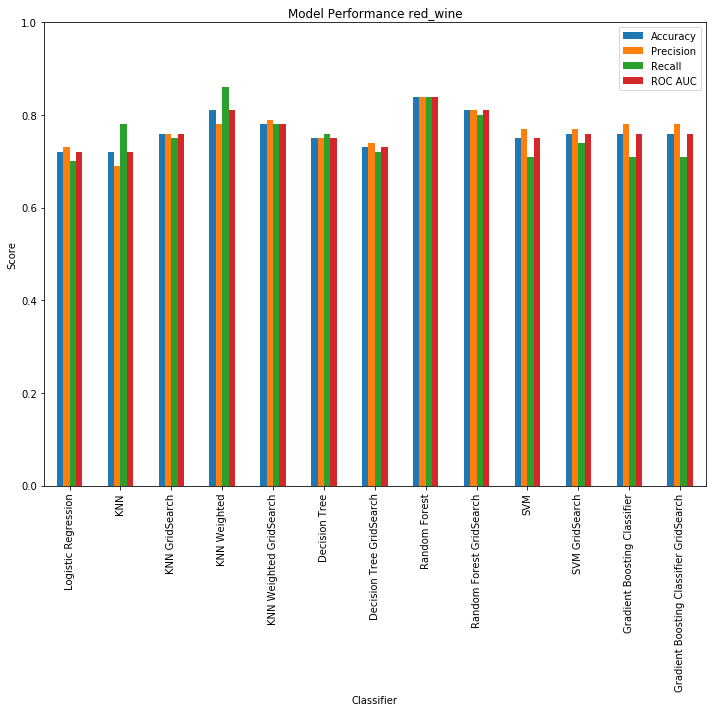

In [35]:
#red_wine model performance bar graph
figure=plt.figure(figsize=(10,10))
ax = figure.gca()

red_wine_performance[['Classifier', 'Accuracy', 'Precision', 'Recall', 'ROC AUC']].plot(kind='bar', x='Classifier', title='Model Performance red_wine', ylim=[0, 1.0], ax=ax)
plt.ylabel("Score")
plt.tight_layout()

### 2. Which machine learning model performs the best in a binary classification task to predict wine quality?

Looking at model performance for the red_wine dataset, the Random Forest Model has the highest accuracy, precision and ROC AUC (respectively: 0.84, 0.84, 0.84). The KNN Weighted Model has the highest recall (0.86). 

Accuracy is a measure of the number of correctly predicted data points out of all of the data points.

Precision is a measure of the number of how many predicted positives are actually positive (important if false positive cost is high).

Recall is a measure of the number of how many actual positives are classified (important if false negative cost is high). 

Looking at the test data confusion matrix of the Random Forest Classification Model:

(True Negatives = 134, False Negatives = 26, False Positives = 25, True Positives = 135)

In order to decrease the number of False Negatives and False Positives, more data can be added to the model for training. 

It is important to note that the added time for GridSearch with the Random Forest Model did not perform as well as the Random Forest Model without GridSearch.

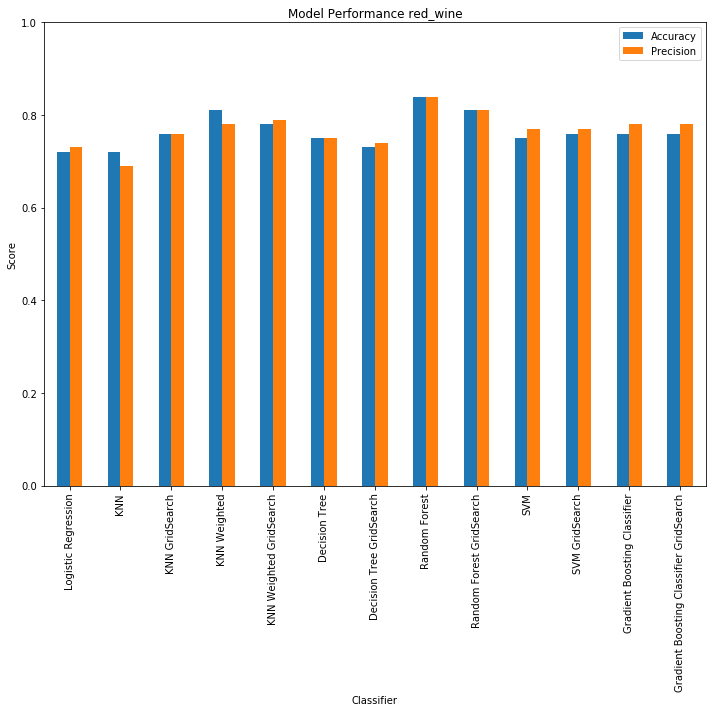

In [36]:
#red_wine model performance bar graph of accuracy and precision
figure=plt.figure(figsize=(10,10))
ax = figure.gca()

red_wine_performance[['Classifier', 'Accuracy', 'Precision']].plot(kind='bar', x='Classifier', title='Model Performance red_wine', ylim=[0, 1.0], ax=ax)
plt.ylabel("Score")
plt.tight_layout()

### white_wine

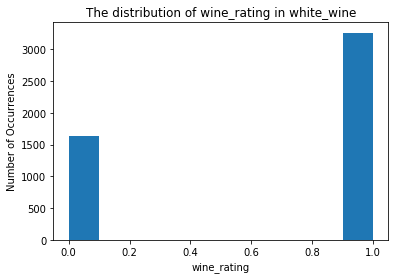

In [233]:
#Histogram of the target variable, "wine_rating"
plt.hist(white_wine.wine_rating)
plt.title("The distribution of wine_rating in white_wine")
plt.xlabel("wine_rating")
plt.ylabel("Number of Occurrences")
plt.show()

In [234]:
#Value counts for the target variable, "wine_rating"
white_wine.wine_rating.value_counts().sort_index()

0.0    1640
1.0    3258
Name: wine_rating, dtype: int64

In [235]:
#Descriptive statistics for the target variable, "wine_rating"
white_wine["wine_rating"].describe()

count    4898.000000
mean        0.665169
std         0.471979
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: wine_rating, dtype: float64

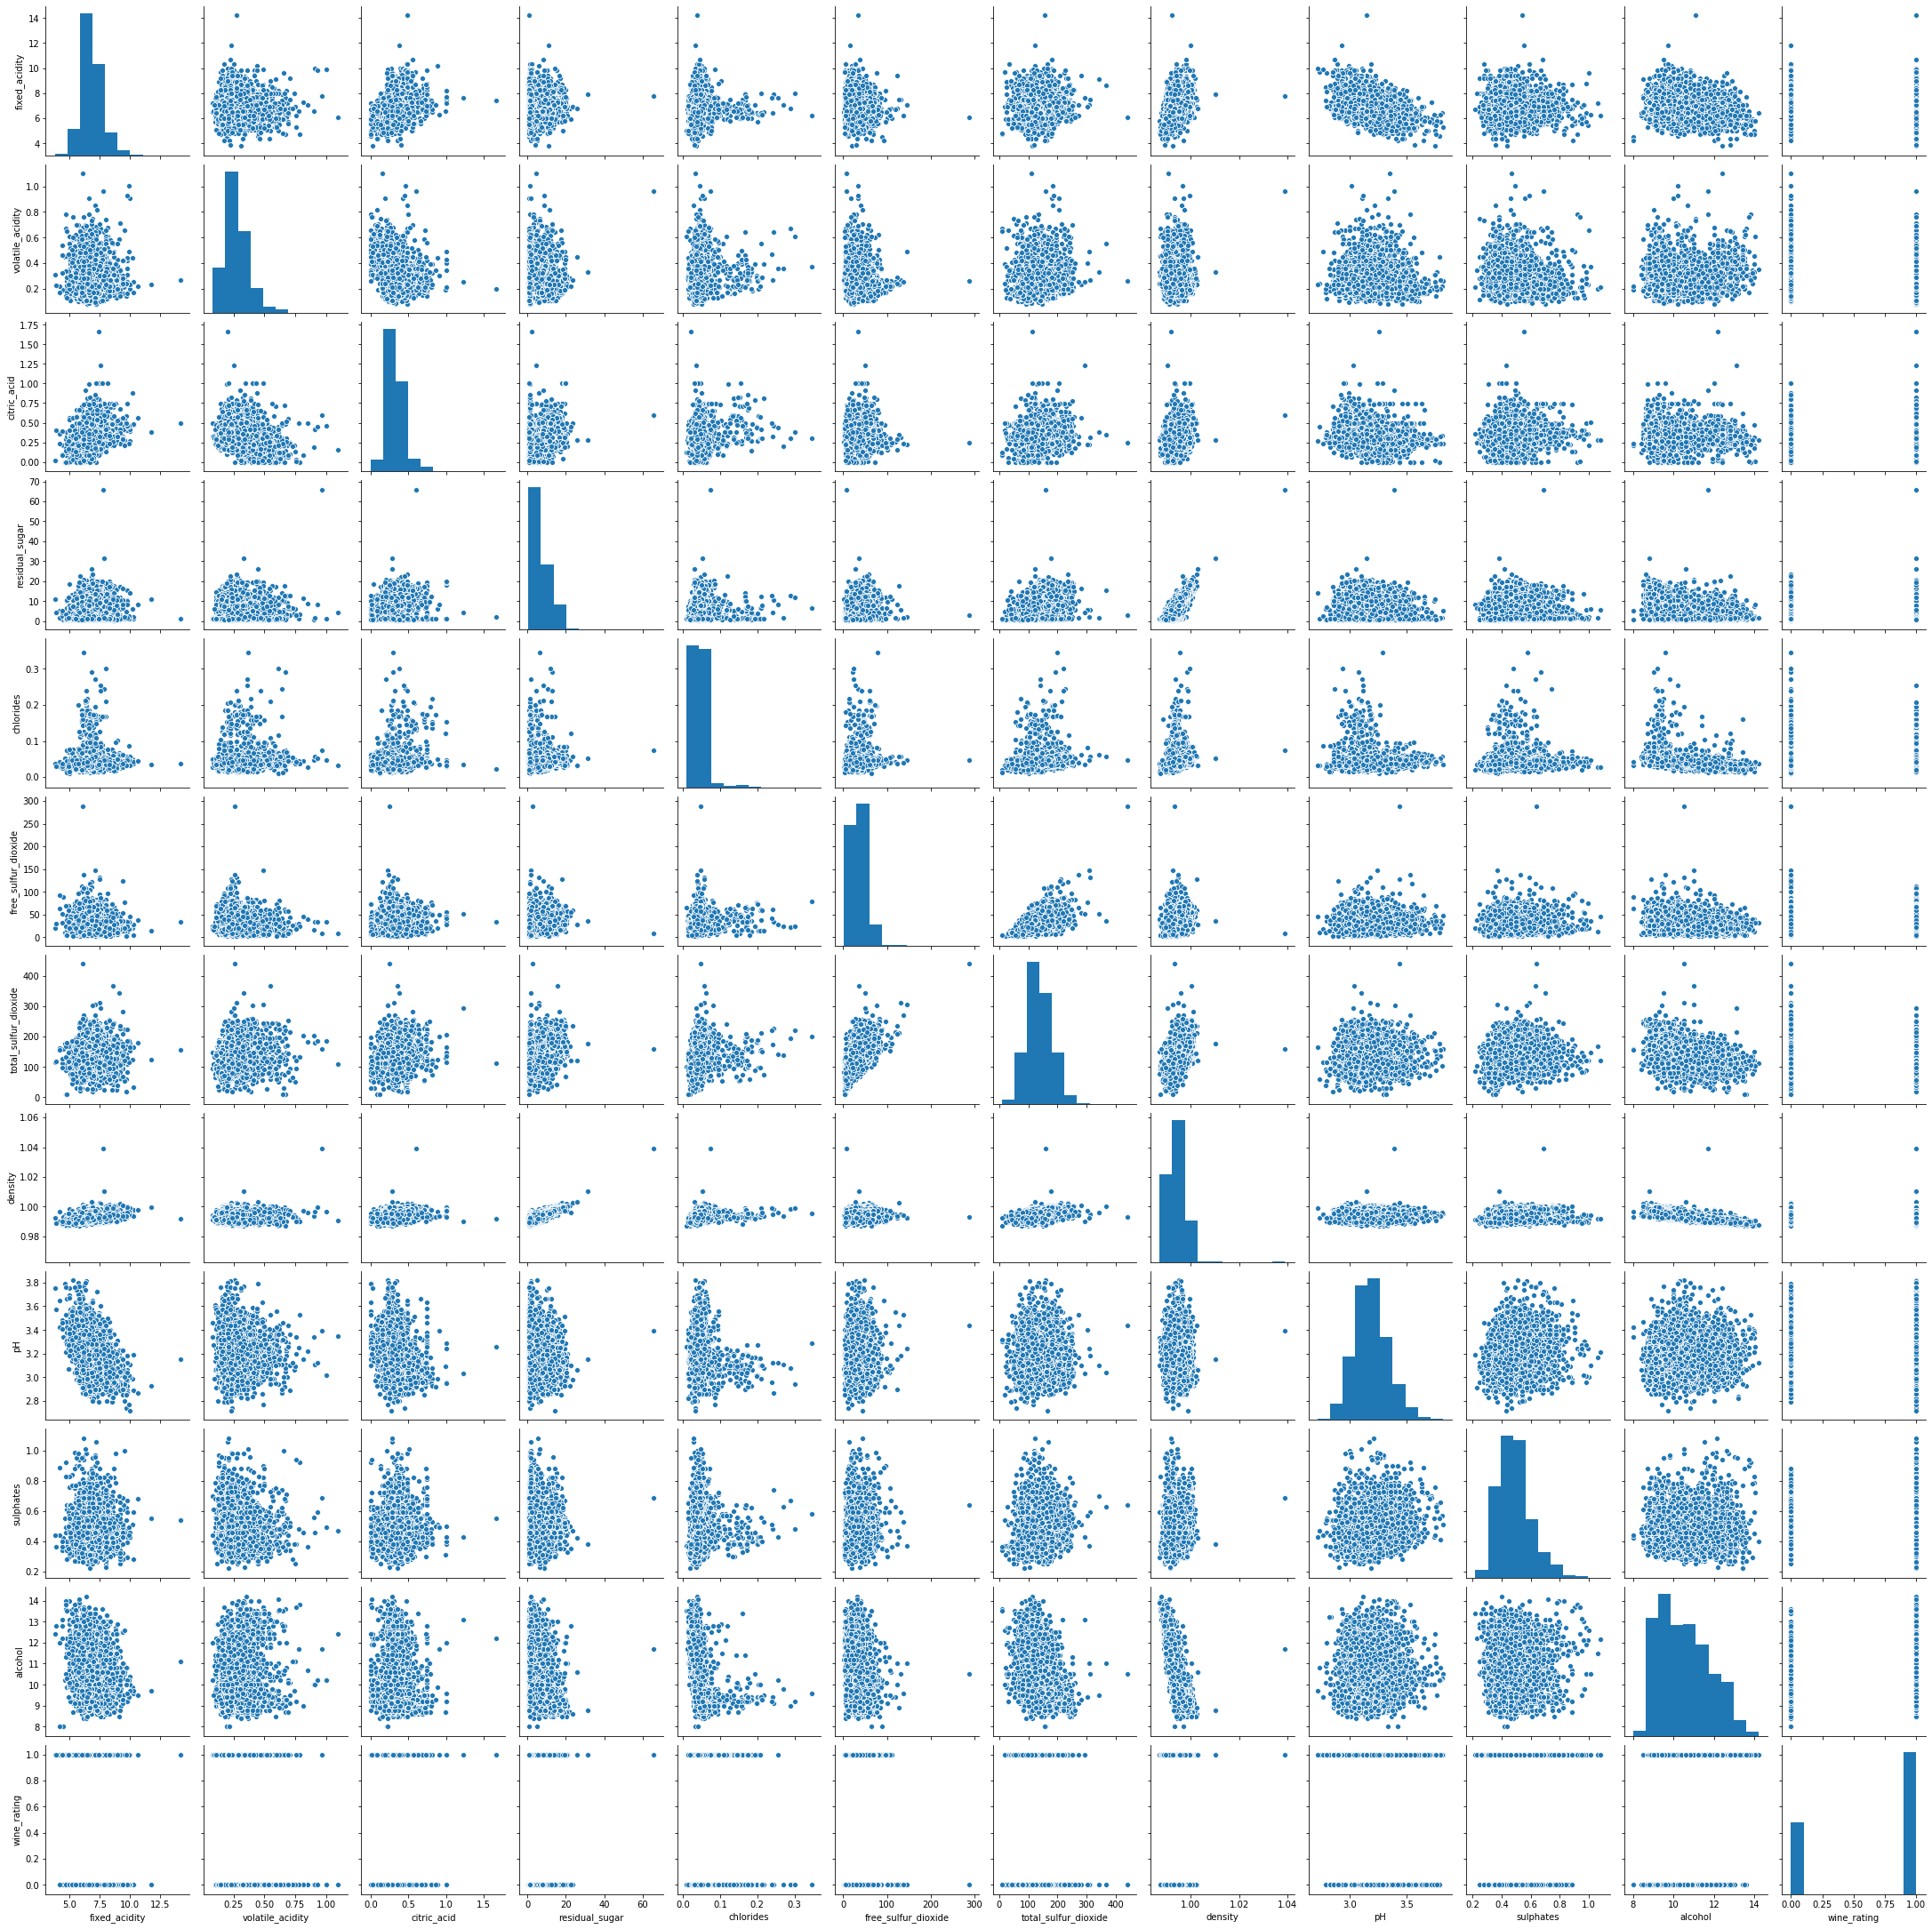

In [236]:
#Pairplot of the variables in white_wine
sns.pairplot(white_wine)

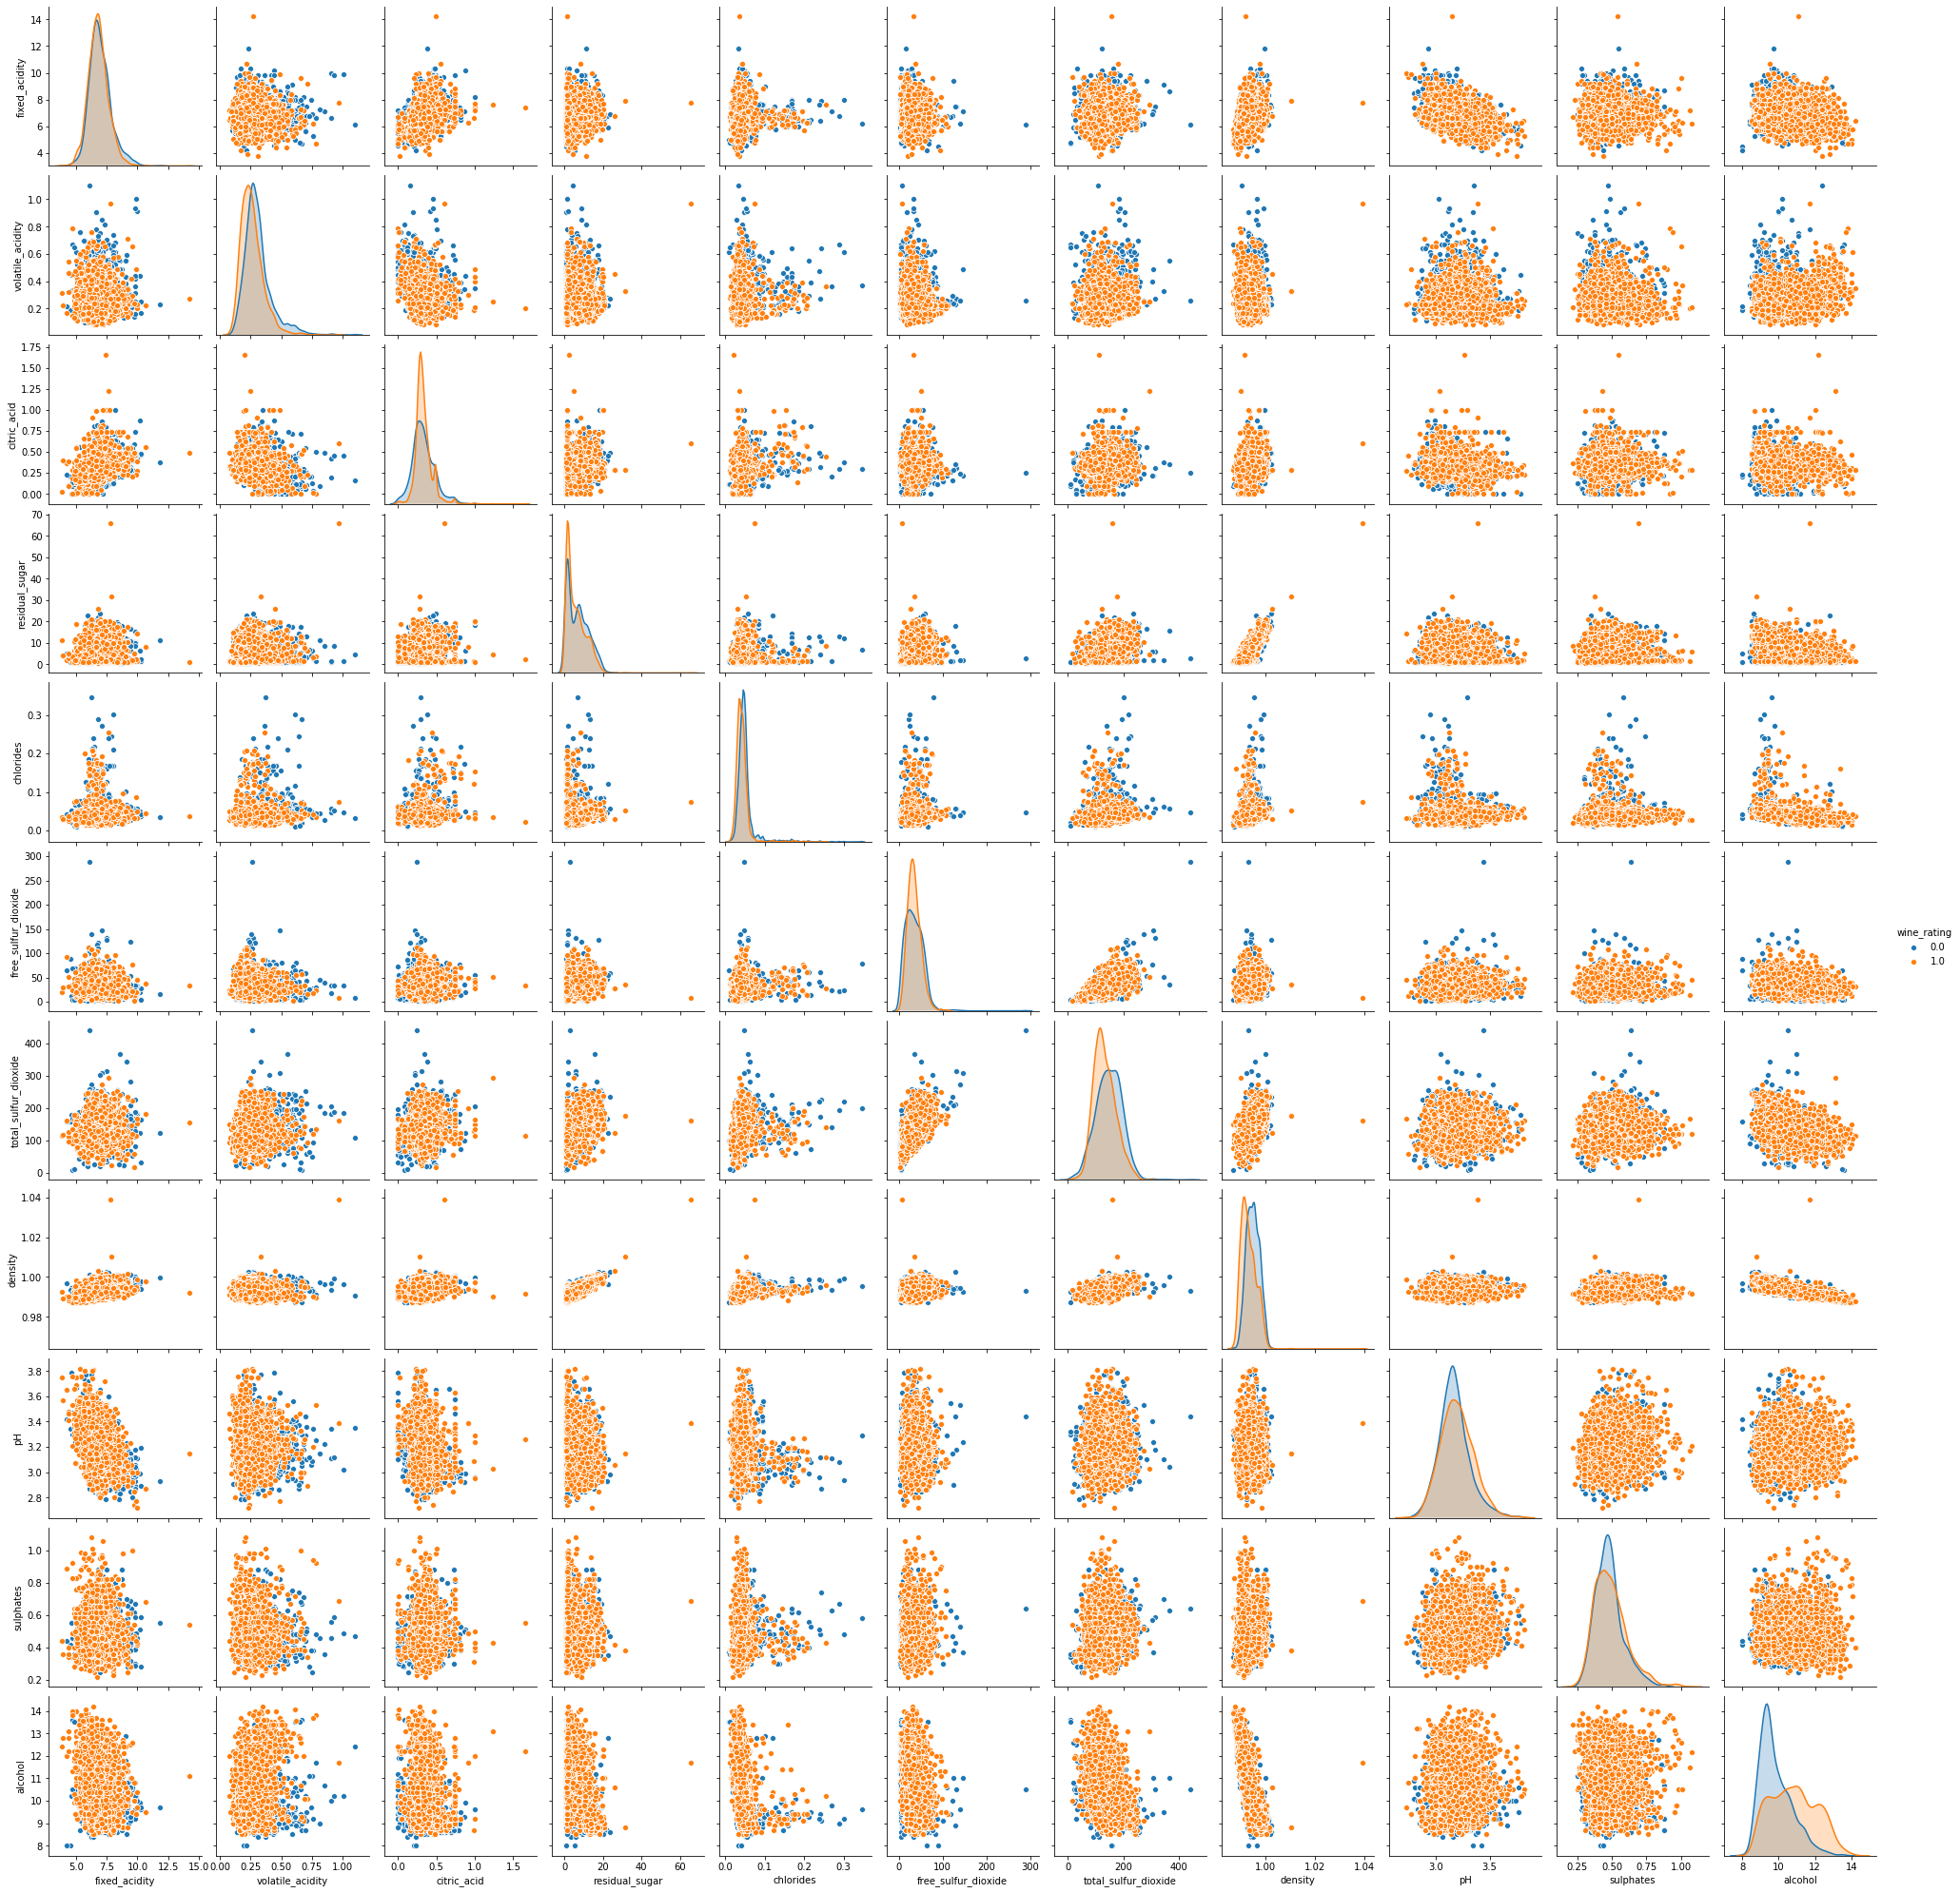

In [237]:
#Pairplot of the variables in white_wine separated by wine_rating
sns.pairplot(white_wine, hue="wine_rating")

In [240]:
#Correlations between variables in white_wine
white_wine.corr()

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.022697     0.289181   
volatile_acidity          -0.022697          1.000000    -0.149472   
citric_acid                0.289181         -0.149472     1.000000   
residual_sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free_sulfur_dioxide       -0.049396         -0.097012     0.094077   
total_sulfur_dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
wine_rating               -0.089749         -0.225440    -0.000700   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity               0.089021   0.023086            -0.049396   
volatile_acidity            0.064286   0.070512            -0.097012   
citric_acid                 0.094212   0.114364             0.094077   
residual_sugar              1.000000   0.088685             0.299098   
chlorides                   0.088685   1.000000             0.101392   
free_sulfur_dioxide         0.299098   0.101392             1.000000   
total_sulfur_dioxide        0.401439   0.198910             0.615501   
density                     0.838966   0.257211             0.294210   
pH                         -0.194133  -0.090439            -0.000618   
sulphates                  -0.026664   0.016763             0.059217   
alcohol                    -0.450631  -0.360189            -0.250104   
wine_rating                -0.092756  -0.183939            -0.001278   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                     0.091070  0.265331 -0.425858  -0.017143   
volatile_acidity                  0.089261  0.027114 -0.031915  -0.035728   
citric_acid                       0.121131  0.149503 -0.163748   0.062331   
residual_sugar                    0.401439  0.838966 -0.194133  -0.026664   
chlorides                         0.198910  0.257211 -0.090439   0.016763   
free_sulfur_dioxide               0.615501  0.294210 -0.000618   0.059217   
total_sulfur_dioxide              1.000000  0.529881  0.002321   0.134562   
density                           0.529881  1.000000 -0.093591   0.074493   
pH                                0.002321 -0.093591  1.000000   0.155951   
sulphates                         0.134562  0.074493  0.155951   1.000000   
alcohol                          -0.448892 -0.780138  0.121432  -0.017433   
wine_rating                      -0.170924 -0.268696  0.083687   0.051858   

                       alcohol  wine_rating  
fixed_acidity        -0.120881    -0.089749  
volatile_acidity      0.067718    -0.225440  
citric_acid          -0.075729    -0.000700  
residual_sugar       -0.450631    -0.092756  
chlorides            -0.360189    -0.183939  
free_sulfur_dioxide  -0.250104    -0.001278  
total_sulfur_dioxide -0.448892    -0.170924  
density              -0.780138    -0.268696  
pH                    0.121432     0.083687  
sulphates            -0.017433     0.051858  
alcohol               1.000000     0.383280  
wine_rating           0.383280     1.000000

In [241]:
#Correlations between variables and "wine_rating" in white_wine
white_wine.corr()['wine_rating']

fixed_acidity          -0.089749
volatile_acidity       -0.225440
citric_acid            -0.000700
residual_sugar         -0.092756
chlorides              -0.183939
free_sulfur_dioxide    -0.001278
total_sulfur_dioxide   -0.170924
density                -0.268696
pH                      0.083687
sulphates               0.051858
alcohol                 0.383280
wine_rating             1.000000
Name: wine_rating, dtype: float64

The variables with correlations to wine_rating greater than or equal to the absolute value of 0.10:

volatile_acidity (-0.225), chlorides (-0.183), total_sulfur_dioxide (-0.170), density (-0.268), alcohol (0.383)

### 1. What are the 6 features most correlated with wine quality?

In the white_wine dataset, the 6 features most correlated with wine quality are alcohol, density, volatile acidity, chlorides, total sulfur dioxide and residual sugar.

### Logistic Regression Model

In [242]:
start_time=time.time()
print("Logistic Regression Model")
print("")
#Logistic Regression Model
#Training Data
logisticrm = LogisticRegression()

print("~~~Training Data~~~")
print("")

#Fit model
logisticrm.fit(white_X_train, white_y_train)

#Logistic Regression Score
logisticrm_training_score = logisticrm.score(white_X_train, white_y_train)
print("Logistic Regression Model Training Score: {}".format(logisticrm_training_score))
print("")

#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(logisticrm, white_X_train, white_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(logisticrm, white_X_train, white_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(logisticrm, white_X_train, white_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")

#Predictions
white_X_train_predictions = logisticrm.predict(white_X_train)
#Classification Report
white_train_classification_report = classification_report(white_y_train, white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion Matrix
white_train_confusion_matrix = confusion_matrix(white_y_train, white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")

print("~~~Testing Data~~~")
print("")
#Testing Data
#Logistic Regression Score
logisticrm_testing_score = logisticrm.score(white_X_test, white_y_test)
print("Logistic Regression Model Testing Score: {}".format(logisticrm_testing_score))
print("")
#Test data
white_X_test_predictions = logisticrm.predict(white_X_test)

white_test_classification_report = classification_report(white_y_test, white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test, white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test,white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test,white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test,white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test,white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Logistic Regression Model

~~~Training Data~~~

Logistic Regression Model Training Score: 0.75472179683512

Accuracy
[0.75510204 0.76020408 0.75127551 0.74329502 0.75989783]
cv_scores_accuracy mean: 0.7539548961346991

Precision
[0.78141136 0.80109489 0.78685613 0.76910017 0.78156997]
cv_scores_precision mean: 0.7840065027542957

Recall
[0.87475915 0.84749035 0.85521236 0.87451737 0.88416988]
cv_scores_recall mean: 0.8672298227211522

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.54      0.60      1327
         1.0       0.78      0.87      0.82      2591

    accuracy                           0.75      3918
   macro avg       0.73      0.70      0.71      3918
weighted avg       0.75      0.75      0.75      3918


Confusion Matrix:
[[ 711  616]
 [ 345 2246]]


~~~Testing Data~~~

Logistic Regression Model Testing Score: 0.7612244897959184

Classification Report:
              precision    recall  f1-score   support

    

Logistic Regression Model Test Data 

Confusion Matrix:

True Negatives = 167

False Negatives = 88

False Positives = 146

True Positives = 579

Test Data: 

Accuracy Score: 0.7612244897959184

Precision Score: 0.7986206896551724

Recall Score: 0.8680659670164917

ROC AUC Score: 0.700806146447543

The model took 0.28512001037597656 to run.

*Running the Logistic Regression Model with only the features that have a correlation greater than or equal to the absolute value of 0.10 with "wine_rating" did not show an improvement in the performance of the model.

### K-Nearest Neighbors (KNN)

### K-Nearest Neighbors (KNN) Classification Model

In [243]:
start_time=time.time()
print("K-Nearest Neighbors (KNN) Classification Model")
print("")
#KNN Classification Model
#Training Data

knn_classification_model = neighbors.KNeighborsClassifier()

#Fit the model
knn_classification_model.fit(white_X_train, white_y_train)

print("~~~Training Data~~~")
print("")
#KNN Classification Score
knn_classification_model_training_score = knn_classification_model.score(white_X_train, white_y_train)
print("KNN Classification Model Training Score: {}".format(knn_classification_model_training_score))
print("")

#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(knn_classification_model, white_X_train, white_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(knn_classification_model, white_X_train, white_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(knn_classification_model, white_X_train, white_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
white_X_train_predictions = knn_classification_model.predict(white_X_train)

#Classification report
white_train_classification_report = classification_report(white_y_train, white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion matrix
white_train_confusion_matrix = confusion_matrix(white_y_train, white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Logistic Regression Score
knn_classification_model_testing_score = knn_classification_model.score(white_X_test, white_y_test)
print("KNN Classification Model Testing Score: {}".format(knn_classification_model_testing_score))
print("")
white_X_test_predictions = knn_classification_model.predict(white_X_test)
white_test_classification_report = classification_report(white_y_test, white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test, white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test,white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test,white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test,white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test,white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

K-Nearest Neighbors (KNN) Classification Model

~~~Training Data~~~

KNN Classification Model Training Score: 0.8425216947422154

Accuracy
[0.76147959 0.77040816 0.75765306 0.76245211 0.76245211]
cv_scores_accuracy mean: 0.7628890061771834

Precision
[0.81203008 0.81412639 0.80147059 0.79642857 0.80291971]
cv_scores_precision mean: 0.8053950673866153

Recall
[0.83236994 0.84555985 0.84169884 0.86100386 0.84942085]
cv_scores_recall mean: 0.8460106679759859

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.71      0.75      1327
         1.0       0.86      0.91      0.88      2591

    accuracy                           0.84      3918
   macro avg       0.83      0.81      0.82      3918
weighted avg       0.84      0.84      0.84      3918


Confusion Matrix:
[[ 943  384]
 [ 233 2358]]


~~~Testing Data~~~

KNN Classification Model Testing Score: 0.7510204081632653

Classification Report:
              precision    recall  f1-

K-Nearest Neighbors (KNN) Classification Model 

Test Data Confusion Matrix:

True Negatives = 183

False Negatives = 114

False Positives = 130

True Positives = 553

Test Data: 

Accuracy Score: 0.7510204081632653

Precision Score: 0.8096632503660323

Recall Score: 0.8290854572713643

ROC AUC Score: 0.7068749970062892

The model took 2.233107805252075 to run.

### K-Nearest Neighbors (KNN) Classification Model with Gridsearch

In [244]:
start_time=time.time()
#Grid search for k value
params_knn_classification_grid = {'n_neighbors': np.arange(1,101)}

knn_classification = neighbors.KNeighborsClassifier()

knn_classification_gridsearch = GridSearchCV(knn_classification, params_knn_classification_grid, cv=5)

#Fit the model to the training data
knn_classification_gridsearch.fit(white_X_train, white_y_train)

#Best k value, from the model
knn_classification_gridsearch_parameters = knn_classification_gridsearch.best_params_

print("Best parameter: {}".format(knn_classification_gridsearch_parameters))

Best parameter: {'n_neighbors': 1}


In [245]:
print("K-Nearest Neighbors (KNN) Classification Model with Gridsearch")
print("")
#KNN Classification Model
#Training Data

#Run the classification model (n_neighbors=1)
knn_classification_model = neighbors.KNeighborsClassifier (n_neighbors=1)

knn_classification_model.fit(white_X_train, white_y_train)

print("~~~Training Data~~~")
print("")
#Training Data
#KNN Classification Score
knn_classification_model_training_score = knn_classification_model.score(white_X_train, white_y_train)
print("KNN Classification Model with Gridsearch Training Score: {}".format(knn_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(knn_classification_model, white_X_train, white_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(knn_classification_model, white_X_train, white_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(knn_classification_model, white_X_train, white_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
white_X_train_predictions = knn_classification_model.predict(white_X_train)

#Classification Report
white_train_classification_report = classification_report(white_y_train, white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion Matrix
white_train_confusion_matrix = confusion_matrix(white_y_train, white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Logistic Regression Score
knn_classification_model_testing_score = knn_classification_model.score(white_X_test, white_y_test)
print("KNN Classification Model with Gridsearch Testing Score: {}".format(knn_classification_model_testing_score))
print("")
#Test data
white_X_test_predictions = knn_classification_model.predict(white_X_test)

white_test_classification_report = classification_report(white_y_test, white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test, white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy score: {}".format(accuracy_score(white_y_test,white_X_test_predictions)))
#Precision Score
print("Precision score: {}".format(precision_score(white_y_test,white_X_test_predictions)))
#Recall Score
print("Recall score: {}".format(recall_score(white_y_test,white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test,white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

K-Nearest Neighbors (KNN) Classification Model with Gridsearch

~~~Training Data~~~

KNN Classification Model with Gridsearch Training Score: 1.0

Accuracy
[0.78826531 0.79336735 0.81632653 0.79948914 0.79693487]
cv_scores_accuracy mean: 0.7988766387781167

Precision
[0.83364839 0.86178862 0.86666667 0.82998172 0.83551402]
cv_scores_precision mean: 0.8455198829806985

Recall
[0.84971098 0.81853282 0.85328185 0.87644788 0.86293436]
cv_scores_recall mean: 0.8521815787711742

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1327
         1.0       1.00      1.00      1.00      2591

    accuracy                           1.00      3918
   macro avg       1.00      1.00      1.00      3918
weighted avg       1.00      1.00      1.00      3918


Confusion Matrix:
[[1327    0]
 [   0 2591]]


~~~Testing Data~~~

KNN Classification Model with Gridsearch Testing Score: 0.7857142857142857

Classification Report:
     

K-Nearest Neighbors (KNN) Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 208

False Negatives = 105

False Positives = 105

True Positives = 562

Test Data: 

Accuracy score: 0.7857142857142857

Precision score: 0.8425787106446777

Recall score: 0.8425787106446777

ROC AUC Score: 0.7535577259293676

The model took 37.506770849227905 to run.

### K-Nearest Neighbors (KNN) Weighted Classification

In [246]:
start_time=time.time()
print("K-Nearest Neighbors (KNN) Weighted Classification Model")
print("")
#KNN Weighted Classification Model
knn_classification_weighted_model = neighbors.KNeighborsClassifier (weights='distance')
print("")
#Training Data
#Fit the model
knn_classification_weighted_model.fit(white_X_train, white_y_train)

print("~~~Training Data~~~")
print("")
#Training Data
#Weighted KNN Classification Score
knn_classification_weighted_model_training_score = knn_classification_weighted_model.score(white_X_train, white_y_train)
print("KNN Weighted Classification Model Training Score: {}".format(knn_classification_weighted_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(knn_classification_weighted_model, white_X_train, white_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(knn_classification_weighted_model, white_X_train, white_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(knn_classification_weighted_model, white_X_train, white_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
white_X_train_predictions = knn_classification_weighted_model.predict(white_X_train)

#Classification Report
white_train_classification_report = classification_report(white_y_train, white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion Matrix
white_train_confusion_matrix = confusion_matrix(white_y_train, white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Weighted KNN Classification Score
knn_classification_weighted_model_testing_score = knn_classification_weighted_model.score(white_X_test, white_y_test)
print("KNN Weighted Classification Model Testing Score: {}".format(knn_classification_weighted_model_testing_score))
print("")
#Predictions
white_X_test_predictions = knn_classification_weighted_model.predict(white_X_test)

white_test_classification_report = classification_report(white_y_test, white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test, white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test,white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test,white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test,white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test,white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

K-Nearest Neighbors (KNN) Weighted Classification Model


~~~Training Data~~~

KNN Weighted Classification Model Training Score: 1.0

Accuracy
[0.80994898 0.80994898 0.81505102 0.81226054 0.81992337]
cv_scores_accuracy mean: 0.8134265775275628

Precision
[0.84644195 0.84615385 0.85122411 0.83065954 0.84587156]
cv_scores_precision mean: 0.84407019907114

Recall
[0.87090559 0.87065637 0.87258687 0.8996139  0.88996139]
cv_scores_recall mean: 0.8807448240974253

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1327
         1.0       1.00      1.00      1.00      2591

    accuracy                           1.00      3918
   macro avg       1.00      1.00      1.00      3918
weighted avg       1.00      1.00      1.00      3918


Confusion Matrix:
[[1327    0]
 [   0 2591]]


~~~Testing Data~~~

KNN Weighted Classification Model Testing Score: 0.8020408163265306

Classification Report:
              precision    

K-Nearest Neighbors (KNN) Weighted Classification Model 

Test Data Confusion Matrix:

True Negatives = 203

False Negatives = 84

False Positives = 110

True Positives = 583

Test Data: 

Accuracy Score: 0.8020408163265306

Precision Score: 0.8412698412698413

Recall Score: 0.8740629685157422

ROC AUC Score: 0.7613126344176155

The model took 1.167762041091919 to run.

### K-Nearest Neighbors (KNN) Weighted Classification Model with Gridsearch

In [247]:
start_time=time.time()
#KNN Classification with Distance Weights
#Grid search for k value
params_knn_classification_weighted_grid = {'n_neighbors': np.arange(1,101)}

knn_classification_weighted = neighbors.KNeighborsClassifier(weights='distance')

knn_classification_weighted_gridsearch = GridSearchCV(knn_classification_weighted, params_knn_classification_weighted_grid, cv=5)

#Fit the model to the training data
knn_classification_weighted_gridsearch.fit(white_X_train, white_y_train)

#Best k value, from the model
knn_classification_weighted_gridsearch_parameters = knn_classification_weighted_gridsearch.best_params_

print("Best parameter: {}".format(knn_classification_weighted_gridsearch_parameters))

Best parameter: {'n_neighbors': 30}


In [248]:
print("K-Nearest Neighbors (KNN) Weighted Classification Model with Gridsearch")
print("")
#Run a weighted classification model (n_neighbors=30)
knn_classification_weighted_model = neighbors.KNeighborsClassifier (n_neighbors=30, weights='distance')

#Training Data
knn_classification_weighted_model.fit(white_X_train, white_y_train)

print("~~~Training Data~~~")
print("")
#KNN Weighted Classification Score
knn_classification_weighted_model_training_score = knn_classification_weighted_model.score(white_X_train, white_y_train)
print("KNN Weighted Classification Model with Gridsearch Training Score: {}".format(knn_classification_weighted_model_training_score))
print("")

#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(knn_classification_weighted_model, white_X_train, white_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(knn_classification_weighted_model, white_X_train, white_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(knn_classification_weighted_model, white_X_train, white_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
white_X_train_predictions = knn_classification_weighted_model.predict(white_X_train)

#Classification Report
white_train_classification_report = classification_report(white_y_train, white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion Matrix
white_train_confusion_matrix = confusion_matrix(white_y_train, white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#KNN Weighted Classification Score
knn_classification_weighted_model_testing_score = knn_classification_weighted_model.score(white_X_test, white_y_test)
print("KNN Weighted Classification Model with Gridsearch Testing Score: {}".format(knn_classification_weighted_model_testing_score))
print("")
#Predictions
white_X_test_predictions = knn_classification_weighted_model.predict(white_X_test)

white_test_classification_report = classification_report(white_y_test, white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test, white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test,white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test,white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test,white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test,white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

K-Nearest Neighbors (KNN) Weighted Classification Model with Gridsearch

~~~Training Data~~~

KNN Weighted Classification Model with Gridsearch Training Score: 1.0

Accuracy
[0.83418367 0.83418367 0.84438776 0.81353768 0.81992337]
cv_scores_accuracy mean: 0.8292432298589933

Precision
[0.84670232 0.84767025 0.85357143 0.81958763 0.83128295]
cv_scores_precision mean: 0.8397629156344697

Recall
[0.91522158 0.91312741 0.92277992 0.92084942 0.91312741]
cv_scores_recall mean: 0.917021149969127

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1327
         1.0       1.00      1.00      1.00      2591

    accuracy                           1.00      3918
   macro avg       1.00      1.00      1.00      3918
weighted avg       1.00      1.00      1.00      3918


Confusion Matrix:
[[1327    0]
 [   0 2591]]


~~~Testing Data~~~

KNN Weighted Classification Model with Gridsearch Testing Score: 0.8275510204081633

Cl

K-Nearest Neighbors (KNN) Weighted Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 203

False Negatives = 59

False Positives = 110

True Positives = 608

Test Data: 

Accuracy Score: 0.8275510204081633

Precision Score: 0.8467966573816156

Recall Score: 0.9115442278860569

ROC AUC Score: 0.7800532641027729

The model took 29.33603286743164 to run.

### Decision Tree

### Decision Tree Classification

In [249]:
start_time=time.time()
print("Decision Tree Classification Model")
print("")
#Decision Tree Classification Model
#Training Data
decision_tree_classification_model = tree.DecisionTreeClassifier()

#Fit the Model
decision_tree_classification_model.fit(white_X_train, white_y_train)

print("~~~Training Data~~~")
print("")
#Training Data
#Decision Tree Classification Score
decision_tree_classification_model_training_score = decision_tree_classification_model.score(white_X_train, white_y_train)
print("Decision Tree Classification Model Training Score: {}".format(decision_tree_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(decision_tree_classification_model, white_X_train, white_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(decision_tree_classification_model, white_X_train, white_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(decision_tree_classification_model, white_X_train, white_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
white_X_train_predictions = decision_tree_classification_model.predict(white_X_train)

#Classification Report
white_train_classification_report = classification_report(white_y_train, white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion Matrix
white_train_confusion_matrix = confusion_matrix(white_y_train, white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Decision Tree Score
decision_tree_classification_model_testing_score = decision_tree_classification_model.score(white_X_test, white_y_test)
print("Decision Tree Classification Model Testing Score: {}".format(decision_tree_classification_model_testing_score))
print("")
#Predictions
white_X_test_predictions = decision_tree_classification_model.predict(white_X_test)

white_test_classification_report = classification_report(white_y_test, white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test, white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test,white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test,white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test,white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test,white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Decision Tree Classification Model

~~~Training Data~~~

Decision Tree Classification Model Training Score: 1.0

Accuracy
[0.78443878 0.7627551  0.77806122 0.74457216 0.78544061]
cv_scores_accuracy mean: 0.7710535746865796

Precision
[0.84493042 0.83003953 0.82806324 0.80871212 0.83054004]
cv_scores_precision mean: 0.8284570685499035

Recall
[0.80924855 0.82239382 0.81081081 0.82432432 0.85135135]
cv_scores_recall mean: 0.8236257727587208

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1327
         1.0       1.00      1.00      1.00      2591

    accuracy                           1.00      3918
   macro avg       1.00      1.00      1.00      3918
weighted avg       1.00      1.00      1.00      3918


Confusion Matrix:
[[1327    0]
 [   0 2591]]


~~~Testing Data~~~

Decision Tree Classification Model Testing Score: 0.7765306122448979

Classification Report:
              precision    recall  f1-score  

Decision Tree Classification Model 

Test Data Confusion Matrix:

True Negatives = 217

False Negatives = 123

False Positives = 96

True Positives = 544

Test Data: 

Accuracy Score: 0.7765306122448979

Precision Score: 0.85

Recall Score: 0.815592203898051

ROC AUC Score: 0.7544414693611661

The model took 0.43699193000793457 to run.

### Decision Tree Classification with Gridsearch

In [250]:
start_time=time.time()
#Decision Tree Classification
#Grid search for max_depth, min_samples_split and max_features
params_decision_tree_classification_grid = {'max_depth': np.arange(1,21), 'min_samples_split': np.arange(1,21), 'max_features': np.arange(1,21)}

decision_tree_classification = tree.DecisionTreeClassifier()

decision_tree_classification_gridsearch = GridSearchCV(decision_tree_classification, params_decision_tree_classification_grid, cv=5)

#Fit the model to the training data
decision_tree_classification_gridsearch.fit(white_X_train, white_y_train)

#Best values, from the model
decision_tree_gridsearch_parameters = decision_tree_classification_gridsearch.best_params_

print("Best parameters: {}".format(decision_tree_gridsearch_parameters))

Best parameters: {'max_depth': 20, 'max_features': 3, 'min_samples_split': 2}


In [251]:
print("Decision Tree Classification Model with Gridsearch")
print("")
#Run the decision tree classification model (max_depth=20, max_features=3, min_samples_split=2)
decision_tree_classification_model = tree.DecisionTreeClassifier(max_depth=20, max_features=3, min_samples_split=2)
#Training Data
#Fit to the model
decision_tree_classification_model.fit(white_X_train, white_y_train)


print("~~~Training Data~~~")
print("")
#Training Data
#Decision Tree Classification Score
decision_tree_classification_model_training_score = decision_tree_classification_model.score(white_X_train, white_y_train)
print("Decision Tree Classification Model with Gridsearch Training Score: {}".format(decision_tree_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(decision_tree_classification_model, white_X_train, white_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(decision_tree_classification_model, white_X_train, white_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(decision_tree_classification_model, white_X_train, white_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
white_X_train_predictions = decision_tree_classification_model.predict(white_X_train)

#Classification Report
white_train_classification_report = classification_report(white_y_train, white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion Matrix
white_train_confusion_matrix = confusion_matrix(white_y_train, white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Decision Tree Classification Score
decision_tree_classification_model_testing_score = decision_tree_classification_model.score(white_X_test, white_y_test)
print("Decision Tree Classification Model with Gridsearch Testing Score: {}".format(decision_tree_classification_model_testing_score))
print("")
#Test data
white_X_test_predictions = decision_tree_classification_model.predict(white_X_test)

white_test_classification_report = classification_report(white_y_test, white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test, white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test,white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test,white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test,white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test,white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Decision Tree Classification Model with Gridsearch

~~~Training Data~~~

Decision Tree Classification Model with Gridsearch Training Score: 0.996937212863706

Accuracy
[0.77678571 0.77040816 0.76785714 0.76372925 0.7816092 ]
cv_scores_accuracy mean: 0.7720778924596658

Precision
[0.82191781 0.81852552 0.83669355 0.80580762 0.83111954]
cv_scores_precision mean: 0.8228128087103228

Recall
[0.84007707 0.81660232 0.8030888  0.84362934 0.82432432]
cv_scores_recall mean: 0.8255443717871463

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1327
         1.0       1.00      1.00      1.00      2591

    accuracy                           1.00      3918
   macro avg       1.00      1.00      1.00      3918
weighted avg       1.00      1.00      1.00      3918


Confusion Matrix:
[[1322    5]
 [   7 2584]]


~~~Testing Data~~~

Decision Tree Classification Model with Gridsearch Testing Score: 0.7653061224489796

Classi

Decision Tree Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 203

False Negatives = 120

False Positives = 110

True Positives = 547

Test Data: 

Accuracy Score: 0.7653061224489796

Precision Score: 0.832572298325723

Recall Score: 0.8200899550224887

ROC AUC Score: 0.7343261276709887

The model took 200.01242303848267 to run.

### Random Forest

### Random Forest Classification Model

In [321]:
start_time=time.time()
print("Random Forest Classification Model")
print("")
#Run the Random Forest Classification Model
random_forest_classification_model = RandomForestClassifier()

#Training Data
random_forest_classification_model.fit(white_X_train, white_y_train)

print("~~~Training Data~~~")
print("")
#Training Data
#Random Forest Classification Score
random_forest_classification_model_training_score = random_forest_classification_model.score(white_X_train, white_y_train)
print("Random Forest Classification Model Training Score: {}".format(random_forest_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(random_forest_classification_model, white_X_train, white_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(random_forest_classification_model, white_X_train, white_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(random_forest_classification_model, white_X_train, white_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions
white_X_train_predictions = random_forest_classification_model.predict(white_X_train)

#Classification Report
white_train_classification_report = classification_report(white_y_train, white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion Matrix
white_train_confusion_matrix = confusion_matrix(white_y_train, white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Random Forest Classification Score
random_forest_classification_model_testing_score = random_forest_classification_model.score(white_X_test, white_y_test)
print("Random Forest Classification Model Testing Score: {}".format(random_forest_classification_model_testing_score))
print("")
#Test data
white_X_test_predictions = random_forest_classification_model.predict(white_X_test)

white_test_classification_report = classification_report(white_y_test, white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test, white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test,white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test,white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test,white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test,white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Random Forest Classification Model

~~~Training Data~~~

Random Forest Classification Model Training Score: 1.0

Accuracy
[0.83545918 0.84693878 0.84693878 0.81992337 0.83141762]
cv_scores_accuracy mean: 0.8361355461724921

Precision
[0.85925926 0.88045541 0.87476281 0.83096085 0.84837545]
cv_scores_precision mean: 0.8587627561868219

Recall
[0.89402697 0.89189189 0.9015444  0.9034749  0.91312741]
cv_scores_recall mean: 0.9008131169980882

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1327
         1.0       1.00      1.00      1.00      2591

    accuracy                           1.00      3918
   macro avg       1.00      1.00      1.00      3918
weighted avg       1.00      1.00      1.00      3918


Confusion Matrix:
[[1327    0]
 [   0 2591]]


~~~Testing Data~~~

Random Forest Classification Model Testing Score: 0.8285714285714286

Classification Report:
              precision    recall  f1-score  

Random Forest Classification Model 

Test Data Confusion Matrix:

True Negatives = 217

False Negatives = 72

False Positives = 96

True Positives = 595

Test Data: 

Accuracy Score: 0.8285714285714286

Precision Score: 0.8610709117221418

Recall Score: 0.8920539730134932

ROC AUC Score: 0.7926723539188871

The model took 8.329782962799072 to run.

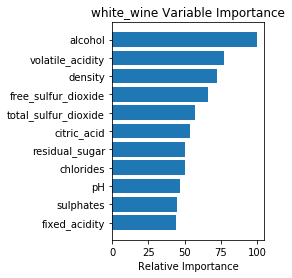

In [323]:
#Feature importance of the Random Forest Classification Model
feature_importance = random_forest_classification_model.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, white_wine.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('white_wine Variable Importance')
plt.show()
#alcohol, volatile_acidity and density are the three most important variables in determining wine quality.

### 3. What are the 5 most important features in this model?

In the white_wine Random Forest Model, the 5 most important features are alcohol, volatile acidity, density, free sulfur dioxide and total sulfur dioxide.

### Random Forest Classification Model with Gridsearch

In [253]:
start_time=time.time()
#Random Forest Classification
#Grid search for max_depth, min_samples_split and max_features
params_random_forest_classification_grid = {'max_depth': np.arange(1,11), 'min_samples_split': np.arange(1,11), 'max_features': np.arange(1,11)}

random_forest_classification = RandomForestClassifier()

random_forest_classification_gridsearch = GridSearchCV(random_forest_classification, params_random_forest_classification_grid, cv=5)

#Fit the model to the training data
random_forest_classification_gridsearch.fit(white_X_train, white_y_train)

#Best values, from the model
random_forest_gridsearch_parameters = random_forest_classification_gridsearch.best_params_
print("Best parameters: {}".format(random_forest_gridsearch_parameters))

Best parameters: {'max_depth': 10, 'max_features': 9, 'min_samples_split': 4}


In [254]:
print("Random Forest Classification Model with Gridsearch")
print("")
#Training Data
#Run the random forest classification model (max_depth=10, max_features=9, min_samples_split=4)
random_forest_classification_model = RandomForestClassifier(max_depth=10, max_features=9, min_samples_split=4)

random_forest_classification_model.fit(white_X_train, white_y_train)


print("~~~Training Data~~~")
print("")
#Training Data
#KNN Classification Score
random_forest_classification_model_training_score = random_forest_classification_model.score(white_X_train, white_y_train)
print("Random Forest Classification Model with Gridsearch Training Score: {}".format(random_forest_classification_model_training_score))
print("")
#Cross Validation Scores

#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(random_forest_classification_model, white_X_train, white_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(random_forest_classification_model, white_X_train, white_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(random_forest_classification_model, white_X_train, white_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions on training data
white_X_train_predictions = random_forest_classification_model.predict(white_X_train)

#Classification report on training data
white_train_classification_report = classification_report(white_y_train, white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion matrix on training data
white_train_confusion_matrix = confusion_matrix(white_y_train, white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Random Forest Classification Model Score
random_forest_classification_model_testing_score = random_forest_classification_model.score(white_X_test, white_y_test)
print("Random Forest Classification Model with Gridsearch Testing Score: {}".format(random_forest_classification_model_testing_score))
print("")
#Test data
white_X_test_predictions = random_forest_classification_model.predict(white_X_test)

white_test_classification_report = classification_report(white_y_test, white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test, white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test,white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test,white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test,white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test,white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Random Forest Classification Model with Gridsearch

~~~Training Data~~~

Random Forest Classification Model with Gridsearch Training Score: 0.9512506380806534

Accuracy
[0.82142857 0.84311224 0.82015306 0.79948914 0.8045977 ]
cv_scores_accuracy mean: 0.8177561446034352

Precision
[0.84162063 0.8759542  0.85055351 0.82092199 0.83065954]
cv_scores_precision mean: 0.8439419705033686

Recall
[0.88246628 0.88803089 0.89382239 0.88610039 0.88996139]
cv_scores_recall mean: 0.8880762678450541

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93      1327
         1.0       0.95      0.98      0.96      2591

    accuracy                           0.95      3918
   macro avg       0.95      0.94      0.94      3918
weighted avg       0.95      0.95      0.95      3918


Confusion Matrix:
[[1197  130]
 [  61 2530]]


~~~Testing Data~~~

Random Forest Classification Model with Gridsearch Testing Score: 0.8061224489795918

Class

Random Forest Classification Model with Gridsearch 

Test Data Confusion Matrix:

True Negatives = 207

False Negatives = 84

False Positives = 106

True Positives = 583

Test Data: 

Accuracy Score: 0.8061224489795918

Precision Score: 0.8461538461538461

Recall Score: 0.8740629685157422

ROC AUC Score: 0.767702410775443

The model took 1784.935247182846 to run.

### Support Vector Machine (SVM)

### Support Vector Machine Classification Model

In [255]:
start_time=time.time()
print("Support Vector Machine Classification Model")
print("")
#Training Data
#Run the Support Vector Machine Classification Model
support_vector_classification_model = SVC()

support_vector_classification_model.fit(white_X_train, white_y_train)

print("~~~Training Data~~~")
print("")
#Training Data
#Support Vector Machine Classification Score
support_vector_classification_model_training_score = support_vector_classification_model.score(white_X_train, white_y_train)
print("Support Vector Machine Classification Model Training Score: {}".format(support_vector_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(support_vector_classification_model, white_X_train, white_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(support_vector_classification_model, white_X_train, white_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(support_vector_classification_model, white_X_train, white_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions on training data
white_X_train_predictions = support_vector_classification_model.predict(white_X_train)

#Classification report on training data
white_train_classification_report = classification_report(white_y_train, white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion matrix on training data
white_train_confusion_matrix = confusion_matrix(white_y_train, white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Support Vector Machine Score
support_vector_classification_model_testing_score = support_vector_classification_model.score(white_X_test, white_y_test)
print("Support Vector Machine Classification Model Testing Score: {}".format(support_vector_classification_model_testing_score))
print("")
#Test data
white_X_test_predictions = support_vector_classification_model.predict(white_X_test)

white_test_classification_report = classification_report(white_y_test, white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test, white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test,white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test,white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test,white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test,white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Support Vector Machine Classification Model

~~~Training Data~~~

Support Vector Machine Classification Model Training Score: 0.8192955589586524

Accuracy
[0.79846939 0.80739796 0.79209184 0.77777778 0.77905492]
cv_scores_accuracy mean: 0.7909583756874398

Precision
[0.82640145 0.83669725 0.81527531 0.80388693 0.8119349 ]
cv_scores_precision mean: 0.818839166306679

Recall
[0.8805395  0.88030888 0.88610039 0.87837838 0.86679537]
cv_scores_recall mean: 0.8784245021239242

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.67      0.72      1327
         1.0       0.84      0.90      0.87      2591

    accuracy                           0.82      3918
   macro avg       0.80      0.78      0.79      3918
weighted avg       0.82      0.82      0.82      3918


Confusion Matrix:
[[ 889  438]
 [ 270 2321]]


~~~Testing Data~~~

Support Vector Machine Classification Model Testing Score: 0.7826530612244897

Classification Report:
    

Support Vector Machine Classification Model 

Test Data Confusion Matrix:

True Negatives = 194

False Negatives = 94

False Positives = 119

True Positives = 573

Test Data: 

Accuracy Score: 0.7826530612244897

Precision Score: 0.8280346820809249

Recall Score: 0.8590704647676162

ROC AUC Score: 0.7394393857384407

The model took 4.549343109130859 to run.

### Support Vector Machine Classification Model with Gridsearch

In [256]:
start_time=time.time()
#Support Vector Machine Classification
#Grid search for C, gamma
params_support_vector_classification_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

support_vector_classification = SVC()

support_vector_classification_gridsearch = GridSearchCV(support_vector_classification, params_support_vector_classification_grid, cv=5)

#Fit the model to the training data
support_vector_classification_gridsearch.fit(white_X_train, white_y_train)

#Best values, from the model
support_vector_gridsearch_parameters = support_vector_classification_gridsearch.best_params_
print("Best parameters: {}".format(support_vector_gridsearch_parameters))

Best parameters: {'C': 100, 'gamma': 1}


In [257]:
#Training Data
print("Support Vector Machine Classification Model with Gridsearch")
#Run the Support Vector Machine Classification Model

#Run the support vector machine classification model (C=100, gamma=1)
support_vector_classification_model = SVC(C=100, gamma=1)

support_vector_classification_model.fit(white_X_train, white_y_train)

print("~~~Training Data~~~")
print("")
#Training Data
#Support Vector Machine Classification Score
support_vector_classification_model_training_score = support_vector_classification_model.score(white_X_train, white_y_train)
print("Support Vector Machine Classification Model with Gridsearch Training Score: {}".format(support_vector_classification_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(support_vector_classification_model, white_X_train, white_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(support_vector_classification_model, white_X_train, white_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(support_vector_classification_model, white_X_train, white_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions on training data
white_X_train_predictions = support_vector_classification_model.predict(white_X_train)

#Classification report on training data
white_train_classification_report = classification_report(white_y_train, white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion matrix on training data
white_train_confusion_matrix = confusion_matrix(white_y_train, white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Support Vector Machine Score
support_vector_classification_model_testing_score = support_vector_classification_model.score(white_X_test, white_y_test)
print("Support Vector Machine Classification Model with Gridsearch Testing Score: {}".format(support_vector_classification_model_testing_score))
print("")
#Test data
white_X_test_predictions = support_vector_classification_model.predict(white_X_test)

white_test_classification_report = classification_report(white_y_test, white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test, white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test,white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test,white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test,white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test,white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

Support Vector Machine Classification Model with Gridsearch
~~~Training Data~~~

Support Vector Machine Classification Model with Gridsearch Training Score: 1.0

Accuracy
[0.79846939 0.80229592 0.79846939 0.78416347 0.80204342]
cv_scores_accuracy mean: 0.797088318085855

Precision
[0.80438449 0.8040201  0.80821918 0.7792     0.80099502]
cv_scores_precision mean: 0.7993637578252861

Recall
[0.91907514 0.92664093 0.91119691 0.94015444 0.93243243]
cv_scores_recall mean: 0.9258999709866762

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1327
         1.0       1.00      1.00      1.00      2591

    accuracy                           1.00      3918
   macro avg       1.00      1.00      1.00      3918
weighted avg       1.00      1.00      1.00      3918


Confusion Matrix:
[[1327    0]
 [   0 2591]]


~~~Testing Data~~~

Support Vector Machine Classification Model with Gridsearch Testing Score: 0.8020408163265

Support Vector Machine with Gridsearch Classification Model 

Test Data Confusion Matrix:

True Negatives = 170

False Negatives = 51

False Positives = 143

True Positives = 616

Test Data: 

Accuracy Score: 0.8020408163265306

Precision Score: 0.8115942028985508

Recall Score: 0.9235382308845578

ROC AUC Score: 0.7333346106499466

The model took 69.92830896377563 to run.

### Ensemble Gradient Boosting Classifier Model

### Gradient Boosting Classifier Model

In [37]:
start_time=time.time()
print("ensemble Gradient Boosting Classifier Model")
print("")
#Training Data
#Run the Gradient Boosting Classifier Model
gradient_boosting_classifier_model = GradientBoostingClassifier()

gradient_boosting_classifier_model.fit(white_X_train, white_y_train)

print("~~~Training Data~~~")
print("")
#Training Data
#Gradient Boosting Classifier Model Score
gradient_boosting_classifier_model_training_score = gradient_boosting_classifier_model.score(white_X_train, white_y_train)
print("ensemble Gradient Boosting Classifier Model Training Score: {}".format(gradient_boosting_classifier_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(gradient_boosting_classifier_model, white_X_train, white_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(gradient_boosting_classifier_model, white_X_train, white_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(gradient_boosting_classifier_model, white_X_train, white_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions on training data
white_X_train_predictions = gradient_boosting_classifier_model.predict(white_X_train)

#Classification report on training data
white_train_classification_report = classification_report(white_y_train, white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion matrix on training data
white_train_confusion_matrix = confusion_matrix(white_y_train, white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Gradient Boosting Classifier Model Score
gradient_boosting_classifier_model_testing_score = gradient_boosting_classifier_model.score(white_X_test, white_y_test)
print("ensemble Gradient Boosting Classifier Model Testing Score: {}".format(gradient_boosting_classifier_model_testing_score))
print("")
#Test data
white_X_test_predictions = gradient_boosting_classifier_model.predict(white_X_test)

white_test_classification_report = classification_report(white_y_test, white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test, white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test,white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test,white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test,white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test,white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

ensemble Gradient Boosting Classifier Model

~~~Training Data~~~

ensemble Gradient Boosting Classifier Model Training Score: 0.8333333333333334

Accuracy
[0.78954082 0.80739796 0.77806122 0.75606641 0.77905492]
cv_scores_accuracy mean: 0.7820242656449553

Precision
[0.82536765 0.85086042 0.81617647 0.78633975 0.80858676]
cv_scores_precision mean: 0.81746621103768

Recall
[0.86512524 0.85907336 0.85714286 0.86679537 0.87258687]
cv_scores_recall mean: 0.8641447392892481

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      1327
         1.0       0.86      0.90      0.88      2591

    accuracy                           0.83      3918
   macro avg       0.82      0.80      0.81      3918
weighted avg       0.83      0.83      0.83      3918


Confusion Matrix:
[[ 932  395]
 [ 258 2333]]


~~~Testing Data~~~

ensemble Gradient Boosting Classifier Model Testing Score: 0.7928571428571428

Classification Report:
     

ensemble Gradient Boosting Classifier Model

Test Data Confusion Matrix:

True Negatives = 199

False Negatives = 89

False Positives = 114

True Positives = 578

Test Data: 

Accuracy Score: 0.7928571428571428

Precision Score: 0.8352601156069365

Recall Score: 0.8665667166416792

ROC AUC Score: 0.7511747321227564

The model took 11.75990605354309 to run.

### Gradient Boosting Classifier Model with Gridsearch

In [39]:
start_time=time.time()
#Gradient Boosting Classifier Model
#Grid search for loss, n_estimators
params_gradient_boosting_classifier_grid = {'loss': ('deviance', 'exponential'), 'n_estimators': [1, 10, 100]}

gradient_boosting_classifier_model = GradientBoostingClassifier()

gradient_boosting_classifier_gridsearch = GridSearchCV(gradient_boosting_classifier_model, params_gradient_boosting_classifier_grid, cv=5)

#Fit the model to the training data
gradient_boosting_classifier_gridsearch.fit(white_X_train, white_y_train)

#Best values, from the model
gradient_boosting_classifier_gridsearch_parameters = gradient_boosting_classifier_gridsearch.best_params_
print("Best parameters: {}".format(gradient_boosting_classifier_gridsearch_parameters))

Best parameters: {'loss': 'deviance', 'n_estimators': 100}


In [40]:
print("ensemble Gradient Boosting Classifier Model")
print("")
#Training Data
#Run the Gradient Boosting Classifier Model
#loss='deviance', 'n_estimators'=100
gradient_boosting_classifier_model = GradientBoostingClassifier(loss='deviance', n_estimators=100)

gradient_boosting_classifier_model.fit(white_X_train, white_y_train)

print("~~~Training Data~~~")
print("")
#Training Data
#Gradient Boosting Classifier Model Score
gradient_boosting_classifier_model_training_score = gradient_boosting_classifier_model.score(white_X_train, white_y_train)
print("ensemble Gradient Boosting Classifier Model Training Score: {}".format(gradient_boosting_classifier_model_training_score))
print("")
#Cross Validation Scores
#accuracy
print("Accuracy")
cv_scores_accuracy_training = cross_val_score(gradient_boosting_classifier_model, white_X_train, white_y_train, cv=5)
print(cv_scores_accuracy_training)
print('cv_scores_accuracy mean: {}'.format(np.mean(cv_scores_accuracy_training)))
print("")
#precision
print("Precision")
cv_scores_precision_training = cross_val_score(gradient_boosting_classifier_model, white_X_train, white_y_train, scoring='precision', cv=5)
print(cv_scores_precision_training)
print('cv_scores_precision mean: {}'.format(np.mean(cv_scores_precision_training)))
print("")
#recall
print("Recall")
cv_scores_recall_training = cross_val_score(gradient_boosting_classifier_model, white_X_train, white_y_train, scoring='recall', cv=5)
print(cv_scores_recall_training)
print('cv_scores_recall mean: {}'.format(np.mean(cv_scores_recall_training)))
print("")
#Predictions on training data
white_X_train_predictions = gradient_boosting_classifier_model.predict(white_X_train)

#Classification report on training data
white_train_classification_report = classification_report(white_y_train, white_X_train_predictions)
print("Classification Report:")
print(white_train_classification_report)
print("")
#Confusion matrix on training data
white_train_confusion_matrix = confusion_matrix(white_y_train, white_X_train_predictions)
print("Confusion Matrix:")
print(white_train_confusion_matrix)

print("")
print("")
print("~~~Testing Data~~~")
print("")
#Testing Data
#Gradient Boosting Classifier Model Score
gradient_boosting_classifier_model_testing_score = gradient_boosting_classifier_model.score(white_X_test, white_y_test)
print("ensemble Gradient Boosting Classifier Model Testing Score: {}".format(gradient_boosting_classifier_model_testing_score))
print("")
#Test data
white_X_test_predictions = gradient_boosting_classifier_model.predict(white_X_test)

white_test_classification_report = classification_report(white_y_test, white_X_test_predictions)
print("Classification Report:")
print(white_test_classification_report)
print("")
white_test_confusion_matrix = confusion_matrix(white_y_test, white_X_test_predictions)
print("Confusion Matrix:")
print(white_test_confusion_matrix)
print("")
print("Test Data: ")
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(white_y_test,white_X_test_predictions)))
#Precision Score
print("Precision Score: {}".format(precision_score(white_y_test,white_X_test_predictions)))
#Recall Score
print("Recall Score: {}".format(recall_score(white_y_test,white_X_test_predictions)))
#ROC AUC Score
print("ROC AUC Score: {}".format(roc_auc_score(white_y_test,white_X_test_predictions)))
print("The model took", time.time() - start_time, "to run.")

ensemble Gradient Boosting Classifier Model

~~~Training Data~~~

ensemble Gradient Boosting Classifier Model Training Score: 0.8333333333333334

Accuracy
[0.79081633 0.80739796 0.77806122 0.75606641 0.77905492]
cv_scores_accuracy mean: 0.7822793676857717

Precision
[0.82536765 0.85086042 0.81617647 0.78633975 0.80858676]
cv_scores_precision mean: 0.81746621103768

Recall
[0.86512524 0.85907336 0.85714286 0.86679537 0.87258687]
cv_scores_recall mean: 0.8641447392892481

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      1327
         1.0       0.86      0.90      0.88      2591

    accuracy                           0.83      3918
   macro avg       0.82      0.80      0.81      3918
weighted avg       0.83      0.83      0.83      3918


Confusion Matrix:
[[ 932  395]
 [ 258 2333]]


~~~Testing Data~~~

ensemble Gradient Boosting Classifier Model Testing Score: 0.7928571428571428

Classification Report:
     

ensemble Gradient Boosting Classifier Model with Gridsearch

Test Data Confusion Matrix:

True Negatives = 199

False Negatives = 89

False Positives = 114

True Positives = 578

Test Data: 

Accuracy Score: 0.7928571428571428

Precision Score: 0.8352601156069365

Recall Score: 0.8665667166416792

ROC AUC Score: 0.7511747321227564

The model took 18.65437078475952 to run.

### Model Analysis

### Summary of Performance

Logistic Regression Model Test Data 

Test Data: 

Accuracy Score: 0.7612244897959184

Precision Score: 0.7986206896551724

Recall Score: 0.8680659670164917

ROC AUC Score: 0.700806146447543

The model took 0.28512001037597656 to run.


K-Nearest Neighbors (KNN) Classification Model 

Test Data: 

Accuracy Score: 0.7510204081632653

Precision Score: 0.8096632503660323

Recall Score: 0.8290854572713643

ROC AUC Score: 0.7068749970062892

The model took 2.233107805252075 to run.


K-Nearest Neighbors (KNN) Classification Model with Gridsearch 

Test Data: 

Accuracy score: 0.7857142857142857

Precision score: 0.8425787106446777

Recall score: 0.8425787106446777

ROC AUC Score: 0.7535577259293676

The model took 37.506770849227905 to run.


K-Nearest Neighbors (KNN) Weighted Classification Model 

Test Data: 

Accuracy Score: 0.8020408163265306

Precision Score: 0.8412698412698413

Recall Score: 0.8740629685157422

ROC AUC Score: 0.7613126344176155

The model took 1.167762041091919 to run.


K-Nearest Neighbors (KNN) Weighted Classification Model with Gridsearch 

Test Data: 

Accuracy Score: 0.8275510204081633

Precision Score: 0.8467966573816156

Recall Score: 0.9115442278860569

ROC AUC Score: 0.7800532641027729

The model took 29.33603286743164 to run.


Decision Tree Classification Model 

Test Data: 

Accuracy Score: 0.7765306122448979

Precision Score: 0.85

Recall Score: 0.815592203898051

ROC AUC Score: 0.7544414693611661

The model took 0.43699193000793457 to run.


Decision Tree Classification Model with Gridsearch 

Test Data: 

Accuracy Score: 0.7653061224489796

Precision Score: 0.832572298325723

Recall Score: 0.8200899550224887

ROC AUC Score: 0.7343261276709887

The model took 200.01242303848267 to run.


Random Forest Classification Model

Test Data:

Accuracy Score: 0.8285714285714286

Precision Score: 0.8610709117221418

Recall Score: 0.8920539730134932

ROC AUC Score: 0.7926723539188871

The model took 8.329782962799072 to run.


Random Forest Classification Model with Gridsearch 

Test Data: 

Accuracy Score: 0.8061224489795918

Precision Score: 0.8461538461538461

Recall Score: 0.8740629685157422

ROC AUC Score: 0.767702410775443

The model took 1784.935247182846 to run.


Support Vector Machine Classification Model 

Test Data: 

Accuracy Score: 0.7826530612244897

Precision Score: 0.8280346820809249

Recall Score: 0.8590704647676162

ROC AUC Score: 0.7394393857384407

The model took 4.549343109130859 to run.


Support Vector Machine with Gridsearch Classification Model 

Test Data: 

Accuracy Score: 0.8020408163265306

Precision Score: 0.8115942028985508

Recall Score: 0.9235382308845578

ROC AUC Score: 0.7333346106499466

The model took 69.92830896377563 to run.


ensemble Gradient Boosting Classifier Model

Test Data: 

Accuracy Score: 0.7928571428571428

Precision Score: 0.8352601156069365

Recall Score: 0.8665667166416792

ROC AUC Score: 0.7511747321227564

The model took 11.75990605354309 to run.


ensemble Gradient Boosting Classifier Model with Gridsearch

Test Data:

Accuracy Score: 0.7928571428571428

Precision Score: 0.8352601156069365

Recall Score: 0.8665667166416792

ROC AUC Score: 0.7511747321227564

The model took 18.65437078475952 to run.

In [41]:
#white_wine model performance
white_wine_performance = pd.DataFrame({'Classifier':['Logistic Regression', 'KNN', 'KNN GridSearch', 'KNN Weighted', 'KNN Weighted GridSearch', 'Decision Tree', 'Decision Tree GridSearch', 'Random Forest', 'Random Forest GridSearch', 'SVM', 'SVM GridSearch', 'Gradient Boosting Classifier', 'Gradient Boosting Classifier GridSearch'],
                                     'Accuracy':[0.76, 0.75, 0.79, 0.80, 0.83, 0.78, 0.77, 0.83, 0.81, 0.78, 0.80, 0.79, 0.79],
                                     'Precision':[0.80, 0.81, 0.84, 0.84, 0.85, 0.85, 0.83, 0.86, 0.85, 0.83, 0.81, 0.84, 0.84],
                                     'Recall':[0.87, 0.83, 0.84, 0.87, 0.91, 0.82, 0.82, 0.89, 0.87, 0.86, 0.92, 0.87, 0.87],
                                     'ROC AUC':[0.70, 0.71, 0.75, 0.76, 0.78, 0.75,  0.73, 0.79, 0.77, 0.74, 0.73, 0.75, 0.75],
                                     'Time':[0.29, 2.23, 37.51, 1.17, 29.34, 0.44, 200.01, 8.33,  1784.94, 4.55, 69.93, 11.76, 18.65]})

In [42]:
white_wine_performance

Classifier  Accuracy  Precision  Recall  \
0                       Logistic Regression      0.76       0.80    0.87   
1                                       KNN      0.75       0.81    0.83   
2                            KNN GridSearch      0.79       0.84    0.84   
3                              KNN Weighted      0.80       0.84    0.87   
4                   KNN Weighted GridSearch      0.83       0.85    0.91   
5                             Decision Tree      0.78       0.85    0.82   
6                  Decision Tree GridSearch      0.77       0.83    0.82   
7                             Random Forest      0.83       0.86    0.89   
8                  Random Forest GridSearch      0.81       0.85    0.87   
9                                       SVM      0.78       0.83    0.86   
10                           SVM GridSearch      0.80       0.81    0.92   
11             Gradient Boosting Classifier      0.79       0.84    0.87   
12  Gradient Boosting Classifier GridSearch      0.79       0.84    0.87   

    ROC AUC     Time  
0      0.70     0.29  
1      0.71     2.23  
2      0.75    37.51  
3      0.76     1.17  
4      0.78    29.34  
5      0.75     0.44  
6      0.73   200.01  
7      0.79     8.33  
8      0.77  1784.94  
9      0.74     4.55  
10     0.73    69.93  
11     0.75    11.76  
12     0.75    18.65

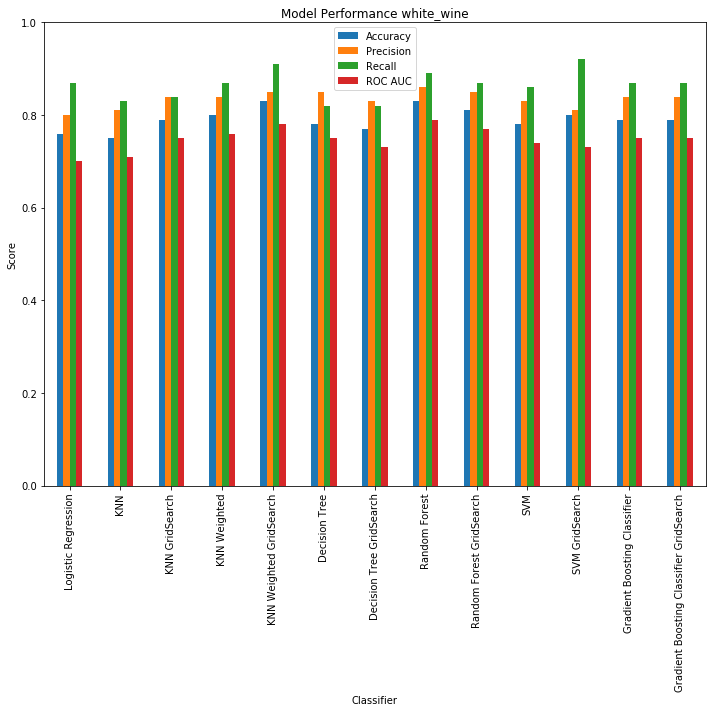

In [44]:
#white_wine model performance bar graph
figure=plt.figure(figsize=(10,10))
ax = figure.gca()

white_wine_performance[['Classifier', 'Accuracy', 'Precision', 'Recall', 'ROC AUC']].plot(kind='bar', x='Classifier', title='Model Performance white_wine', ylim=[0, 1.0], ax=ax)
plt.ylabel("Score")
plt.tight_layout()

### 2. Which machine learning model performs the best in a binary classification task to predict wine quality?

Looking at model performance for the white_wine dataset, the Random Forest Model has the highest accuracy, precision and ROC AUC (respectively: 0.83, 0.86, 0.79). The SVM with GridSearch Model has the highest recall (0.92). 

Accuracy is a measure of the number of correctly predicted data points out of all of the data points.

Precision is a measure of the number of how many predicted positives are actually positive (important if false positive cost is high).

Recall is a measure of the number of how many actual positives are classified (important if false negative cost is high). 

Looking at the test data confusion matrix of the Random Forest Classification Model:

(True Negatives = 217, False Negatives = 72, False Positives = 96, True Positives = 595)

In order to decrease the number of False Negatives and False Positives, more data can be added to the model for training. 

It is important to note that the added time for GridSearch with the Random Forest Model did not perform as well as the Random Forest Model without GridSearch.

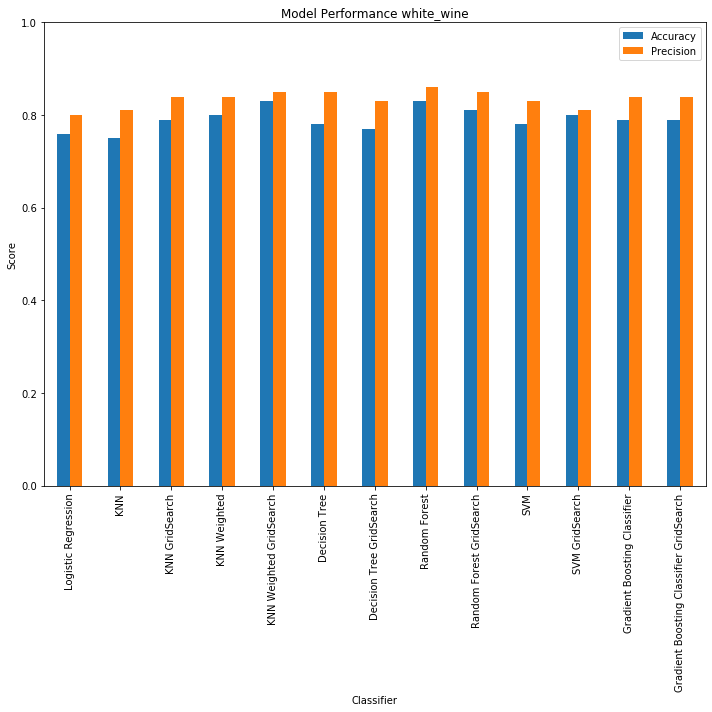

In [45]:
#white_wine model performance bar graph of accuracy and precision
figure=plt.figure(figsize=(10,10))
ax = figure.gca()

white_wine_performance[['Classifier', 'Accuracy', 'Precision']].plot(kind='bar', x='Classifier', title='Model Performance white_wine', ylim=[0, 1.0], ax=ax)
plt.ylabel("Score")
plt.tight_layout()

## Conclusion

For both the red_wine and white_wine datasets, the Random Forest Model yields the highest Accuracy, Precision and ROC AUC Scores. The KNN Weighted Model yields the highest Recall Score for red_wine and the SVM with GridSearch Model yields the highest Recall Score for white_wine. 

It is important to note that the three most important features, determined with feature importance, to wine quality, are not identical for red and white wine. For red wine, the three most important features to wine quality are alcohol, sulphates and volatile acidity. For white wine, the three most important features to wine quality are alcohol, volatile acidity and density.

For this particular business interest, accuracy should be maximized to ensure that correct predictions are made, to minimize the risk to both customers and business owners. In the Random Forest Model, Accuracy, Precision and ROC AUC are maximized. 

In all of the models tested, models run with GridSearch did not show increases in their performance (Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, Random Forest, Support Vector Machines (SVM) and an ensemble Gradient Boosting Classifier) compared to the same model run without GridSearch.

## Further Analyses

It is important to note that the white_wine data set is larger than the red_wine data set and so contains more training and testing data for the models. For further research, it is important to collect more data and re-run the models for the larger datasets. 

While no intensive feature engineering was conducted with the current datastets before running these models, due to the reasonably sized number of features in the datasets, the current models can be re-run after conducting Principal Component Analysis (PCA) to reduce the dimensionality of the datasets or after creating new interaction variables with the current variables (potentially between free sulfur dioxide and total sulfur dioxide as there is a high correlation between the variables, 0.67 and 0.62, respectively, for red and white wine). If further data collection entails more features, PCA and/or interaction analyses can be conducted with those variables. 

If more data is collected and consequently more balanced data is acquired for the original "quality" target variable, it might be possible to conduct either regression or classification supervised learning modeling to determine quality as a score between 0 and 10. 